<hr style="border: none; height: 30px; background: linear-gradient(to right, black, red,white);">

<h1 style="text-align: center; font-weight: bold; font-size: 48px; background: linear-gradient(to right, Red, red,Orange,white); -webkit-background-clip: text; color: transparent;">Vehicle Sales Analysis</h1>


<hr style="border: none; height: 30px; background: linear-gradient(to right, white, red,black);">

<h1 style="text-align: left; color: yellow; font-weight: bold;font-size: 36;"> Introduction</h1>

 

When considering the purchase of a vehicle, one of the key questions that often arises is its potential resale value. Many buyers wonder about the factors that can influence the selling price later on. Understanding these factors is crucial for making informed decisions and maximizing the value of your investment.

In this exploration of the Vehicle Sales dataset, we aim to identify the best brand-new or used cars to buy, which can be sold to dealerships or directly to buyers for a good price while minimizing depreciation. Factors such as brand reputation, model popularity, mileage and age of the vehicle will be analyzed to pinpoint cars that hold their value well over time, making them potentially lucrative investments.

<hr style="border: none; height: 20px; background: linear-gradient(to right, black,red, orange, white);">


<h1 style="text-align: left; color: yellow; font-weight: bold;font-size: 36;"> Data Collection</h1>

In [440]:
# Import essential packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
import pytz
%matplotlib inline
%config InlineBackend.figure_format='retina'


In [441]:
# Import data from Github
url = 'https://raw.githubusercontent.com/Kittisak-M/vehicle_sales/main/Vehicale_car_sales.csv'

car_sales = pd.read_csv(url)

C:\Users\Kmaun\AppData\Local\Temp\ipykernel_22028\3986174596.py:4: DtypeWarning:

Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.



<hr style="border: none; height: 20px; background: linear-gradient(to right, black,red, orange, white);">

<h1 style="text-align: left; color: yellow; font-weight: bold;font-size: 36;"> Glance the Dataset</h1>

In [442]:
# See top 5 rows
car_sales.head(5)

year   make                model        trim   body transmission  \
0  2015    Kia              Sorento          LX    SUV    automatic   
1  2015    Kia              Sorento          LX    SUV    automatic   
2  2014    BMW             3 Series  328i SULEV  Sedan    automatic   
3  2015  Volvo                  S60          T5  Sedan    automatic   
4  2014    BMW  6 Series Gran Coupe        650i  Sedan    automatic   

                 vin state  condition  odometer  color interior  \
0  5xyktca69fg566472    ca        5.0   16639.0  white    black   
1  5xyktca69fg561319    ca        5.0    9393.0  white    beige   
2  wba3c1c51ek116351    ca       45.0    1331.0   gray    black   
3  yv1612tb4f1310987    ca       41.0   14282.0  white    black   
4  wba6b2c57ed129731    ca       43.0    2641.0   gray    black   

                                   seller      mmr  sellingprice  \
0                 kia motors america  inc  20500.0       21500.0   
1                 kia motors america  inc  20800.0       21500.0   
2  financial services remarketing (lease)  31900.0       30000.0   
3                 volvo na rep/world omni  27500.0       27750.0   
4  financial services remarketing (lease)  66000.0       67000.0   

                                  saledate Column1  
0  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)  #NAME?  
1  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)     NaN  
2  Thu Jan 15 2015 04:30:00 GMT-0800 (PST)     NaN  
3  Thu Jan 29 2015 04:30:00 GMT-0800 (PST)     NaN  
4  Thu Dec 18 2014 12:30:00 GMT-0800 (PST)     NaN

In [443]:
# And 5 bottom rows
car_sales.tail()

year    make   model         trim       body transmission  \
558832  2015     Kia    K900       Luxury      Sedan          NaN   
558833  2012     Ram    2500  Power Wagon   Crew Cab    automatic   
558834  2012     BMW      X5    xDrive35d        SUV    automatic   
558835  2015  Nissan  Altima        2.5 S      sedan    automatic   
558836  2014    Ford   F-150          XLT  SuperCrew    automatic   

                      vin state  condition  odometer   color interior  \
558832  knalw4d4xf6019304    in       45.0   18255.0  silver    black   
558833  3c6td5et6cg112407    wa        5.0   54393.0   white    black   
558834  5uxzw0c58cl668465    ca       48.0   50561.0   black    black   
558835  1n4al3ap0fc216050    ga       38.0   16658.0   white    black   
558836  1ftfw1et2eke87277    ca       34.0   15008.0    gray     gray   

                                                   seller      mmr  \
558832                                   avis corporation  35300.0   
558833                                    i -5 uhlmann rv  30200.0   
558834             financial services remarketing (lease)  29800.0   
558835  enterprise vehicle exchange / tra / rental / t...  15100.0   
558836                   ford motor credit company llc pd  29600.0   

        sellingprice                                 saledate Column1  
558832       33000.0  Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)     NaN  
558833       30800.0  Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)     NaN  
558834       34000.0  Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)     NaN  
558835       11100.0  Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)     NaN  
558836       26700.0  Thu May 28 2015 05:30:00 GMT-0700 (PDT)     NaN

In [444]:
car_sales.shape

(558837, 17)

In [445]:
car_sales.describe

<bound method NDFrame.describe of         year    make                model         trim       body  \
0       2015     Kia              Sorento           LX        SUV   
1       2015     Kia              Sorento           LX        SUV   
2       2014     BMW             3 Series   328i SULEV      Sedan   
3       2015   Volvo                  S60           T5      Sedan   
4       2014     BMW  6 Series Gran Coupe         650i      Sedan   
...      ...     ...                  ...          ...        ...   
558832  2015     Kia                 K900       Luxury      Sedan   
558833  2012     Ram                 2500  Power Wagon   Crew Cab   
558834  2012     BMW                   X5    xDrive35d        SUV   
558835  2015  Nissan               Altima        2.5 S      sedan   
558836  2014    Ford                F-150          XLT  SuperCrew   

       transmission                vin state  condition  odometer   color  \
0         automatic  5xyktca69fg566472    ca        5.0   16

In [446]:
# See data structure
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
 16  Column1       1 non-null       object 
dtypes: float64(4), int64(1), object(12)
memory usage

There are missing values in the dataframe, we need to cleanse it.

In [447]:
# Count null value in each columns
car_sales.isnull().sum()

year                 0
make             10301
model            10399
trim             10651
body             13195
transmission     65352
vin                  4
state                0
condition        11820
odometer            94
color              749
interior           749
seller               0
mmr                 38
sellingprice        12
saledate            12
Column1         558836
dtype: int64

<hr style="border: none; height: 20px; background: linear-gradient(to right, black,red, orange, white);">

<h1 style="text-align: left; color: yellow; font-weight: bold;font-size: 36;"> Data Cleansing</h1>

In [448]:
car_sales.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
saledate         object
Column1          object
dtype: object

In [449]:
# Check how much percent missing value from the dataset

car_sales.isnull().mean().round(2) * 100

year              0.0
make              2.0
model             2.0
trim              2.0
body              2.0
transmission     12.0
vin               0.0
state             0.0
condition         2.0
odometer          0.0
color             0.0
interior          0.0
seller            0.0
mmr               0.0
sellingprice      0.0
saledate          0.0
Column1         100.0
dtype: float64

As you can see, there is a 12% missing value in the 'transmission' column, which exceeds the 10% threshold. Cleasing or transformation is necessary

In [450]:
# Remove unncessary column
cleaned_cs = car_sales.drop(['vin','mmr'], axis=1)

<hr style="border: none; height: 10px; background: linear-gradient(to right,red, white);">

Transmission column

In [451]:
# Count unique value in the transmission column
car_sales['transmission'].value_counts(dropna=False)

transmission
automatic    475915
NaN           65352
manual        17544
sedan            15
Sedan            11
Name: count, dtype: int64

Calculate ratio between 'manual' and 'automatic in the transmission column

In [452]:
# Convert all values in 'transmission' column to lowercase
cleaned_cs['transmission'] = cleaned_cs['transmission'].str.lower()

# Replace 'sedan' with np.nan (actual NaN value)
cleaned_cs['transmission'] = cleaned_cs['transmission'].replace('sedan', np.nan)

# Count the occurrences of each value in the 'transmission' column
transmission_counts = cleaned_cs['transmission'].value_counts(dropna=False)

print(transmission_counts)


transmission
automatic    475915
NaN           65378
manual        17544
Name: count, dtype: int64


Calculate percentage between 'manual' and 'automatic' in the transmission column in order to replace with 'NaN' with the same percentage(uncleaned version)

In [453]:
# Find ratio transmission and automatic
manual =  cleaned_cs['transmission'].value_counts().get('manual', 0)

auto = cleaned_cs['transmission'].value_counts().get('automatic', 0)

total_m_and_a = cleaned_cs['transmission'].value_counts().get('manual', 0) + cleaned_cs['transmission'].value_counts().get('automatic', 0)

total_ms = cleaned_cs['transmission'].isna().sum()

# Calculate percentage between automatic and manual then round up
m2allms_percent = manual / total_m_and_a * 100

a2allms_percent  = auto / total_m_and_a * 100

# Calculate how many rows it have to be replaced with 'NaN' in the column
m2allms = m2allms_percent * total_ms / 100

a2allms  =  a2allms_percent * total_ms / 100

print('total missing value: ', total_ms, 'rows')
print('manual to all_ms percentage: ',m2allms_percent, '%')
print('auto to all_ms percentage: ',a2allms_percent, '%')
print('count rows to fill missing value with manual: ',m2allms.round())
print('count rows to fill missing value with auto: ',a2allms.round())

total missing value:  65378 rows
manual to all_ms percentage:  3.5553105729148724 %
auto to all_ms percentage:  96.44468942708512 %
count rows to fill missing value with manual:  2324.0
count rows to fill missing value with auto:  63054.0


In [454]:
cleaned_cs['transmission'].value_counts(dropna=False)

transmission
automatic    475915
NaN           65378
manual        17544
Name: count, dtype: int64

In [455]:
# Replace NaN with 'automatic' for 63054 rows
auto_indices = cleaned_cs[cleaned_cs['transmission'].isnull()].sample(n=63054).index
cleaned_cs.loc[auto_indices, 'transmission'] = 'automatic'

# Replace NaN with 'manual' for 2412 rows
manual_indices = cleaned_cs[cleaned_cs['transmission'].isnull()].sample(n=2324).index
cleaned_cs.loc[manual_indices, 'transmission'] = 'manual'

In [456]:
# Check value count percentage After cleansing (it needs to be the same befor cleansing)
value_counts = cleaned_cs['transmission'].value_counts(dropna=False)

# Calculate the total count
total_count = value_counts.sum()

# Calculate the percentage of each value
value_counts_percentage = (value_counts / total_count * 100).round(2)
print('percentage: ', value_counts_percentage)


percentage:  transmission
automatic    96.44
manual        3.56
Name: count, dtype: float64


In [457]:
# Verify the column is clear
cleaned_cs['transmission'].value_counts(dropna= False)

transmission
automatic    538969
manual        19868
Name: count, dtype: int64

<hr style="border: none; height: 10px; background: linear-gradient(to right,red, white);">

Year column

In [458]:
# Count value in the 'Year' column and see if there is 'NaN' 
cleaned_cs['year'].value_counts(dropna=False).sort_index()

year
1982         2
1983         1
1984         5
1985        10
1986        11
1987         8
1988        11
1989        20
1990        49
1991        67
1992       132
1993       205
1994       392
1995       711
1996       851
1997      1546
1998      2149
1999      3363
2000      5227
2001      6468
2002      9715
2003     13281
2004     17342
2005     21394
2006     26913
2007     30845
2008     31502
2009     20594
2010     26485
2011     48548
2012    102315
2013     98168
2014     81070
2015      9437
Name: count, dtype: int64

<hr style="border: none; height: 10px; background: linear-gradient(to right,red, white);">

Make Column

In [459]:
# Count value in the 'make' column and see if there is 'NaN' or incorrect name
cleaned_cs['make'].value_counts(dropna=False).sort_index(ascending=False)

make
vw                 24
volkswagen         24
toyota             95
suzuki              5
subaru             60
                ...  
BMW             20719
Audi             5869
Aston Martin       25
Acura            5901
NaN             10301
Name: count, Length: 97, dtype: int64

In [460]:
# The missing value do not reach 5 percent of all rows, so droping null value is needed
percent = cleaned_cs['make'].isnull().sum() / cleaned_cs.shape[0] * 100

round_percent = percent.round(2)

print("Missing value percentage in the 'make'column: ",round_percent, "%")

Missing value percentage in the 'make'column:  1.84 %


In [461]:
# Drop null valve in the column
cleaned_cs = cleaned_cs.dropna(subset=['make'])

In [462]:
# Recheck null value is already removed
cleaned_cs['make'].value_counts(dropna=False).sort_index(ascending=False)

make
vw                 24
volkswagen         24
toyota             95
suzuki              5
subaru             60
                ...  
Bentley           116
BMW             20719
Audi             5869
Aston Martin       25
Acura            5901
Name: count, Length: 96, dtype: int64

Chatgpt is needed to get answer which one is not a car brand name.

This is my personal helper's answer: The item 'dot' is not a car brand name. It might refer to the Department of Transportation (DOT) or another entity, as it is not a commonly known car brand.

In [463]:
# It is needed to rearrange the unique value in the column in order to easily transform the data
un_value_make = cleaned_cs['make'].unique()

un_valve_make_sort = sorted(un_value_make)

print(un_valve_make_sort)

['Acura', 'Aston Martin', 'Audi', 'BMW', 'Bentley', 'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Daewoo', 'Dodge', 'FIAT', 'Ferrari', 'Fisker', 'Ford', 'GMC', 'Geo', 'HUMMER', 'Honda', 'Hyundai', 'Infiniti', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Lamborghini', 'Land Rover', 'Lexus', 'Lincoln', 'Lotus', 'MINI', 'Maserati', 'Mazda', 'Mercedes-Benz', 'Mercury', 'Mitsubishi', 'Nissan', 'Oldsmobile', 'Plymouth', 'Pontiac', 'Porsche', 'Ram', 'Rolls-Royce', 'Saab', 'Saturn', 'Scion', 'Subaru', 'Suzuki', 'Tesla', 'Toyota', 'Volkswagen', 'Volvo', 'acura', 'airstream', 'audi', 'bmw', 'buick', 'cadillac', 'chev truck', 'chevrolet', 'chrysler', 'dodge', 'dodge tk', 'dot', 'ford', 'ford tk', 'ford truck', 'gmc', 'gmc truck', 'honda', 'hyundai', 'hyundai tk', 'jeep', 'kia', 'land rover', 'landrover', 'lexus', 'lincoln', 'maserati', 'mazda', 'mazda tk', 'mercedes', 'mercedes-b', 'mercury', 'mitsubishi', 'nissan', 'oldsmobile', 'plymouth', 'pontiac', 'porsche', 'smart', 'subaru', 'suzuki', 'toyota', 'vo

In [464]:
# Remove 'dot' in the column
cleaned_cs = cleaned_cs[cleaned_cs['make'] != 'dot'].copy()

# List car brand name to be replaced
name_replace_list = {'dodge tk':'dodge','ford tk':'ford','ford truck':'ford','gmc truck':'gmc','hyundai tk': 'hyundai','mazda tk':'mazda', 'mercedes-b':'mercedes-benz', 'mercedes':'mercedes-benz','vw':'volkswagen','chev truck':'chevrolet'}

# Replace the value
cleaned_cs.loc[:, 'make'] = cleaned_cs['make'].replace(name_replace_list)


In [465]:
# Lower the case
cleaned_cs.loc[:, 'make'] = cleaned_cs['make'].str.lower()
cleaned_cs['make'].unique()

array(['kia', 'bmw', 'volvo', 'nissan', 'chevrolet', 'audi', 'ford',
       'hyundai', 'buick', 'cadillac', 'acura', 'lexus', 'infiniti',
       'jeep', 'mercedes-benz', 'mitsubishi', 'mazda', 'mini',
       'land rover', 'lincoln', 'jaguar', 'volkswagen', 'toyota',
       'subaru', 'scion', 'porsche', 'dodge', 'fiat', 'chrysler',
       'ferrari', 'honda', 'gmc', 'ram', 'smart', 'bentley', 'pontiac',
       'saturn', 'maserati', 'mercury', 'hummer', 'landrover', 'saab',
       'suzuki', 'oldsmobile', 'isuzu', 'geo', 'rolls-royce', 'daewoo',
       'plymouth', 'tesla', 'airstream', 'aston martin', 'fisker',
       'lamborghini', 'lotus'], dtype=object)

In [466]:
# Make sure the data is already cleansed
done = cleaned_cs['make'].sort_values().unique()

done

array(['acura', 'airstream', 'aston martin', 'audi', 'bentley', 'bmw',
       'buick', 'cadillac', 'chevrolet', 'chrysler', 'daewoo', 'dodge',
       'ferrari', 'fiat', 'fisker', 'ford', 'geo', 'gmc', 'honda',
       'hummer', 'hyundai', 'infiniti', 'isuzu', 'jaguar', 'jeep', 'kia',
       'lamborghini', 'land rover', 'landrover', 'lexus', 'lincoln',
       'lotus', 'maserati', 'mazda', 'mercedes-benz', 'mercury', 'mini',
       'mitsubishi', 'nissan', 'oldsmobile', 'plymouth', 'pontiac',
       'porsche', 'ram', 'rolls-royce', 'saab', 'saturn', 'scion',
       'smart', 'subaru', 'suzuki', 'tesla', 'toyota', 'volkswagen',
       'volvo'], dtype=object)

In [467]:
# Count null value in the 'model' column
cleaned_cs['model'].isnull().sum()

98

In [468]:
# Remove null value
cleaned_cs = cleaned_cs.dropna(subset=['model'])

# Lower character
cleaned_cs['model'] = cleaned_cs['model'].str.lower()

In [469]:
# See unique value in the 'model' column
cleaned_cs['model'].value_counts().sort_values()

model
458 italia        1
swift             1
323i              1
cabriolet         1
b-series          1
              ...  
escape        11893
camry         12549
fusion        12946
f-150         14479
altima        19349
Name: count, Length: 851, dtype: int64

<hr style="border: none; height: 10px; background: linear-gradient(to right,red, white);">

Trim column

In [470]:
# Count unique value in the 'model' column
cleaned_cs['trim'].nunique()

1962

In [471]:
# Count missing value in the 'model' column
cleaned_cs['trim'].isnull().sum()

349

In [472]:
# Remove null value 
cleaned_cs = cleaned_cs.dropna(subset=['trim'])

In [473]:
# Count null value after removing
cleaned_cs['trim'].isnull().sum()

0

<hr style="border: none; height: 10px; background: linear-gradient(to right,red, white);">

Body column

In [474]:
cleaned_cs['body'].value_counts()

body
Sedan          199364
SUV            119292
sedan           41881
suv             24552
Hatchback       21380
                ...  
cab plus 4          1
g37 coupe           1
CTS-V Wagon         1
Ram Van             1
cts wagon           1
Name: count, Length: 87, dtype: int64

In [475]:
cleaned_cs['body'].unique()

array(['SUV', 'Sedan', 'Convertible', 'Coupe', 'Wagon', 'Hatchback',
       'Crew Cab', 'G Coupe', 'G Sedan', 'Elantra Coupe', 'Genesis Coupe',
       'Minivan', nan, 'Van', 'Double Cab', 'CrewMax Cab', 'Access Cab',
       'King Cab', 'SuperCrew', 'CTS Coupe', 'Extended Cab',
       'E-Series Van', 'SuperCab', 'Regular Cab', 'G Convertible', 'Koup',
       'Quad Cab', 'CTS-V Coupe', 'sedan', 'G37 Convertible', 'Club Cab',
       'Xtracab', 'Q60 Convertible', 'CTS Wagon', 'convertible',
       'G37 Coupe', 'Mega Cab', 'Cab Plus 4', 'Q60 Coupe', 'Cab Plus',
       'Beetle Convertible', 'TSX Sport Wagon', 'Promaster Cargo Van',
       'GranTurismo Convertible', 'CTS-V Wagon', 'Ram Van', 'minivan',
       'suv', 'Transit Van', 'Navitgation', 'van', 'regular-cab',
       'g sedan', 'g coupe', 'hatchback', 'king cab', 'supercrew',
       'g convertible', 'coupe', 'crew cab', 'wagon', 'double cab',
       'e-series van', 'regular cab', 'quad cab', 'g37 convertible',
       'supercab', 'exten

In [476]:
# Count null value in the 'model' column
cleaned_cs['body'].isnull().sum()

2544

In [477]:
# Remove null value
cleaned_cs = cleaned_cs.dropna(subset=['body'])

# Lower character
cleaned_cs.loc[:, 'body'] = cleaned_cs['body'].str.lower()


In [478]:
cleaned_cs['body'].unique()

array(['suv', 'sedan', 'convertible', 'coupe', 'wagon', 'hatchback',
       'crew cab', 'g coupe', 'g sedan', 'elantra coupe', 'genesis coupe',
       'minivan', 'van', 'double cab', 'crewmax cab', 'access cab',
       'king cab', 'supercrew', 'cts coupe', 'extended cab',
       'e-series van', 'supercab', 'regular cab', 'g convertible', 'koup',
       'quad cab', 'cts-v coupe', 'g37 convertible', 'club cab',
       'xtracab', 'q60 convertible', 'cts wagon', 'g37 coupe', 'mega cab',
       'cab plus 4', 'q60 coupe', 'cab plus', 'beetle convertible',
       'tsx sport wagon', 'promaster cargo van',
       'granturismo convertible', 'cts-v wagon', 'ram van', 'transit van',
       'navitgation', 'regular-cab'], dtype=object)

<hr style="border: none; height: 10px; background: linear-gradient(to right,red, white);">

State Column

In [479]:
cleaned_cs['state'].value_counts()

state
fl                   81150
ca                   71131
pa                   53054
tx                   44955
ga                   33885
                     ...  
3vwd17aj2fm285365        1
3vwd17aj3fm276741        1
3vwd17aj2fm258506        1
3vwd17aj4fm201708        1
3vwd17aj2fm261566        1
Name: count, Length: 64, dtype: int64

In [480]:
cleaned_cs['state'].unique()

array(['ca', 'tx', 'pa', 'mn', 'az', 'wi', 'tn', 'md', 'fl', 'ne', 'nv',
       'oh', 'mi', 'nj', 'ga', 'va', 'sc', 'nc', 'in', 'il', 'co', 'ut',
       'mo', 'ny', 'ma', 'pr', 'or', 'la', 'wa', 'hi', 'qc', 'ab', 'on',
       'ok', 'ms', 'nm', 'al', '3vwd17aj4fm201708', 'ns',
       '3vwd17aj2fm258506', '3vwd17aj3fm276741', '3vwd17aj2fm285365',
       '3vwd17aj0fm227318', '3vwd17aj6fm218641', '3vwd17aj7fm223475',
       '3vwd17aj5fm297123', '3vwd17aj5fm219943', '3vwd17aj9fm219766',
       '3vwd17aj3fm259017', '3vwd17aj5fm206111', '3vwd17aj5fm273601',
       '3vwd17aj5fm221322', '3vwd17aj5fm268964', '3vwd17aj6fm231972',
       '3vwd17aj7fm222388', '3vwd17aj7fm218440', '3vwd17ajxfm315938',
       '3vwd17aj7fm229552', '3vwd17aj8fm298895', '3vwd17aj4fm236636',
       '3vwd17aj5fm225953', '3vwd17aj7fm326640', '3vwd17aj8fm239622',
       '3vwd17aj2fm261566'], dtype=object)

In [481]:
state_remove_list = ['3vwd17aj4fm201708','3vwd17aj2fm258506', '3vwd17aj3fm276741', '3vwd17aj2fm285365',
                       '3vwd17aj0fm227318', '3vwd17aj6fm218641', '3vwd17aj7fm223475',
        '3vwd17aj5fm297123', '3vwd17aj5fm219943', '3vwd17aj9fm219766',
       '3vwd17aj3fm259017', '3vwd17aj5fm206111', '3vwd17aj5fm273601',
       '3vwd17aj5fm221322', '3vwd17aj5fm268964', '3vwd17aj6fm231972',
       '3vwd17aj7fm222388', '3vwd17aj7fm218440', '3vwd17ajxfm315938',
       '3vwd17aj7fm229552', '3vwd17aj8fm298895', '3vwd17aj4fm236636',
       '3vwd17aj5fm225953', '3vwd17aj7fm326640', '3vwd17aj8fm239622',
       '3vwd17aj2fm261566']

In [482]:
cleaned_cs = cleaned_cs[~cleaned_cs['state'].isin(state_remove_list)]


In [483]:
cleaned_cs['state'].unique()

array(['ca', 'tx', 'pa', 'mn', 'az', 'wi', 'tn', 'md', 'fl', 'ne', 'nv',
       'oh', 'mi', 'nj', 'ga', 'va', 'sc', 'nc', 'in', 'il', 'co', 'ut',
       'mo', 'ny', 'ma', 'pr', 'or', 'la', 'wa', 'hi', 'qc', 'ab', 'on',
       'ok', 'ms', 'nm', 'al', 'ns'], dtype=object)

<hr style="border: none; height: 10px; background: linear-gradient(to right,red, white);">

Condition column

In [484]:
cleaned_cs['condition'].unique()

array([ 5., 45., 41., 43.,  1., 34.,  2., 42.,  3., 48., nan, 49., 17.,
       19., 29., 38., 44., 47., 32.,  4., 25., 37., 39., 31., 28., 46.,
       36., 35., 26., 21., 22., 27., 24., 33., 23., 15., 16., 18., 12.,
       14., 11., 13.])

In [485]:
cleaned_cs['condition'].value_counts(dropna=False)

condition
19.0    40426
35.0    26206
37.0    25507
44.0    25222
43.0    24695
42.0    24066
41.0    22771
36.0    22752
39.0    19665
4.0     19633
2.0     19623
28.0    18648
29.0    18424
38.0    18413
34.0    17022
27.0    15797
49.0    12904
48.0    12570
46.0    12499
45.0    12174
25.0    12146
26.0    11557
47.0    11236
NaN     11200
5.0     11048
3.0     10477
33.0    10372
32.0     9727
24.0     9037
31.0     9016
21.0     8827
23.0     7892
1.0      6911
22.0     5831
18.0      312
17.0      224
16.0      169
15.0      133
14.0      127
12.0       94
11.0       86
13.0       79
Name: count, dtype: int64

In [486]:
cleaned_cs['condition'].isnull().sum()

11200

<hr style="border: none; height: 10px; background: linear-gradient(to right,red, white);">

Color column

In [487]:
cleaned_cs['color'].value_counts()

color
black        108620
white        103615
gray          81515
silver        81466
blue          49768
red           42525
—             24440
gold          10898
green         10796
beige          8904
burgundy       8744
brown          6611
orange         1986
purple         1507
off-white      1415
yellow         1232
charcoal        472
turquoise       224
pink             42
lime             15
Name: count, dtype: int64

In [488]:
cleaned_cs['color'].unique()

array(['white', 'gray', 'black', 'red', 'silver', 'blue', 'brown',
       'beige', 'purple', 'burgundy', '—', 'gold', 'yellow', 'green',
       'charcoal', nan, 'orange', 'off-white', 'turquoise', 'pink',
       'lime'], dtype=object)

In [489]:
cleaned_cs['color'] = cleaned_cs['color'].str.replace('—', '').replace('', np.NaN)

In [490]:
# fill null value with most frequent value which is 'black'
col_to_impute = cleaned_cs['color']

imputer = SimpleImputer(strategy='most_frequent')

imputed_col = imputer.fit_transform(col_to_impute.values.reshape(-1, 1)).flatten()

cleaned_cs['color'] = imputed_col


In [491]:
cleaned_cs['color'].unique()

array(['white', 'gray', 'black', 'red', 'silver', 'blue', 'brown',
       'beige', 'purple', 'burgundy', 'gold', 'yellow', 'green',
       'charcoal', 'orange', 'off-white', 'turquoise', 'pink', 'lime'],
      dtype=object)

In [492]:
cleaned_cs['color'].isnull().sum()

0

In [493]:
cleaned_cs['color'].unique()

array(['white', 'gray', 'black', 'red', 'silver', 'blue', 'brown',
       'beige', 'purple', 'burgundy', 'gold', 'yellow', 'green',
       'charcoal', 'orange', 'off-white', 'turquoise', 'pink', 'lime'],
      dtype=object)

In [494]:
cleaned_cs['color'].value_counts()

color
black        133783
white        103615
gray          81515
silver        81466
blue          49768
red           42525
gold          10898
green         10796
beige          8904
burgundy       8744
brown          6611
orange         1986
purple         1507
off-white      1415
yellow         1232
charcoal        472
turquoise       224
pink             42
lime             15
Name: count, dtype: int64

<hr style="border: none; height: 10px; background: linear-gradient(to right,red, white);">

Interior column


In [495]:
cleaned_cs['interior'].isnull().sum()

723

In [496]:
cleaned_cs['interior'].unique()

array(['black', 'beige', 'tan', '—', 'gray', 'brown', 'burgundy', 'white',
       nan, 'silver', 'off-white', 'red', 'yellow', 'blue', 'green',
       'purple', 'orange', 'gold'], dtype=object)

In [497]:
cleaned_cs['interior'].value_counts()

interior
black        240145
gray         173441
beige         58263
tan           42783
—             16403
brown          8410
red            1312
silver         1065
blue           1040
off-white       480
purple          331
gold            314
white           244
green           225
burgundy        184
orange          135
yellow           20
Name: count, dtype: int64

In [498]:
cleaned_cs['interior'] = cleaned_cs['interior'].replace('—', np.nan).copy()

In [499]:
cleaned_cs['interior'].value_counts(dropna=False)

interior
black        240145
gray         173441
beige         58263
tan           42783
NaN           17126
brown          8410
red            1312
silver         1065
blue           1040
off-white       480
purple          331
gold            314
white           244
green           225
burgundy        184
orange          135
yellow           20
Name: count, dtype: int64

In [500]:
cleaned_cs['interior'] = cleaned_cs['interior'].ffill()

In [501]:
cleaned_cs['interior'].value_counts(dropna=False)

interior
black        246933
gray         179564
beige         60224
tan           44491
brown          8729
red            1364
blue           1107
silver         1092
off-white       516
purple          346
gold            320
white           250
green           234
burgundy        189
orange          139
yellow           20
Name: count, dtype: int64

<hr style="border: none; height: 10px; background: linear-gradient(to right,red, white);">

Odometer column


In [502]:
# Assuming 'cleaned_cs' is your DataFrame and 'odometer' is the column with mixed values
non_numeric_count = cleaned_cs['odometer'].apply(lambda x: not str(x).replace('.', '', 1).isdigit()).sum()

print("Number of non-numeric values in 'odometer':", non_numeric_count)


Number of non-numeric values in 'odometer': 85


In [503]:
# Assuming 'cleaned_cs' is your DataFrame and 'odometer' is the column with mixed values
numeric_count = cleaned_cs['odometer'].apply(lambda x: str(x).replace('.', '', 1).isdigit()).sum()

print("Number of numerical values in 'odometer':", numeric_count)


Number of numerical values in 'odometer': 545433


In [504]:
cleaned_cs = cleaned_cs.drop('Column1',axis=1)

<hr style="border: none; height: 10px; background: linear-gradient(to right,red, white);">

Seller column

In [505]:
cleaned_cs['seller'].isna().sum()

0

In [506]:
cleaned_cs['seller'].value_counts().sort_index()

seller
1 cochran of monroeville    234
1 for all auto sales          1
101motors                     1
1360250 alberta ltd           1
1360250 alberta ltd.          1
                           ... 
zonemotors.com inc            1
zoom auto                     1
zuma autoboat                 1
zumbrota ford sales llc       1
zygi auto corp                1
Name: count, Length: 14003, dtype: int64

<hr style="border: none; height: 10px; background: linear-gradient(to right,red, white);">

Sellingprice col

In [507]:
cleaned_cs['sellingprice'].isnull().sum()

12

In [508]:
cleaned_cs = cleaned_cs.dropna(subset=['sellingprice'])

In [509]:
# Calculate median
mmr_median = cleaned_cs['sellingprice'].median()

# Calculate mode
mmr_mode = cleaned_cs['sellingprice'].mode()

# Calculate mean
avg = cleaned_cs['sellingprice'].mean()

print("Median:", mmr_median)
print("Mode:", mmr_mode)
print("Mean:", avg)

Median: 12250.0
Mode: 0    11000.0
Name: sellingprice, dtype: float64
Mean: 13724.174150238494


In [510]:
cleaned_cs['sellingprice']

0         21500.0
1         21500.0
2         30000.0
3         27750.0
4         67000.0
           ...   
558832    33000.0
558833    30800.0
558834    34000.0
558835    11100.0
558836    26700.0
Name: sellingprice, Length: 545506, dtype: float64

<hr style="border: none; height: 10px; background: linear-gradient(to right,red, white);">

Saledate column

In [511]:
cleaned_cs['saledate'].isnull().sum()

0

In [512]:
# Mapping of timezone abbreviations to UTC offsets
timezone_offsets = {
    'PST': '-0800',
    'PDT': '-0700',  # Daylight Saving Time
    # Add more timezone abbreviations and offsets as needed
}

date_string = 'Tue Dec 16 2014 12:30:00 PST'

# Extract the timezone abbreviation
timezone_abbr = date_string.split()[-1]

# Replace the timezone abbreviation with the UTC offset
date_string = date_string.replace(timezone_abbr, timezone_offsets.get(timezone_abbr, ''))

# Parse the date string into a datetime object
datetime_obj = datetime.strptime(date_string, '%a %b %d %Y %H:%M:%S %z')

cleaned_cs['saledate']


0         Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1         Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2         Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3         Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4         Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
                           ...                   
558832    Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558833    Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834    Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835    Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)
558836    Thu May 28 2015 05:30:00 GMT-0700 (PDT)
Name: saledate, Length: 545506, dtype: object

<hr style="border: none; height: 10px; background: linear-gradient(to right,red, white);">

We are ready to use the dataset to visualize as cleaned_cs dataframe.

<hr style="border: none; height: 20px; background: linear-gradient(to right, black,red, orange, white);">

In [513]:
cleaned_cs

year    make                model         trim       body  \
0       2015     kia              sorento           LX        suv   
1       2015     kia              sorento           LX        suv   
2       2014     bmw             3 series   328i SULEV      sedan   
3       2015   volvo                  s60           T5      sedan   
4       2014     bmw  6 series gran coupe         650i      sedan   
...      ...     ...                  ...          ...        ...   
558832  2015     kia                 k900       Luxury      sedan   
558833  2012     ram                 2500  Power Wagon   crew cab   
558834  2012     bmw                   x5    xDrive35d        suv   
558835  2015  nissan               altima        2.5 S      sedan   
558836  2014    ford                f-150          XLT  supercrew   

       transmission state  condition  odometer   color interior  \
0         automatic    ca        5.0   16639.0   white    black   
1         automatic    ca        5.0    9393.0   white    beige   
2         automatic    ca       45.0    1331.0    gray    black   
3         automatic    ca       41.0   14282.0   white    black   
4         automatic    ca       43.0    2641.0    gray    black   
...             ...   ...        ...       ...     ...      ...   
558832       manual    in       45.0   18255.0  silver    black   
558833    automatic    wa        5.0   54393.0   white    black   
558834    automatic    ca       48.0   50561.0   black    black   
558835    automatic    ga       38.0   16658.0   white    black   
558836    automatic    ca       34.0   15008.0    gray     gray   

                                                   seller  sellingprice  \
0                                 kia motors america  inc       21500.0   
1                                 kia motors america  inc       21500.0   
2                  financial services remarketing (lease)       30000.0   
3                                 volvo na rep/world omni       27750.0   
4                  financial services remarketing (lease)       67000.0   
...                                                   ...           ...   
558832                                   avis corporation       33000.0   
558833                                    i -5 uhlmann rv       30800.0   
558834             financial services remarketing (lease)       34000.0   
558835  enterprise vehicle exchange / tra / rental / t...       11100.0   
558836                   ford motor credit company llc pd       26700.0   

                                       saledate  
0       Tue Dec 16 2014 12:30:00 GMT-0800 (PST)  
1       Tue Dec 16 2014 12:30:00 GMT-0800 (PST)  
2       Thu Jan 15 2015 04:30:00 GMT-0800 (PST)  
3       Thu Jan 29 2015 04:30:00 GMT-0800 (PST)  
4       Thu Dec 18 2014 12:30:00 GMT-0800 (PST)  
...                                         ...  
558832  Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)  
558833  Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)  
558834  Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)  
558835  Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)  
558836  Thu May 28 2015 05:30:00 GMT-0700 (PDT)  

[545506 rows x 14 columns]

<h1 style="text-align: left; color: yellow; font-weight: bold;font-size: 36;"> Data Visualization</h1>

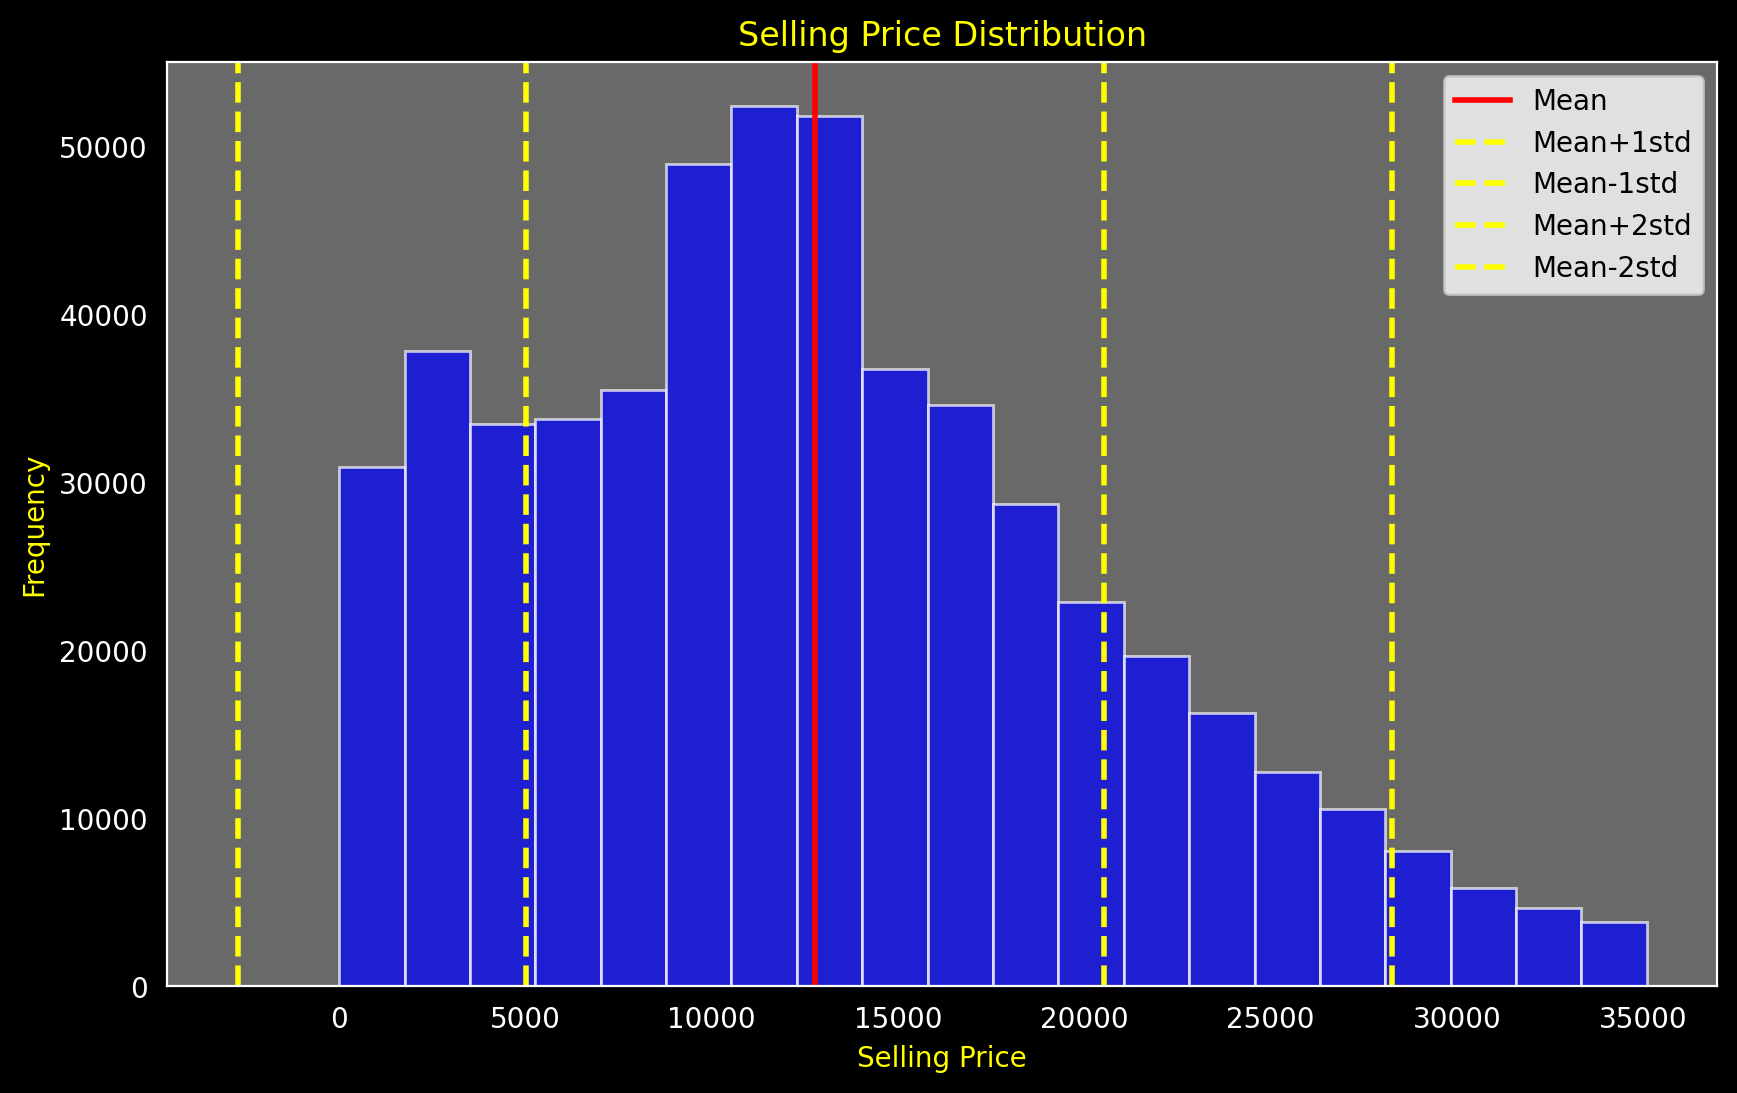

In [514]:

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = cleaned_cs['sellingprice'].quantile(0.25)
Q3 = cleaned_cs['sellingprice'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Determine the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
cleaned_cs_no_outliers = cleaned_cs[(cleaned_cs['sellingprice'] >= lower_bound) & (cleaned_cs['sellingprice'] <= upper_bound)]

# Calculate the mean and standard deviation
sellingprice_mean = cleaned_cs_no_outliers['sellingprice'].mean()
sellingprice_std = cleaned_cs_no_outliers['sellingprice'].std()

# Calculate the values for the lines
std_lines = [
    sellingprice_mean,
    sellingprice_mean + sellingprice_std,
    sellingprice_mean - sellingprice_std,
    sellingprice_mean + 2 * sellingprice_std,
    sellingprice_mean - 2 * sellingprice_std
]

# Plotting the histogram and lines
plt.figure(figsize=(10, 6), facecolor='black')
plt.hist(cleaned_cs_no_outliers['sellingprice'], bins=20, color='blue', edgecolor='white', alpha=0.7)

# Plot the mean as a red line
plt.axvline(x=sellingprice_mean, color='red', linewidth=2, label='Mean')

# Plot the other lines
for line_value, label in zip(std_lines[1:], ['Mean+1std', 'Mean-1std', 'Mean+2std', 'Mean-2std']):
    plt.axvline(x=line_value, color='yellow', linestyle='dashed', linewidth=2, label=label)

plt.legend()
plt.title('Selling Price Distribution', color='yellow')
plt.xlabel('Selling Price', color='yellow')
plt.ylabel('Frequency', color='yellow')
plt.xticks(color='white')
plt.yticks(color='white')
plt.gca().set_facecolor('dimgray')

# Setting the edge color of the plot spines to white
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_edgecolor('white')

plt.show()


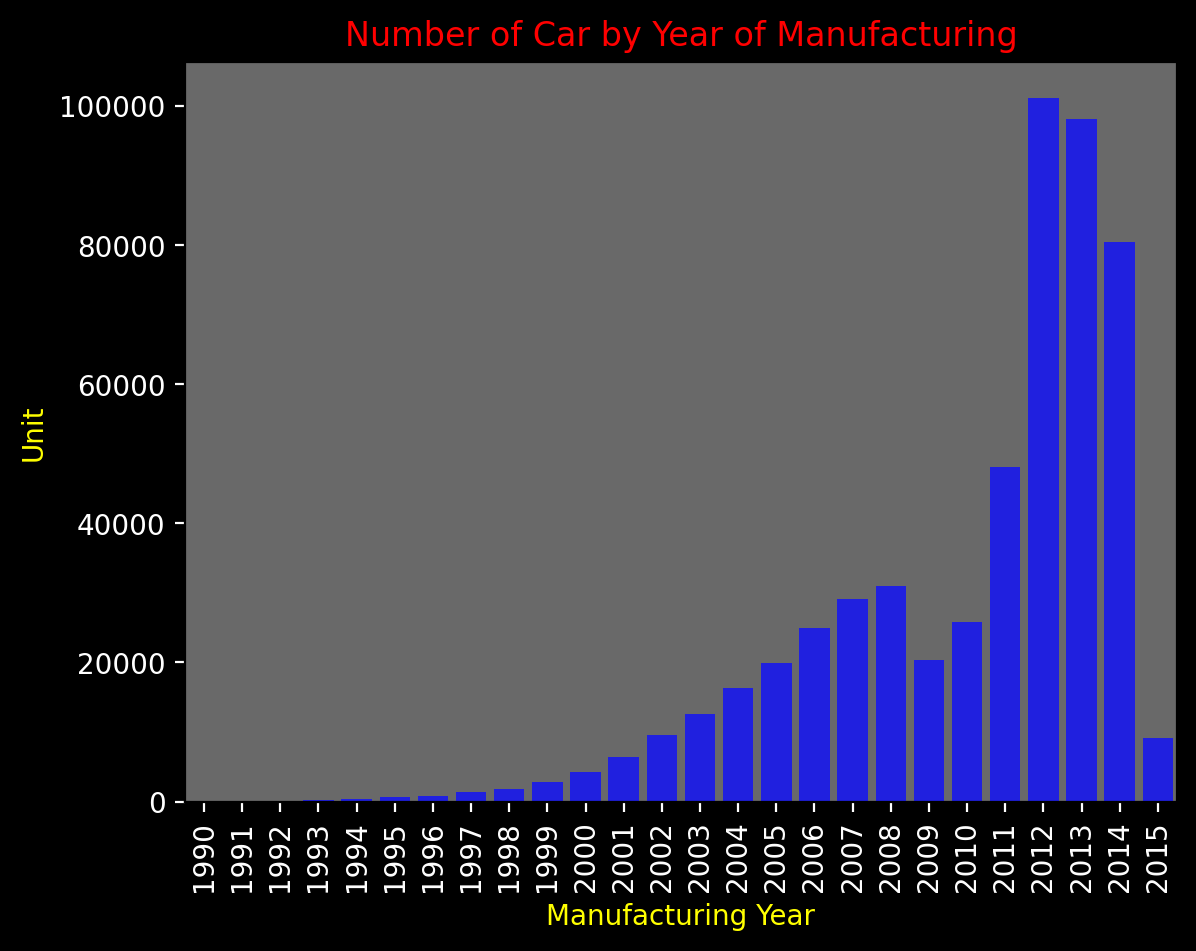

In [515]:
yearly_counts = cleaned_cs.groupby('year')['make'].count().reset_index()
ax = sns.barplot(x='year', y='make', data=yearly_counts,color='blue')
ax.set_facecolor('dimgrey')
plt.gcf().set_facecolor('black')
plt.title('Number of Car by Year of Manufacturing',color='red')
plt.xlabel('Manufacturing Year',color='yellow')
plt.ylabel('Unit',color='yellow')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.xticks(rotation=90)
plt.show()

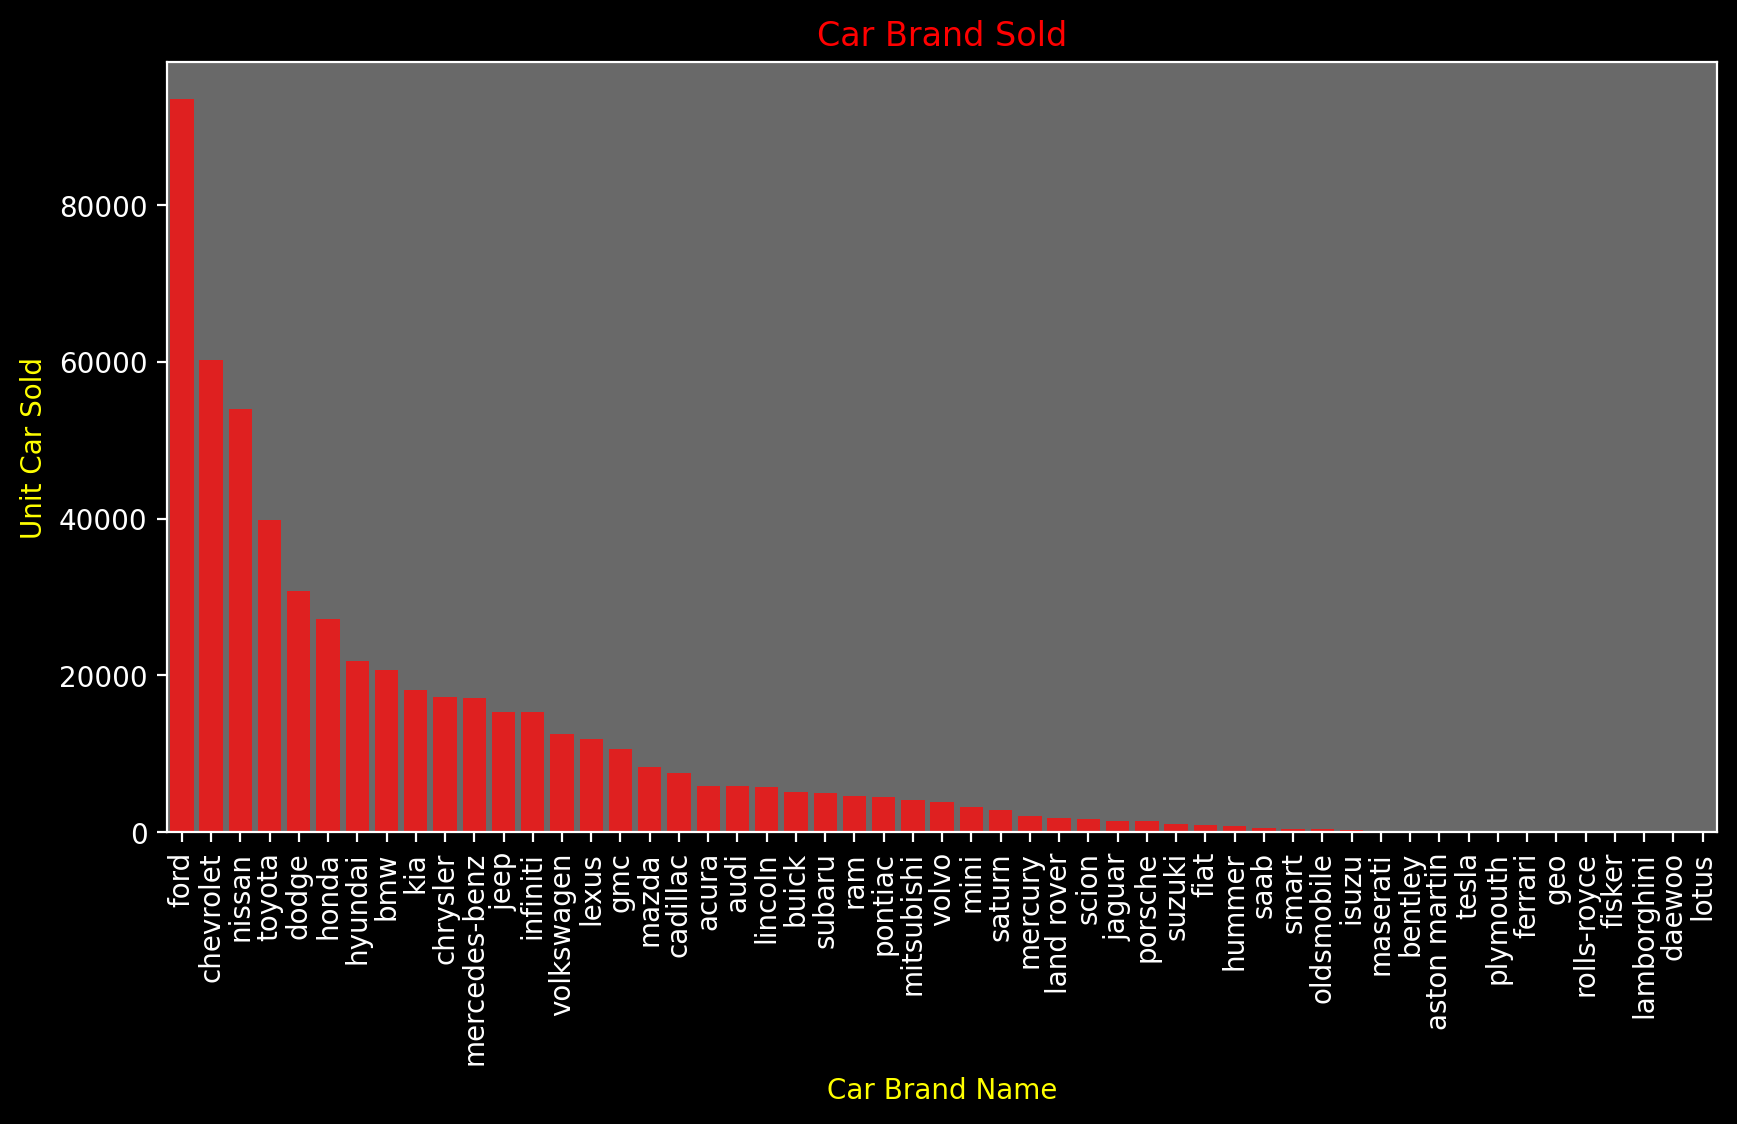

In [516]:
make_market_share = cleaned_cs.groupby('make')['model'].count().reset_index()
market_share_s = make_market_share.sort_values(by='model', ascending=False)


plt.figure(figsize=(10, 5))
ax = sns.barplot(x='make', y='model', data=market_share_s, color='red')


ax.set_facecolor('dimgray')  
plt.gcf().set_facecolor('black')  


ax.set_title('Car Brand Sold', color='red')
ax.set_xlabel('Car Brand Name', color='yellow')
ax.set_ylabel('Unit Car Sold', color='yellow')


ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

plt.xticks(rotation=90)

for spine in ax.spines.values():
    spine.set_edgecolor('white')

plt.show()


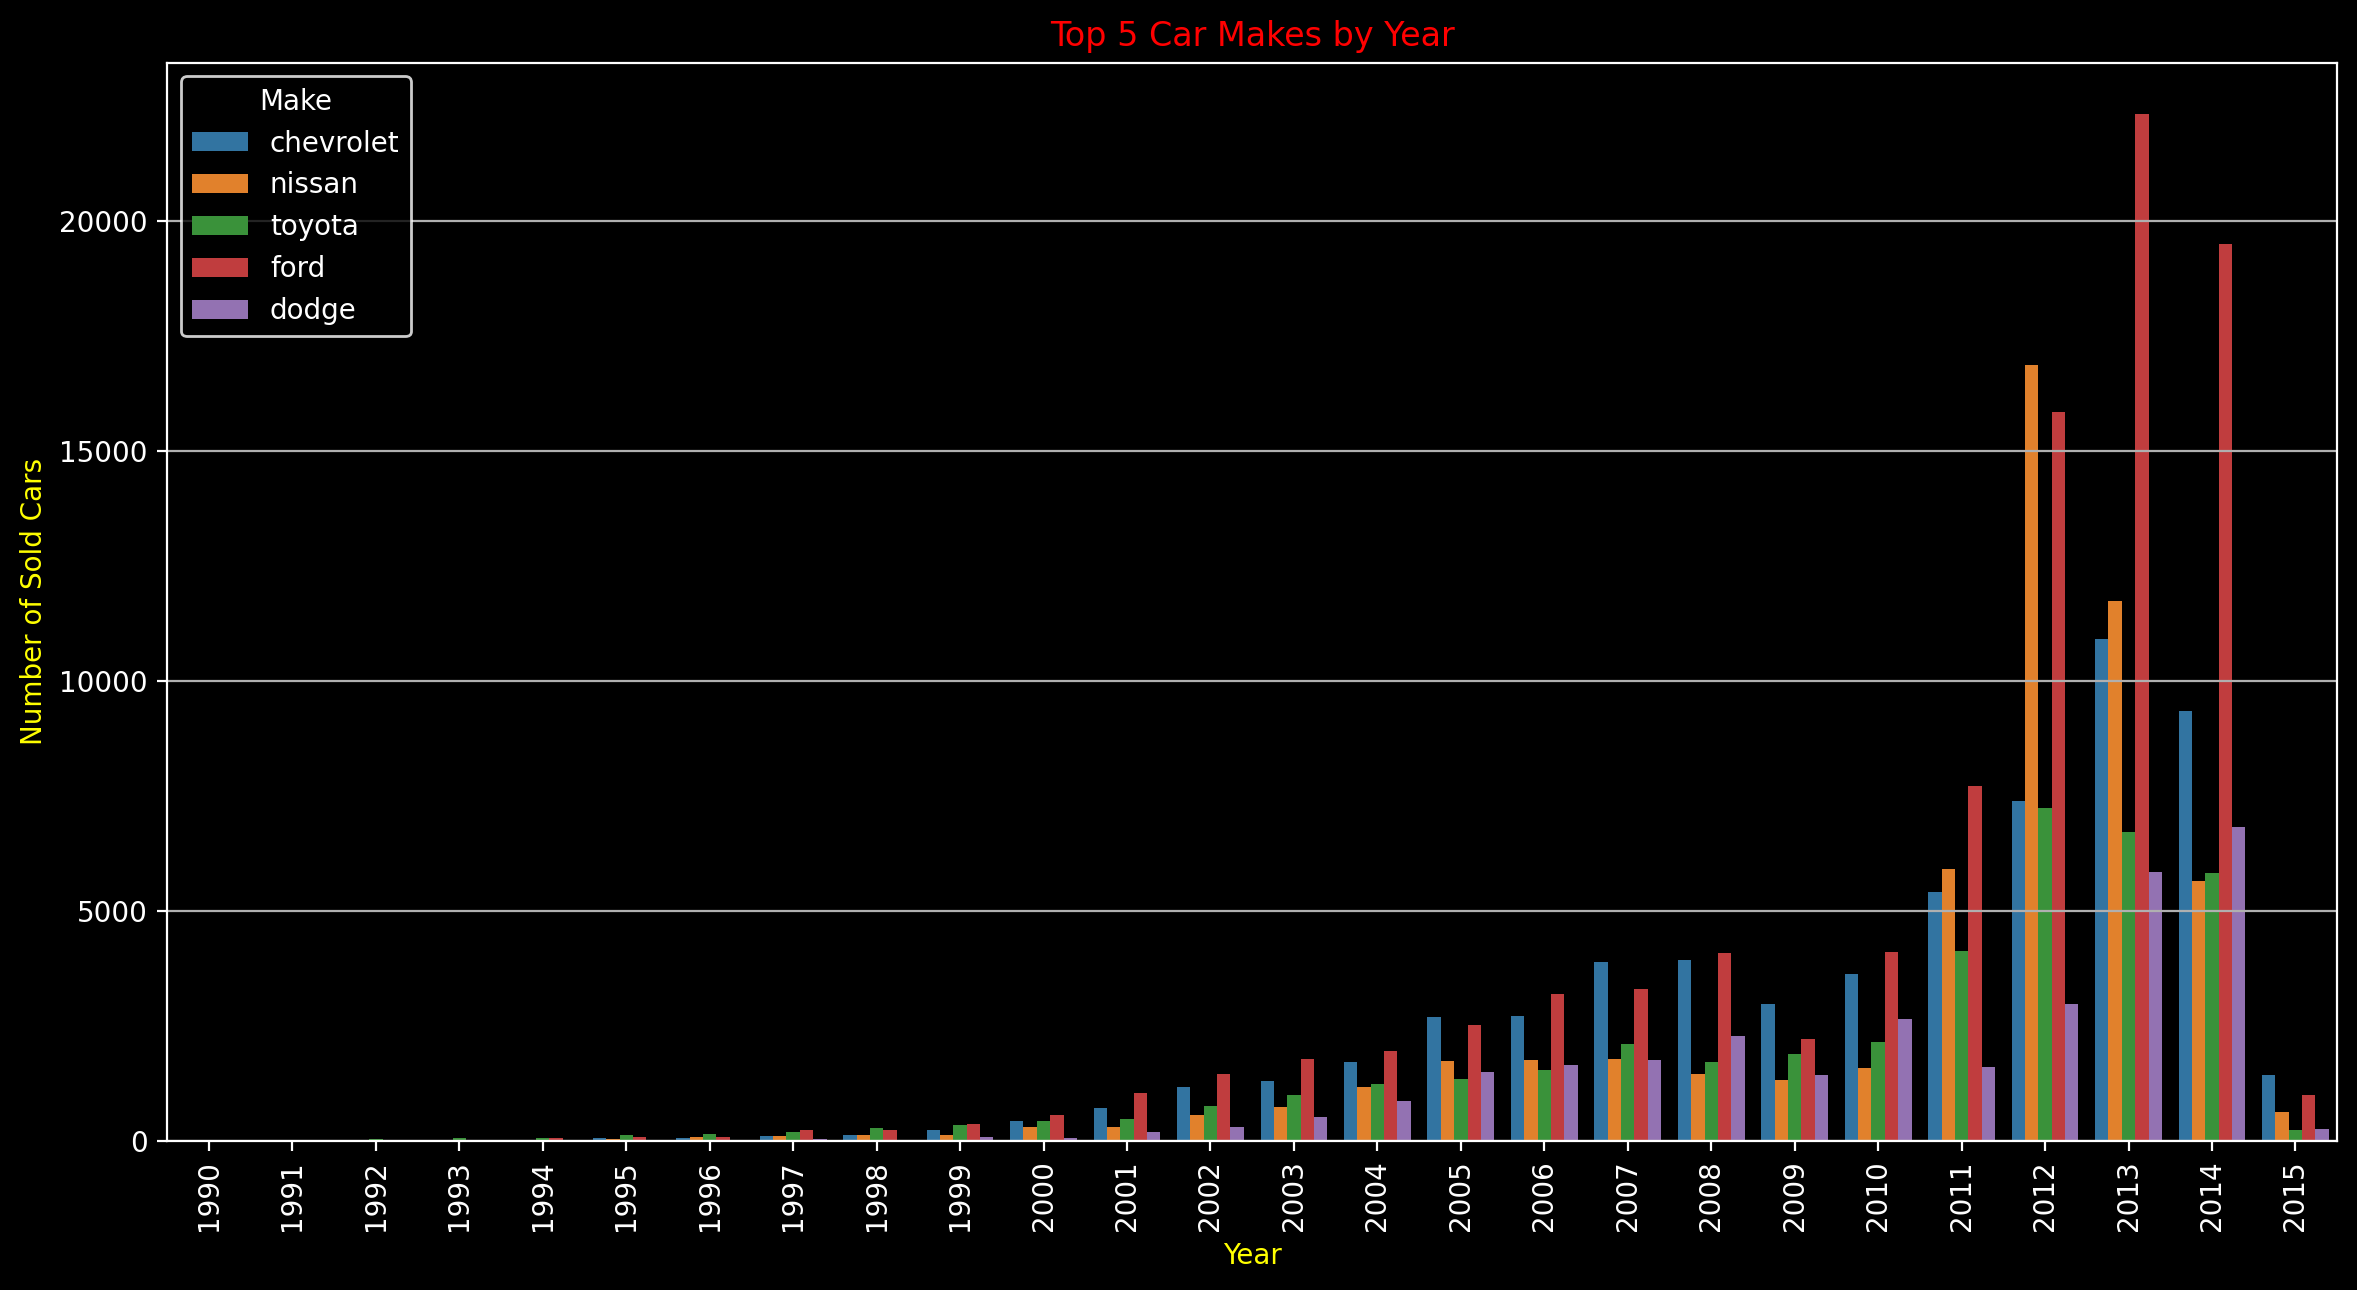

In [517]:

top_car_makes = cleaned_cs['make'].value_counts().nlargest(5).index

filtered_cs = cleaned_cs[cleaned_cs['make'].isin(top_car_makes)]

yearly_counts = filtered_cs.groupby(['year', 'make']).size().reset_index(name='counts')


plt.figure(figsize=(14, 7))
ax = sns.barplot(x='year', y='counts', hue='make', data=yearly_counts)

ax.set_facecolor('black')
plt.gcf().set_facecolor('black')

plt.title('Top 5 Car Makes by Year', color='red')
plt.xlabel('Year', color='yellow')
plt.ylabel('Number of Sold Cars', color='yellow')

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

legend = plt.legend(title='Make', loc='upper left', facecolor='black', edgecolor='white')
plt.setp(legend.get_texts(), color='white')
plt.setp(legend.get_title(), color='white')
plt.grid(axis='y') 
plt.xticks(rotation=90)

for spine in ax.spines.values():
    spine.set_edgecolor('white')

plt.show()

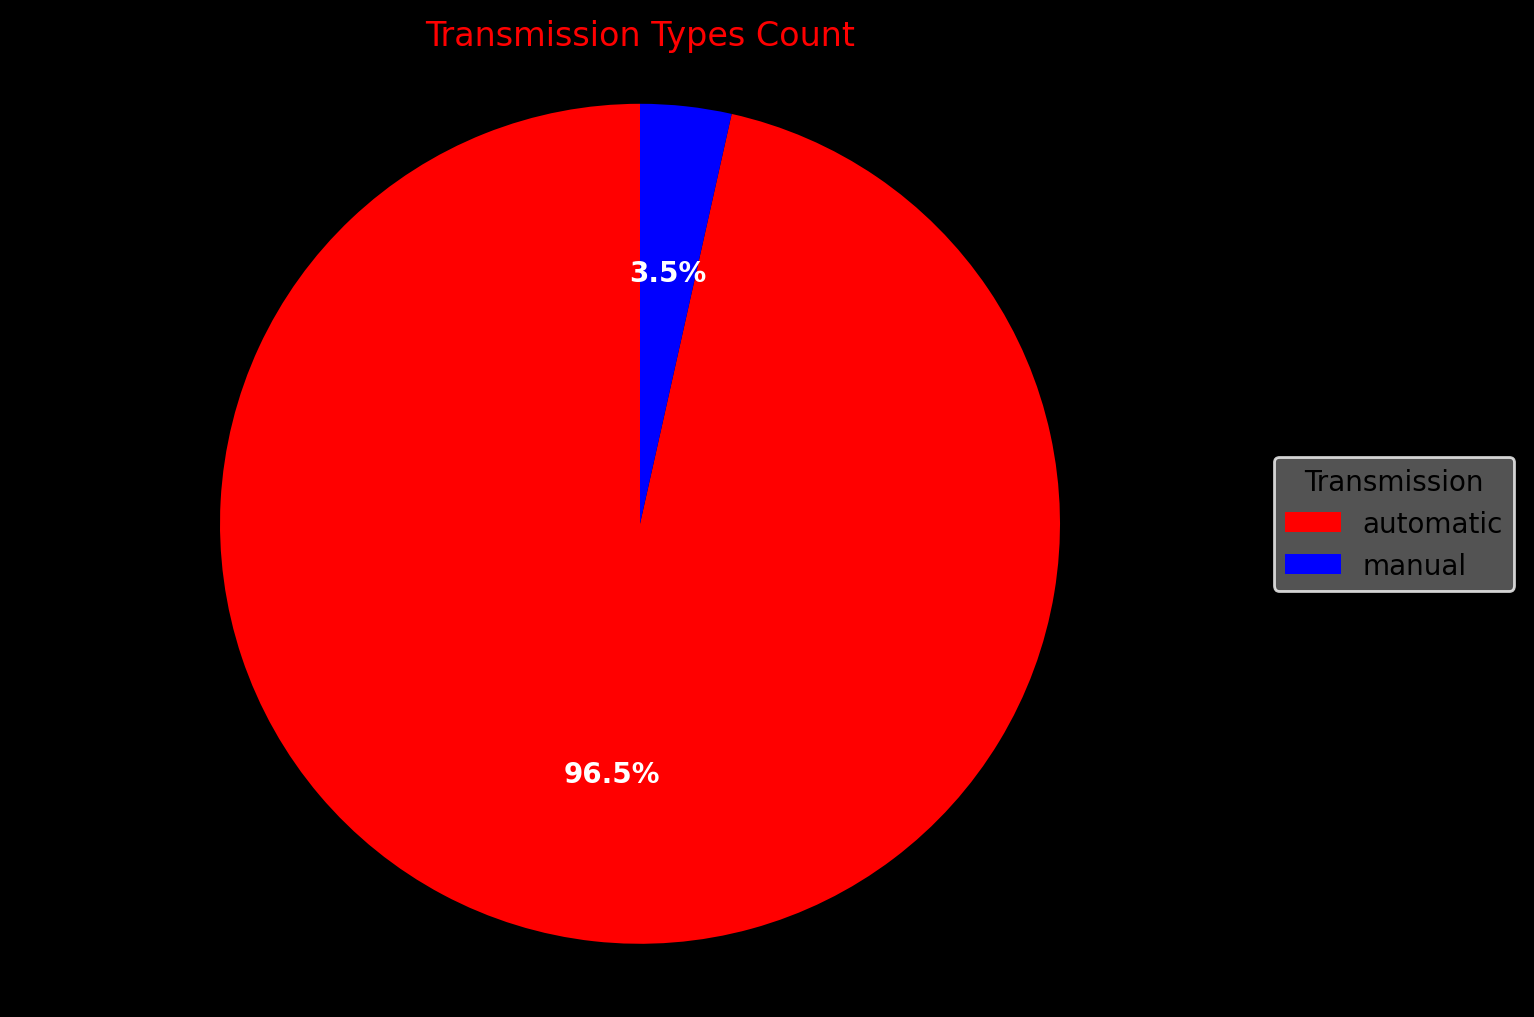

In [518]:
tsm = cleaned_cs['transmission'].value_counts()

plt.figure(figsize=(8, 6))

# Create pie chart with percentage labels
wedges, texts, autotexts = plt.pie(tsm, labels=tsm.index, autopct='%1.1f%%', startangle=90, colors=['red', 'blue'])

ax = plt.gca()

ax.set_facecolor('dimgray')  
plt.gcf().set_facecolor('black')  

plt.title('Transmission Types Count', color='red')
ax.axis('equal')
plt.legend(wedges, tsm.index, title='Transmission', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1), facecolor='dimgray', edgecolor='white')
plt.setp(autotexts, size=10, weight='bold', color='white')  

plt.show()


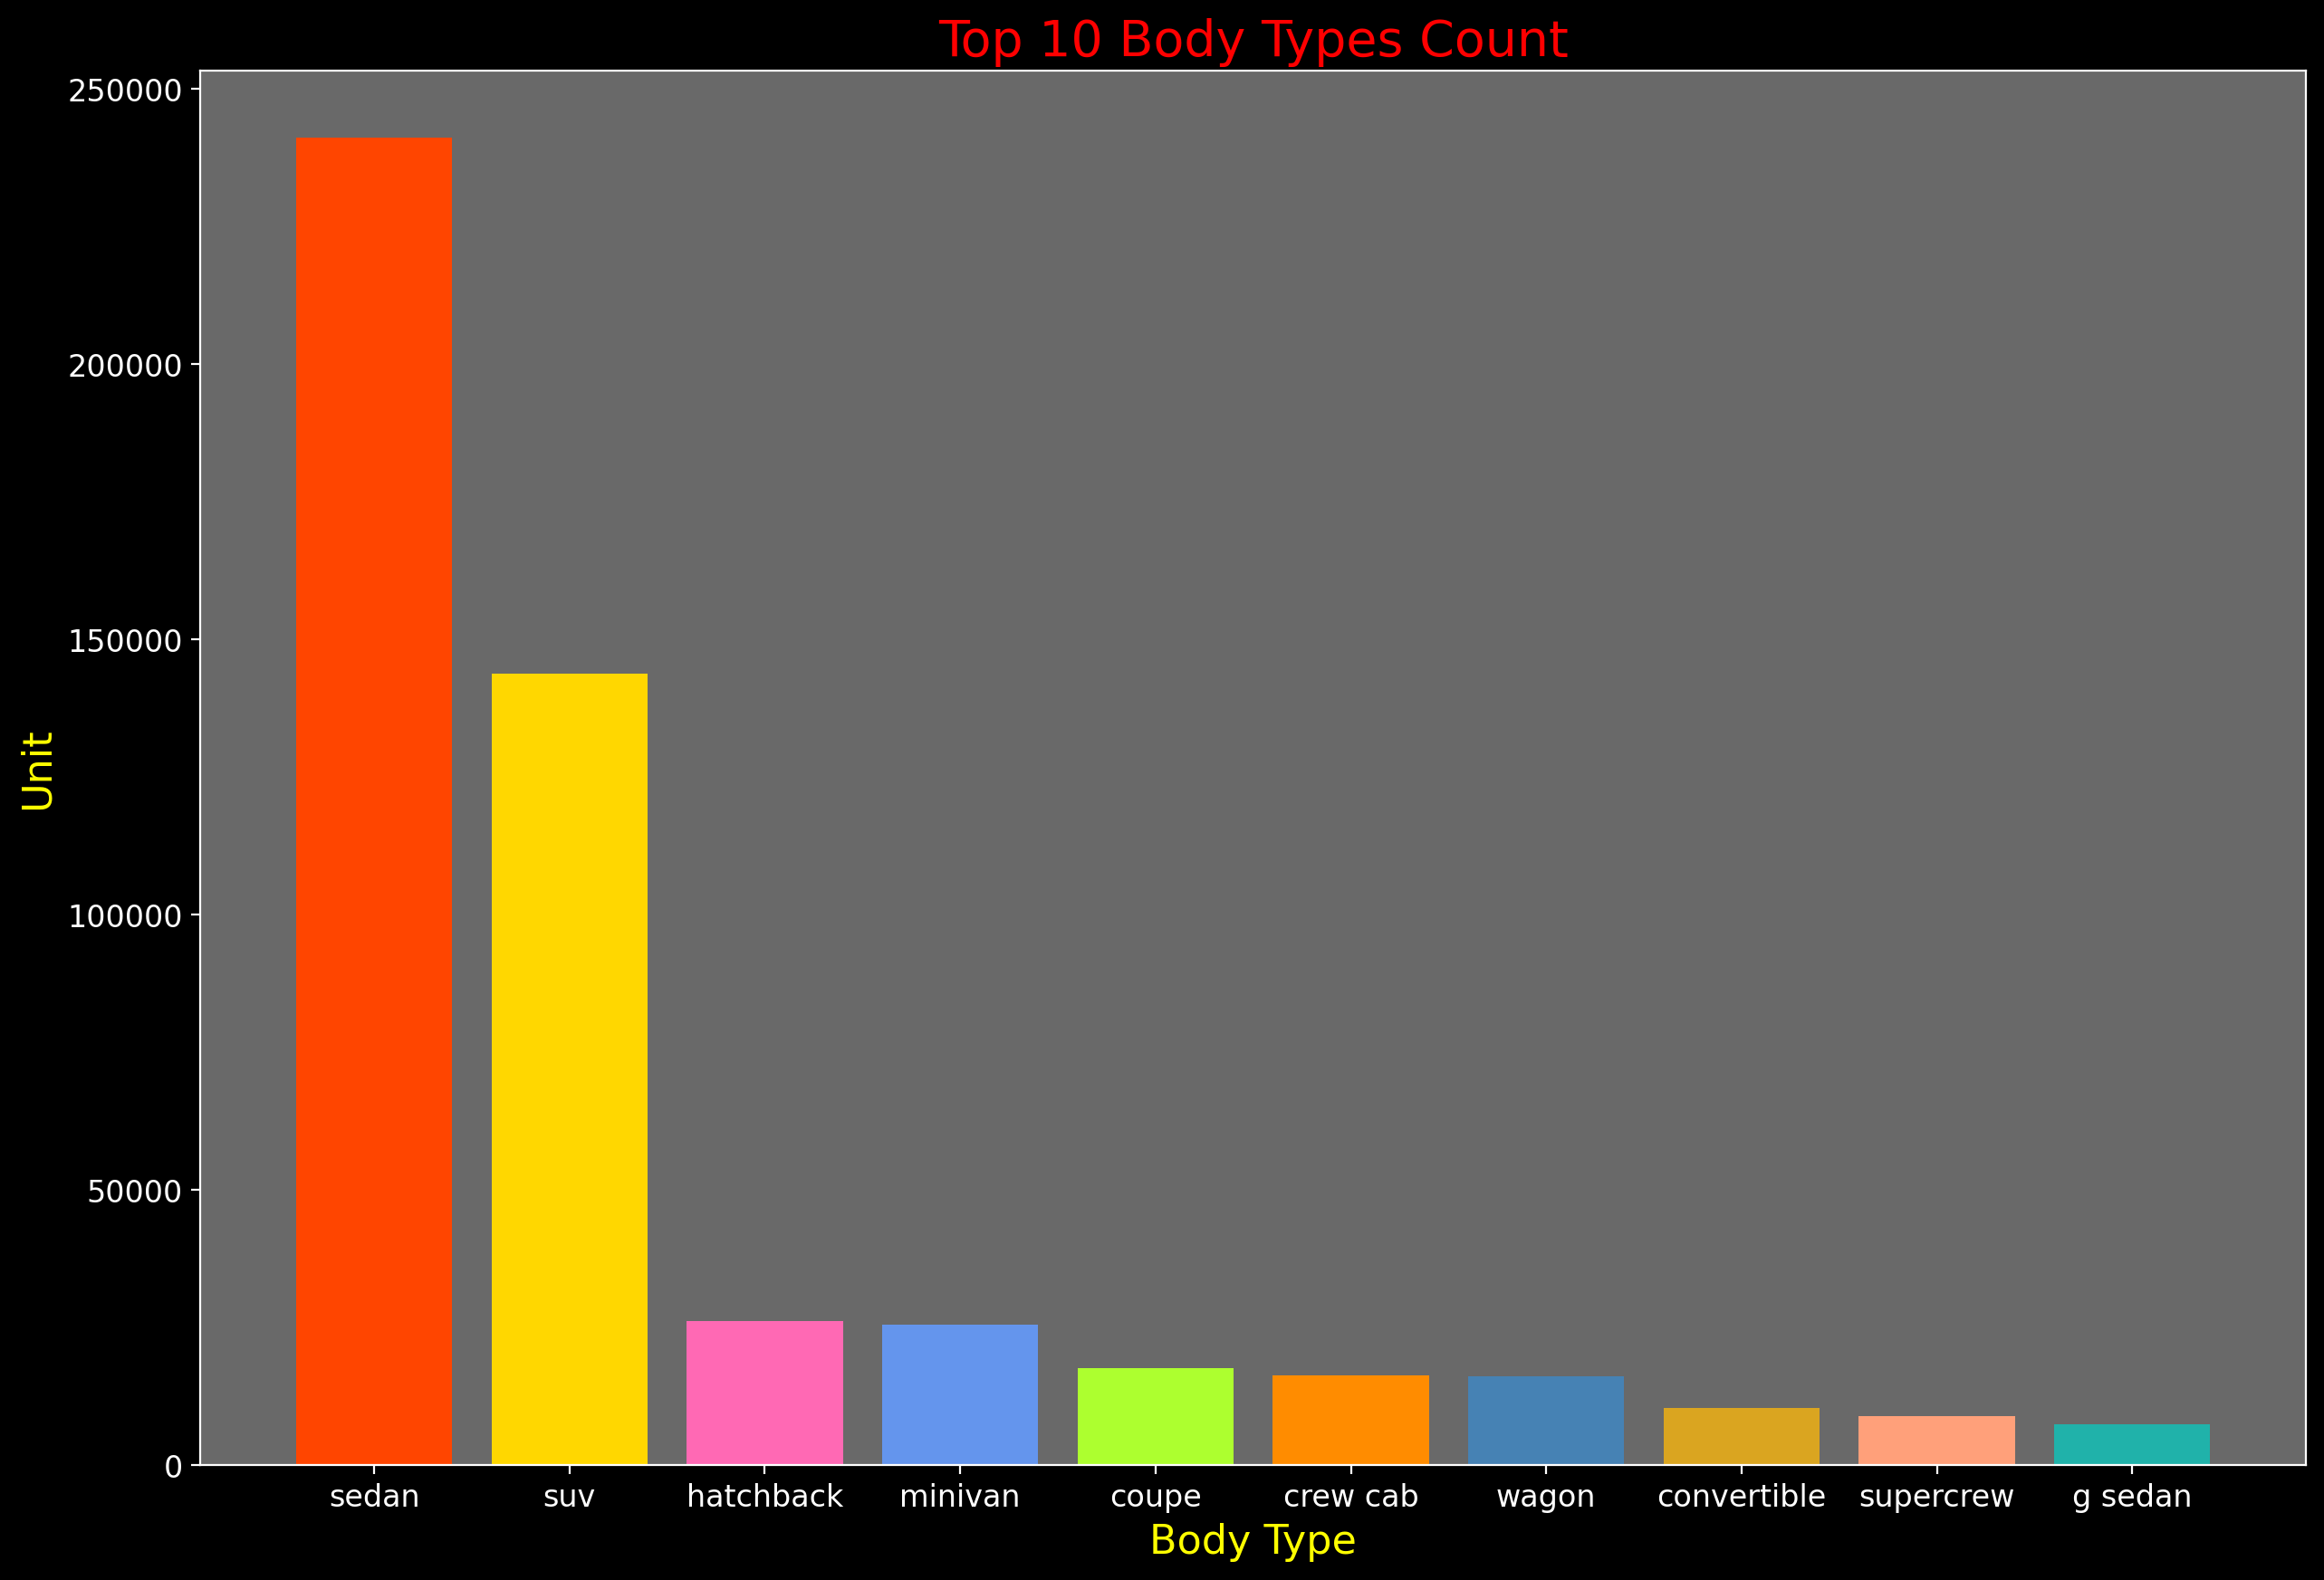

In [519]:
body = cleaned_cs['body'].value_counts().nlargest(10).reset_index()

plt.figure(figsize=(15, 10))

colors = [
    '#FF4500',  # OrangeRed
    '#FFD700',  # Gold
    '#FF69B4',  # HotPink
    '#6495ED',  # CornflowerBlue
    '#ADFF2F',  # GreenYellow
    '#FF8C00',  # DarkOrange
    '#4682B4',  # SteelBlue
    '#DAA520',  # GoldenRod
    '#FFA07A',  # LightSalmon
    '#20B2AA'   # LightSeaGreen
]

bars = plt.bar(body['body'], body['count'], color=colors)

ax = plt.gca()
ax.set_facecolor('dimgrey')
plt.gcf().set_facecolor('black')

plt.title('Top 10 Body Types Count', color='red', fontsize=20)
plt.xlabel('Body Type', color='yellow', fontsize=16)
plt.ylabel('Unit', color='yellow', fontsize=16)

ax.tick_params(axis='x', colors='white', labelsize=12)
ax.tick_params(axis='y', colors='white', labelsize=12)
plt.grid(False)
for spine in ax.spines.values():
    spine.set_edgecolor('white')

plt.show()


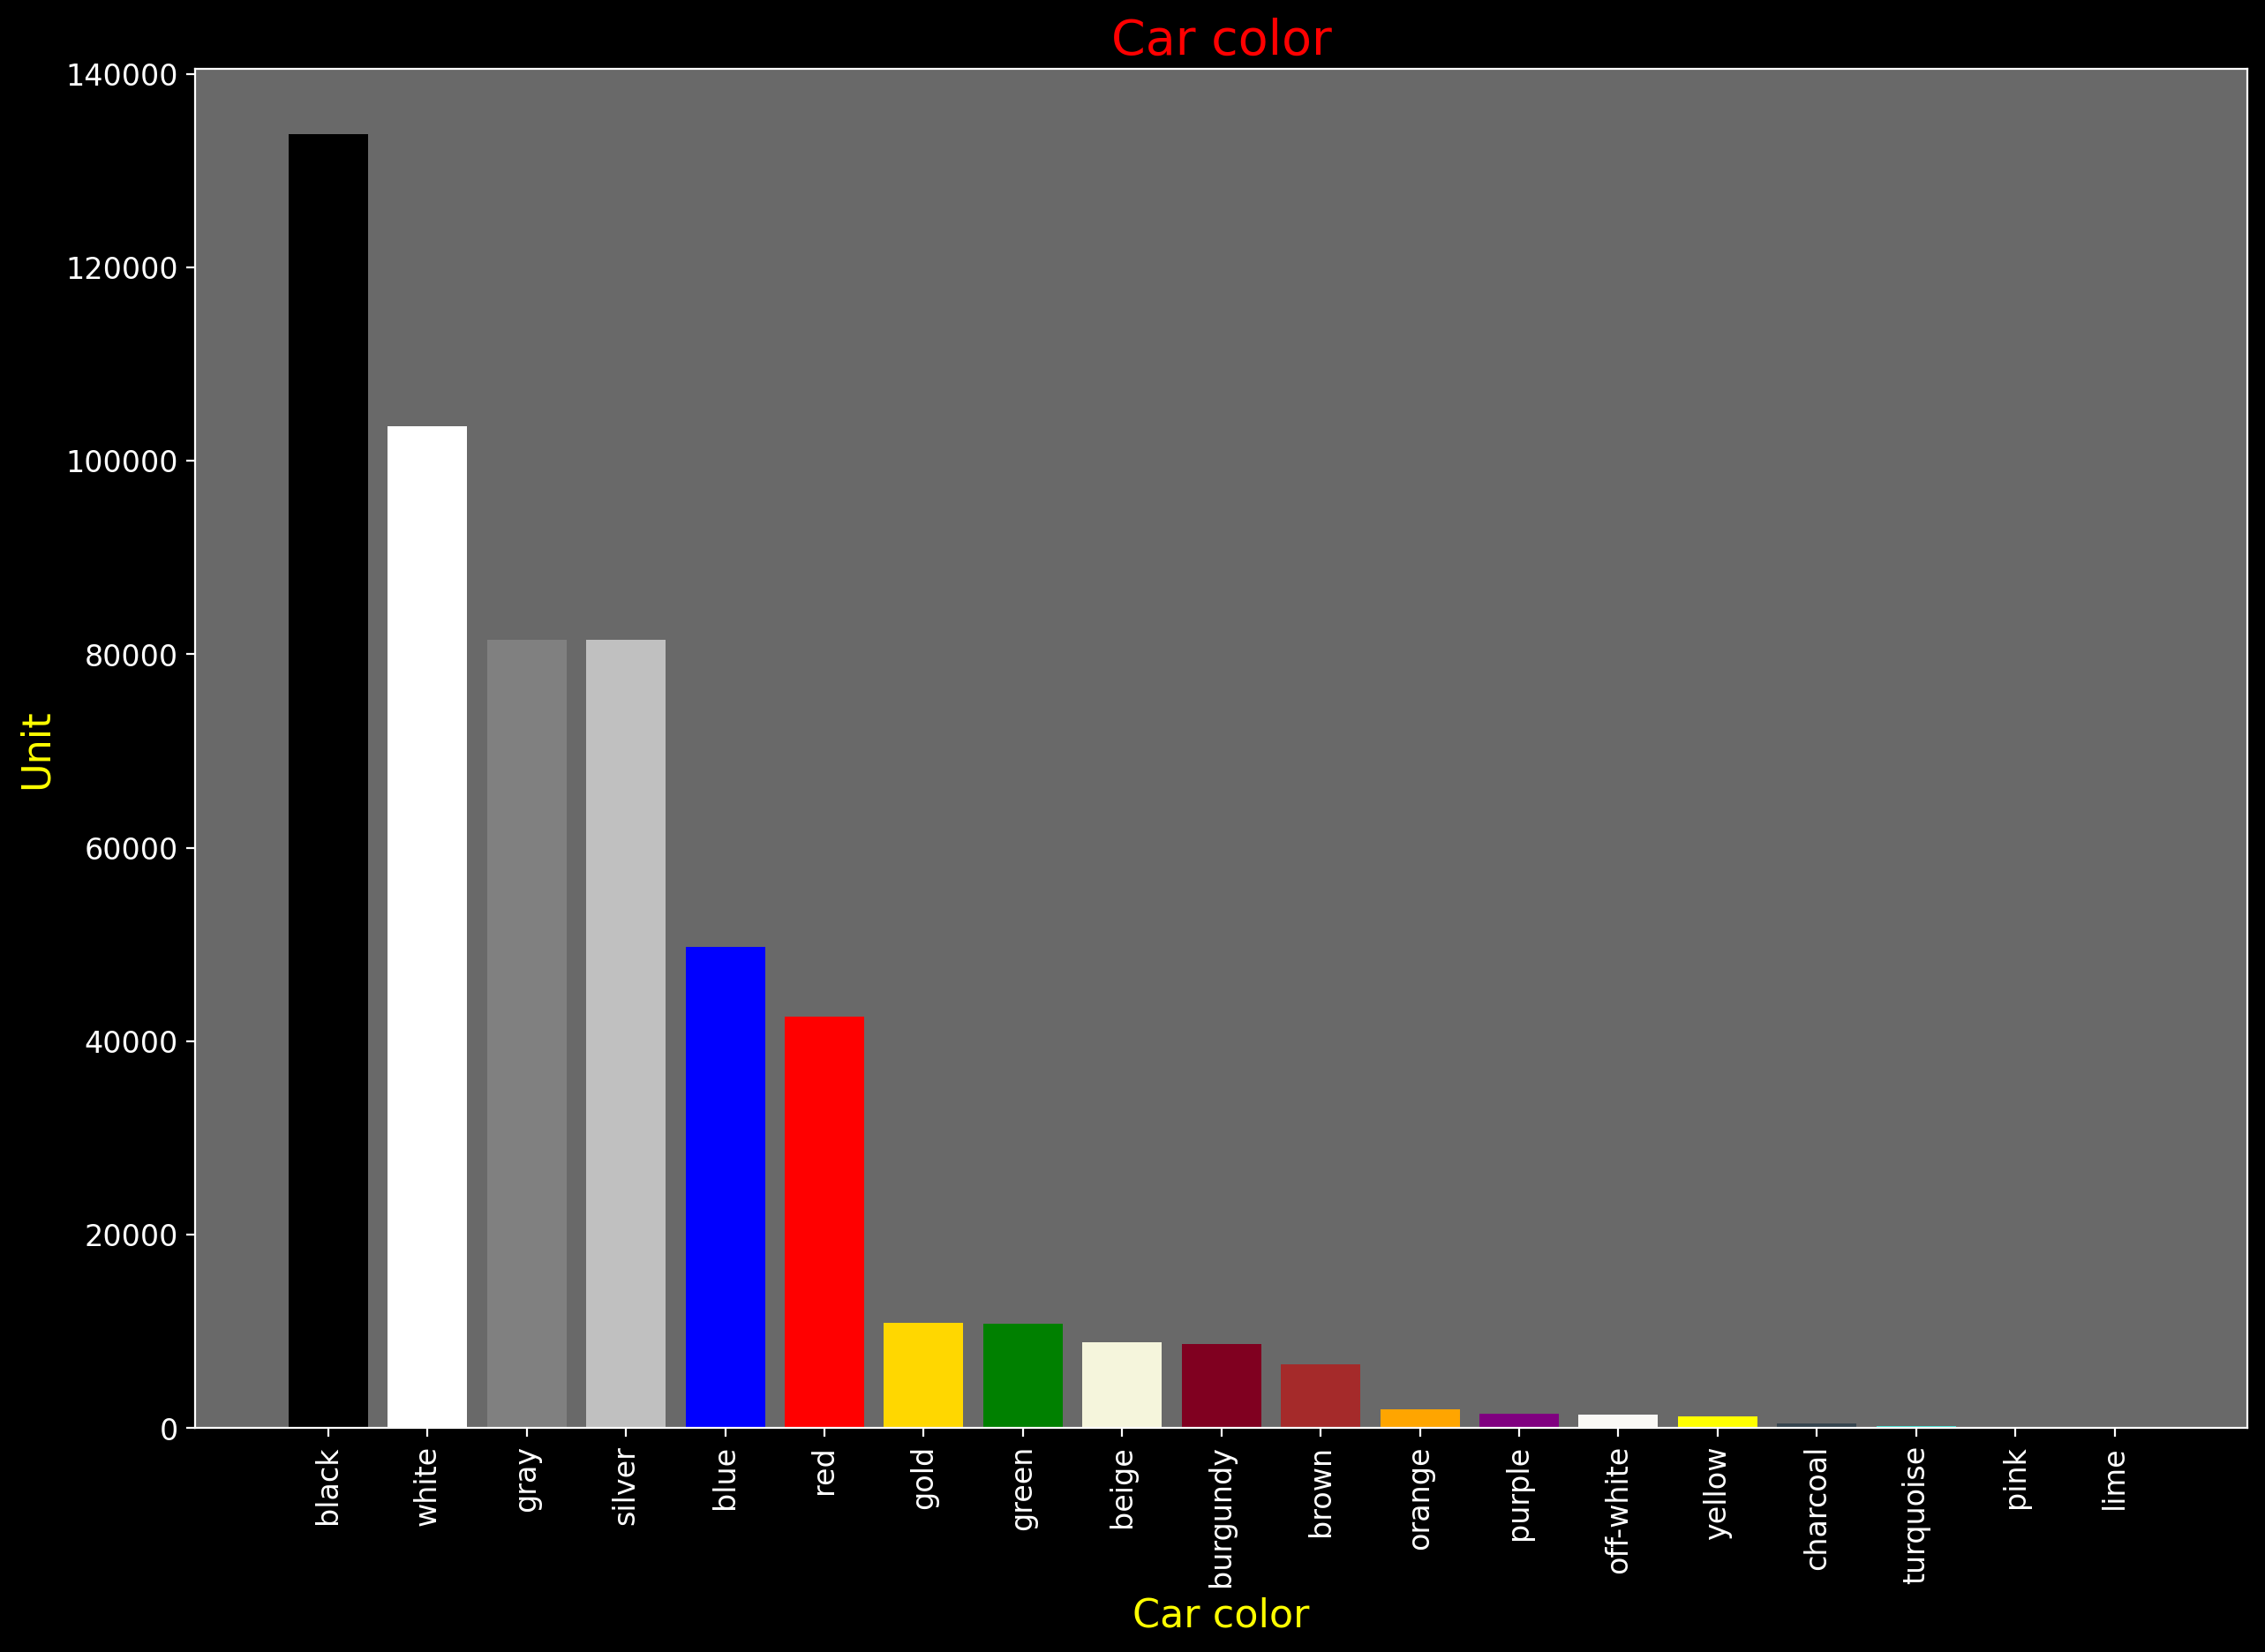

In [520]:
color_counts = cleaned_cs['color'].value_counts().reset_index()
color_counts.columns = ['color', 'count']

all_car_colors = [
    '#000000',  # black
    '#FFFFFF',  # white
    '#808080',  # gray
    '#C0C0C0',  # silver
    '#0000FF',  # blue
    '#FF0000',  # red
    '#FFD700',  # gold
    '#008000',  # green
    '#F5F5DC',  # beige
    '#800020',  # burgundy
    '#A52A2A',  # brown
    '#FFA500',  # orange
    '#800080',  # purple
    '#FAF9F6',  # off-white
    '#FFFF00',  # yellow
    '#36454F',  # charcoal
    '#40E0D0',  # turquoise
    '#FFC0CB',  # pink
    '#00FF00'   # lime
]

plt.figure(figsize=(15, 10))

bars = plt.bar(color_counts['color'], color_counts['count'], color=all_car_colors[:len(color_counts)])

ax = plt.gca()
ax.set_facecolor('dimgrey')
plt.gcf().set_facecolor('black')

plt.title('Car color', color='red', fontsize=20)
plt.xlabel('Car color', color='yellow', fontsize=16)
plt.ylabel('Unit', color='yellow', fontsize=16)
plt.grid(False)

ax.tick_params(axis='x', colors='white', labelsize=12)
ax.tick_params(axis='y', colors='white', labelsize=12)
plt.xticks(rotation=90)
plt.grid(False)
for spine in ax.spines.values():
    spine.set_edgecolor('white')

plt.show()


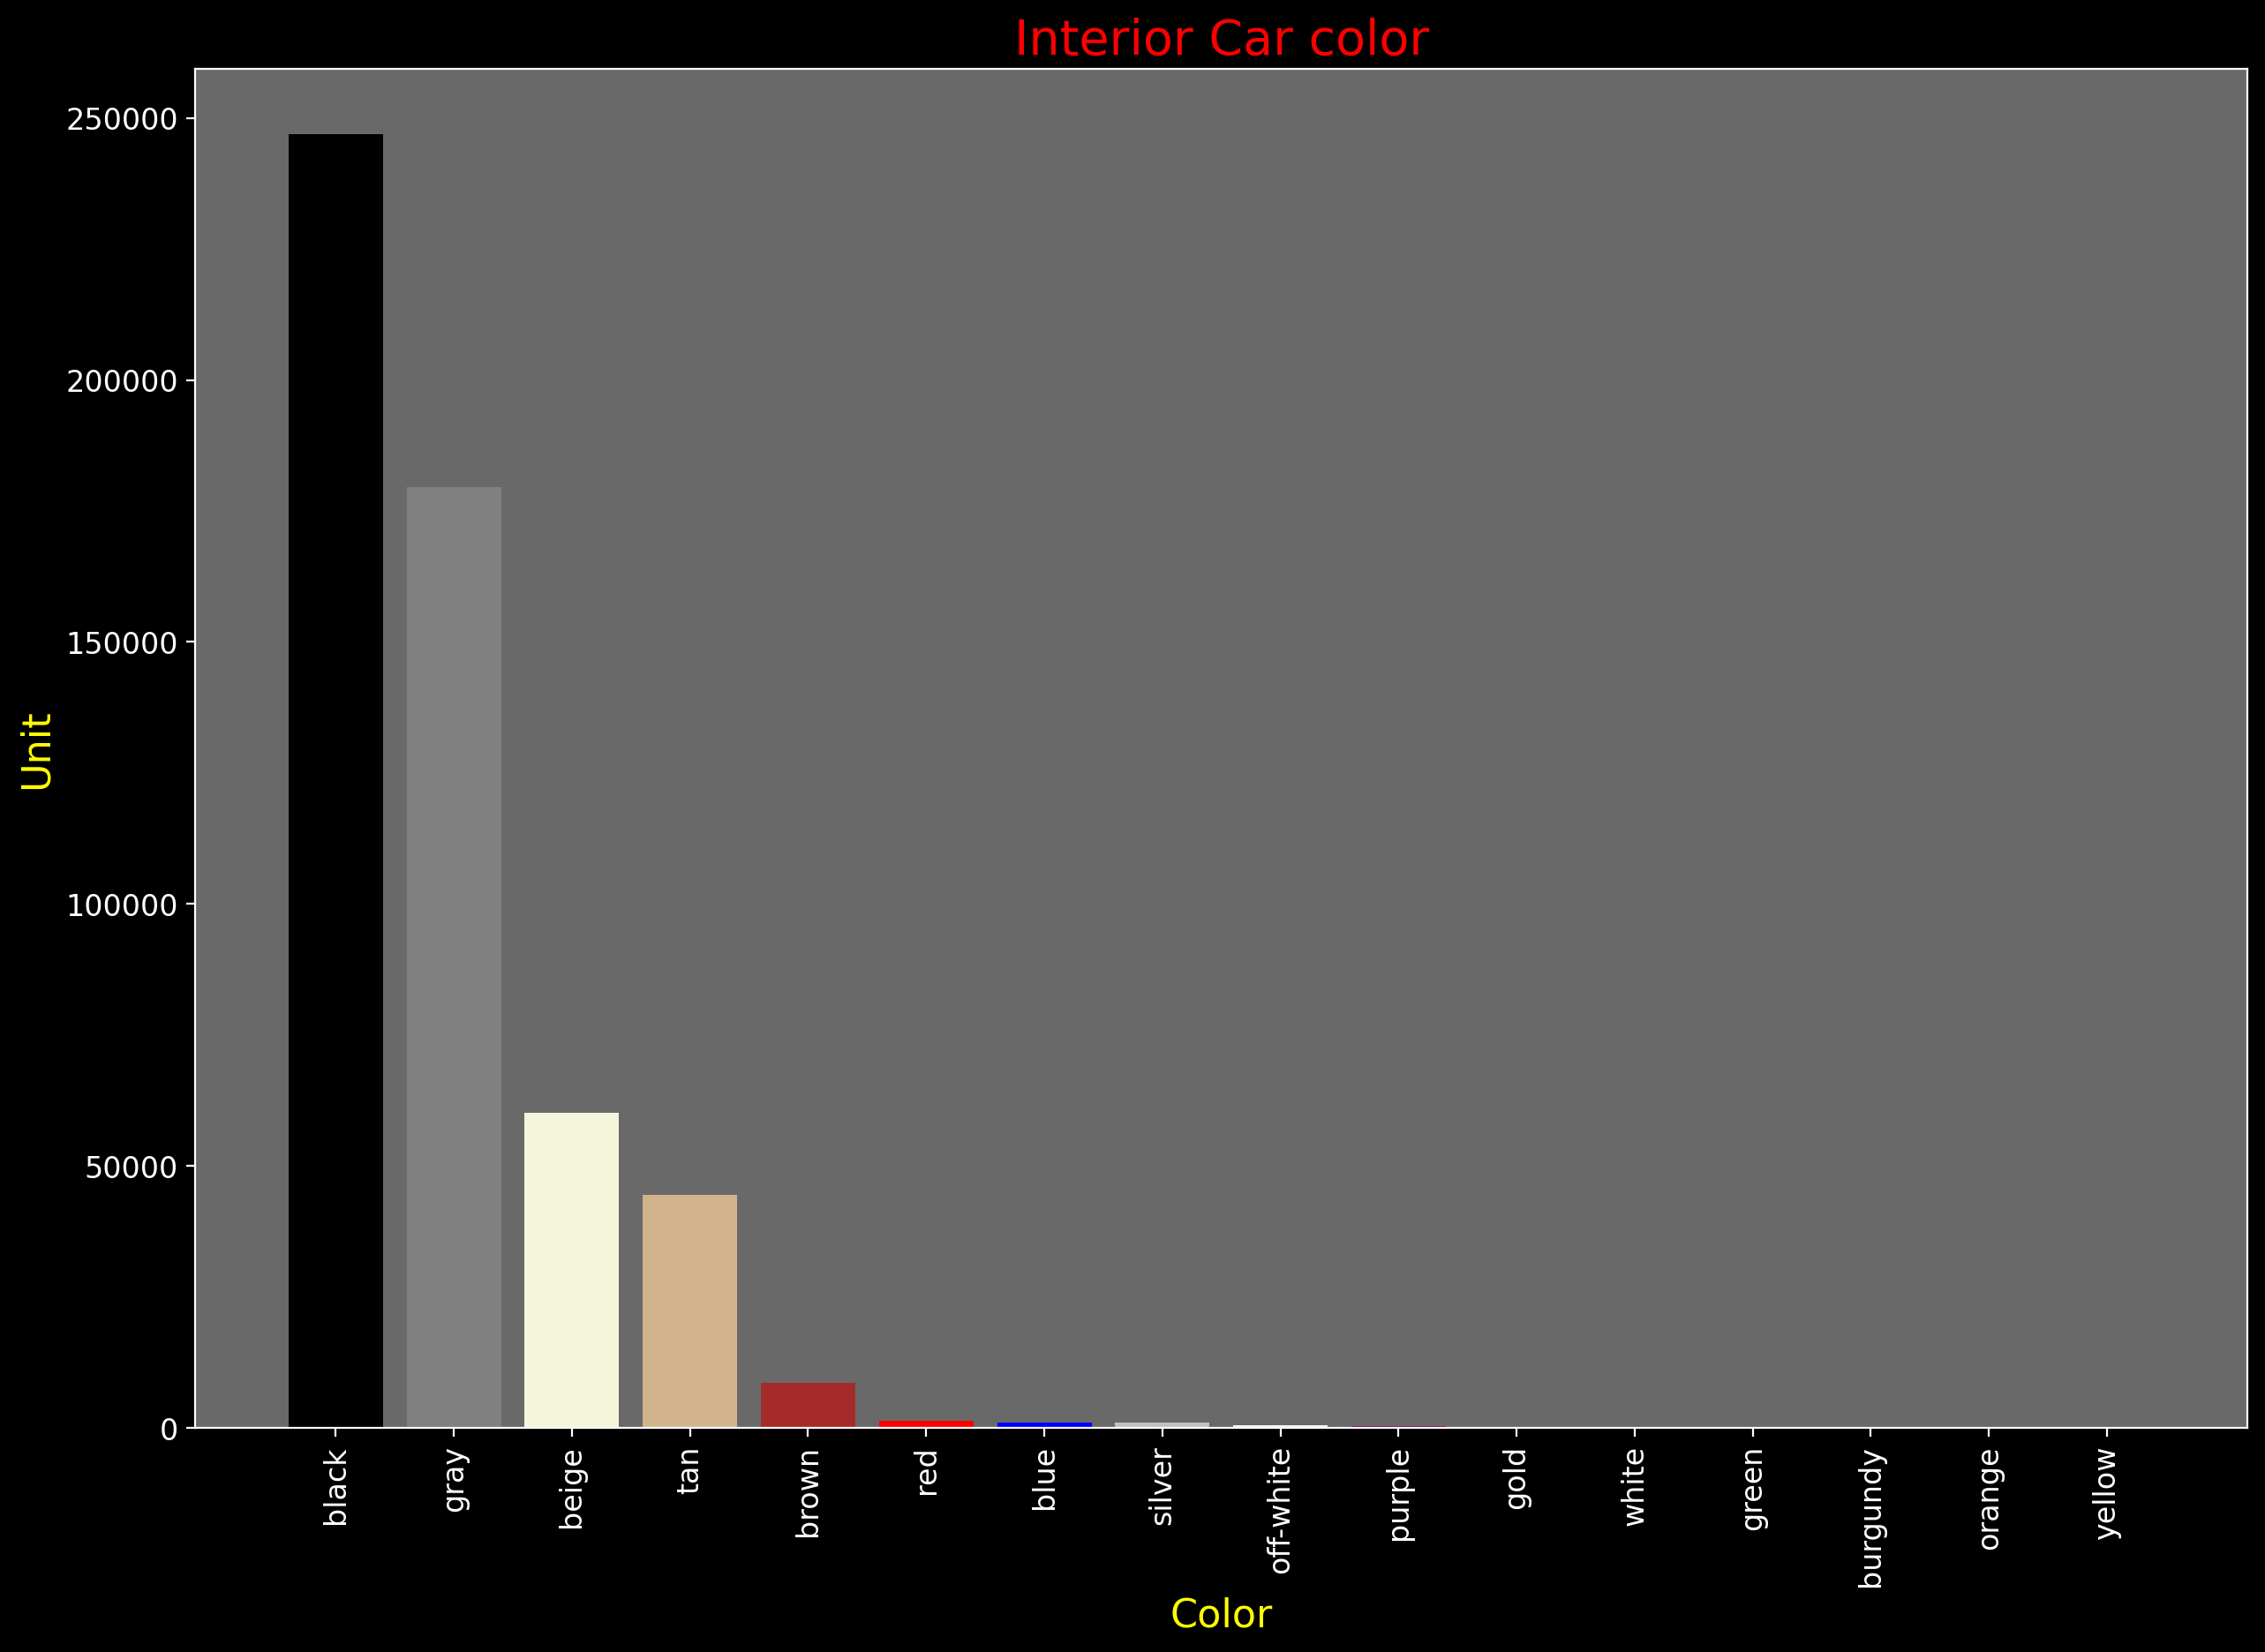

In [521]:
interior_color_counts = cleaned_cs['interior'].value_counts().reset_index()
interior_color = ['#000000', '#808080', '#f5f5dc', '#d2b48c', '#a52a2a', '#ff0000', '#0000ff', '#c0c0c0', '#f5f5f5', '#800080', '#ffd700', '#ffffff', '#008000', '#800020', '#ffa500', '#ffff00']

plt.figure(figsize=(15, 10))
bars = plt.bar(interior_color_counts['interior'], interior_color_counts['count'], color=interior_color[:len(color_counts)])

ax = plt.gca()
ax.set_facecolor('dimgray')
plt.gcf().set_facecolor('black')

plt.title('Interior Car color', color='red', fontsize=20)
plt.xlabel('Color', color='yellow', fontsize=16)
plt.ylabel('Unit', color='yellow', fontsize=16)

ax.tick_params(axis='x', colors='white', labelsize=12)
ax.tick_params(axis='y', colors='white', labelsize=12)
plt.xticks(rotation=90)
plt.grid(False)
for spine in ax.spines.values():
    spine.set_edgecolor('white')

plt.show()

In [522]:
model = cleaned_cs.groupby('model').size().reset_index(name='count')
model = model.sort_values(by='count', ascending=False)

print(model)


          model  count
64       altima  19349
260       f-150  14479
288      fusion  12945
121       camry  12545
244      escape  11861
..          ...    ...
24   458 italia      1
23    420-class      1
22    400-class      1
650      spirit      1
392    le baron      1

[772 rows x 2 columns]


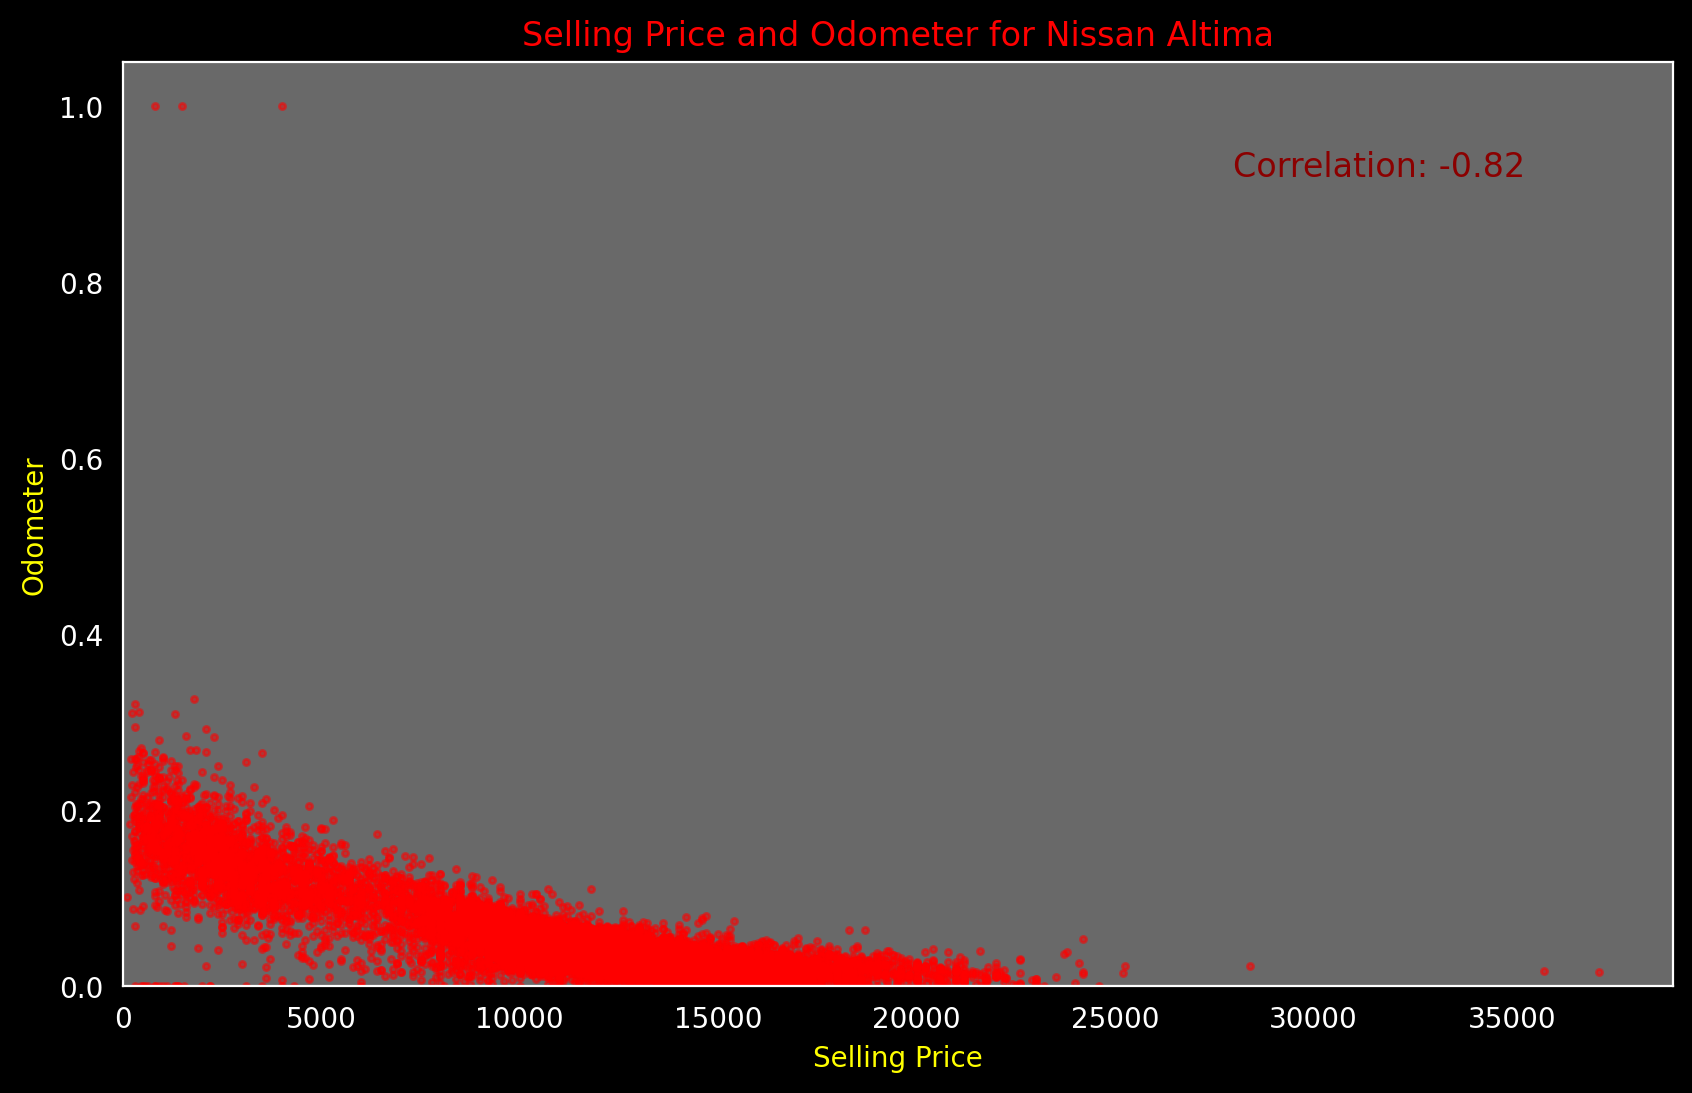

In [523]:
altima = cleaned_cs[cleaned_cs['model'] == 'altima']
altima_corr = altima['sellingprice'].corr(altima['odometer'])
plt.figure(figsize=(10, 6), facecolor='black')
plt.scatter(x=altima['sellingprice'], y=altima['odometer'], s=5, c='red', alpha=0.5)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.xlabel('Selling Price', color='yellow')
plt.ylabel('Odometer', color='yellow')
plt.title('Selling Price and Odometer for Nissan Altima', color='red')
plt.xticks(color='white')
plt.yticks(color='white')
plt.gca().set_facecolor('dimgrey')
plt.grid(False)

ax = plt.gca()
for spine in ax.spines.values():
    spine.set_edgecolor('white')


plt.text(x=altima['sellingprice'].max() - (altima['sellingprice'].max() - altima['sellingprice'].min()) * 0.05, 
         y=altima['odometer'].max() - (altima['odometer'].max() - altima['odometer'].min()) * 0.05, 
         s=f'Correlation: {altima_corr:.2f}', 
         fontsize=12, 
         color='darkred',
         horizontalalignment='right',
         verticalalignment='top')

plt.show()


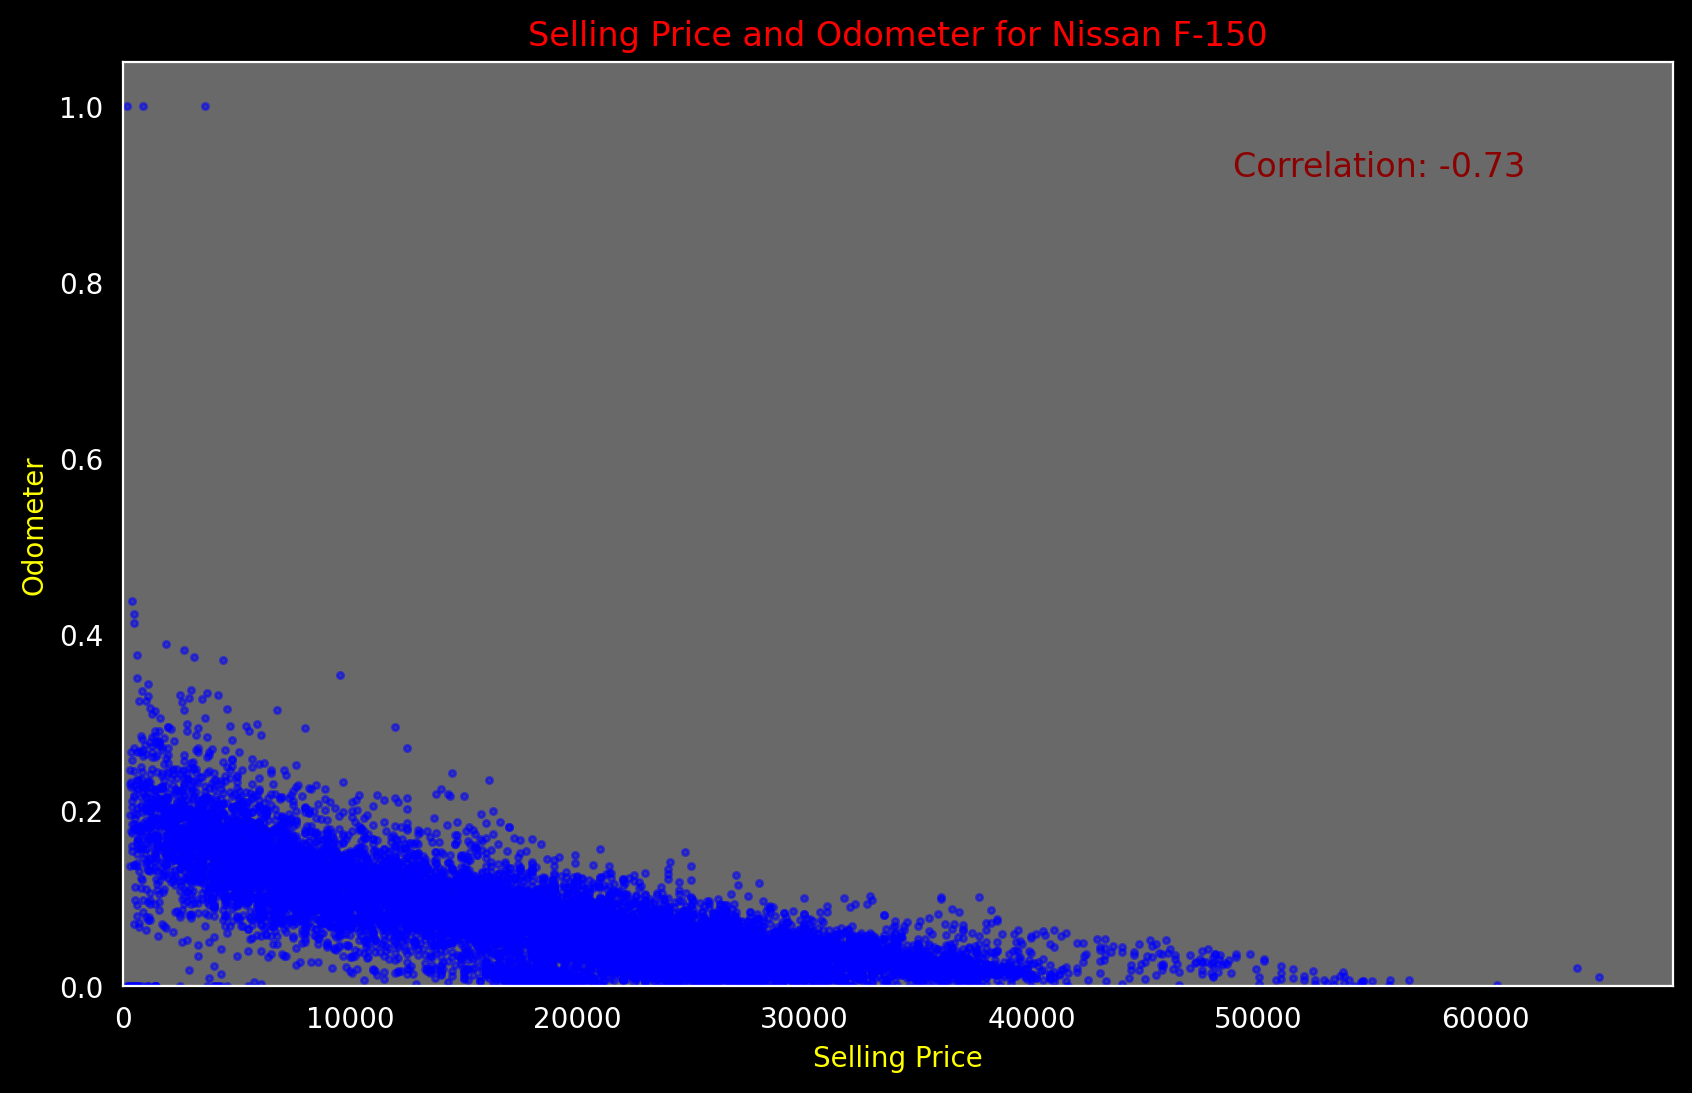

In [524]:
f150 = cleaned_cs[cleaned_cs['model'] == 'f-150']
f150_corr = f150['sellingprice'].corr(f150['odometer'])
plt.figure(figsize=(10, 6), facecolor='black')
plt.scatter(x=f150['sellingprice'],y= f150['odometer'], s=5, c='blue', alpha=0.5)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.xlabel('Selling Price', color='yellow')
plt.ylabel('Odometer', color='yellow')
plt.title('Selling Price and Odometer for Nissan F-150', color='red')
plt.xticks(color='white')
plt.yticks(color='white')
plt.gca().set_facecolor('dimgrey')
plt.grid(False)

ax = plt.gca()
for spine in ax.spines.values():
    spine.set_edgecolor('white')


plt.text(x=f150['sellingprice'].max() - (f150['sellingprice'].max() - f150['sellingprice'].min()) * 0.05, 
         y=f150['odometer'].max() - (f150['odometer'].max() - f150['odometer'].min()) * 0.05, 
         s=f'Correlation: {f150_corr:.2f}', 
         fontsize=12, 
         color='darkred',
         horizontalalignment='right',
         verticalalignment='top')

plt.show()




In [525]:
tm = cleaned_cs[['make', 'model', 'color']]
tm_gs = tm.groupby(['make', 'model', 'color']).size().reset_index(name='count_color')
top_makes = tm_gs.groupby('make')['count_color'].sum().nlargest(5).index.tolist()
top_5_tm_gs = tm_gs[tm_gs['make'].isin(top_makes)]
top_5_tm_gs = top_5_tm_gs.sort_values(by=['make', 'model', 'count_color'], ascending=[True, True, False])

fig = px.treemap(top_5_tm_gs, path=['make', 'model', 'color'], values='count_color',
                 color='count_color', color_continuous_scale='Inferno', 
                 title='Top 5 Brands by Model and Color Count',
                 width=1300, height=1000)

fig.update_layout(
    margin=dict(t=50, l=0, r=0, b=0),  
    paper_bgcolor='black',  
    font=dict(color='red') 
)

fig.show()


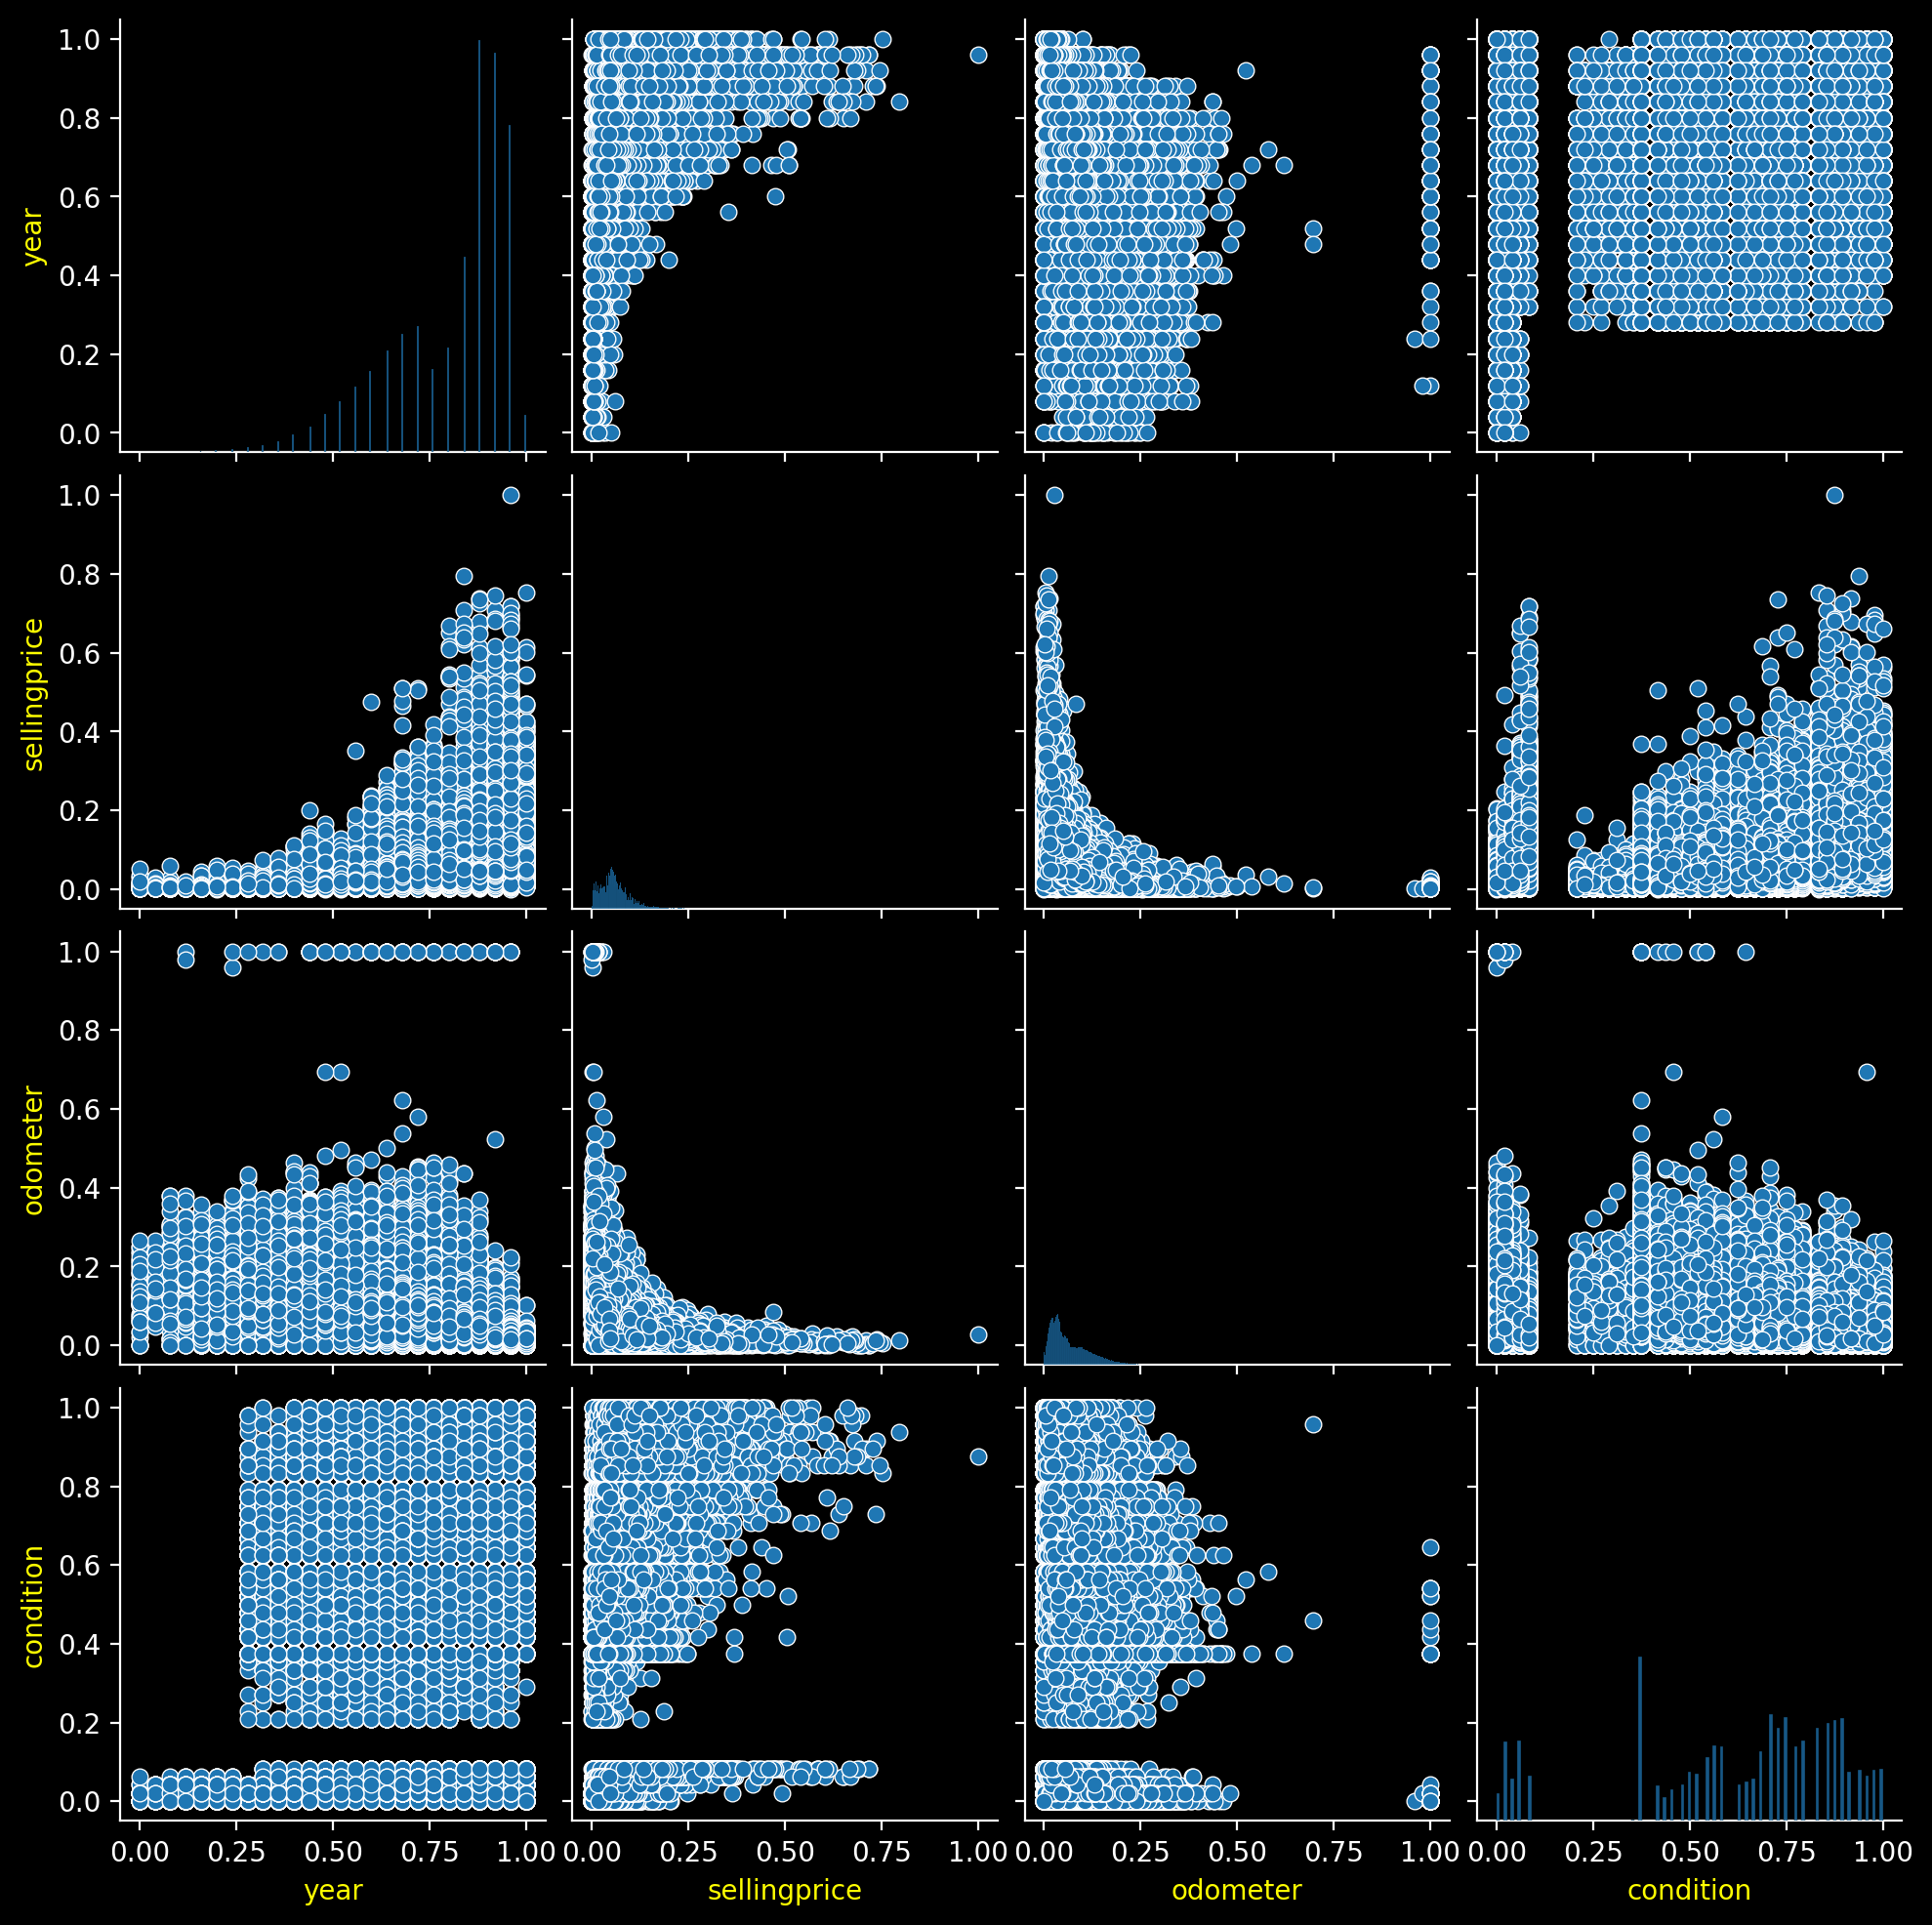

In [526]:
re = cleaned_cs[['year', 'sellingprice', 'odometer', 'condition']]

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(re)
scaled_df = pd.DataFrame(scaled_data, columns=re.columns)

g = sns.pairplot(scaled_df)

for ax in g.axes.flatten():
    ax.set_title('')
    ax.grid(False)
    ax.set_facecolor('black')  
    ax.xaxis.label.set_color('yellow')
    ax.yaxis.label.set_color('yellow')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
   
    for spine in ax.spines.values():
        spine.set_edgecolor('white')

plt.gcf().set_facecolor('black')

plt.show()


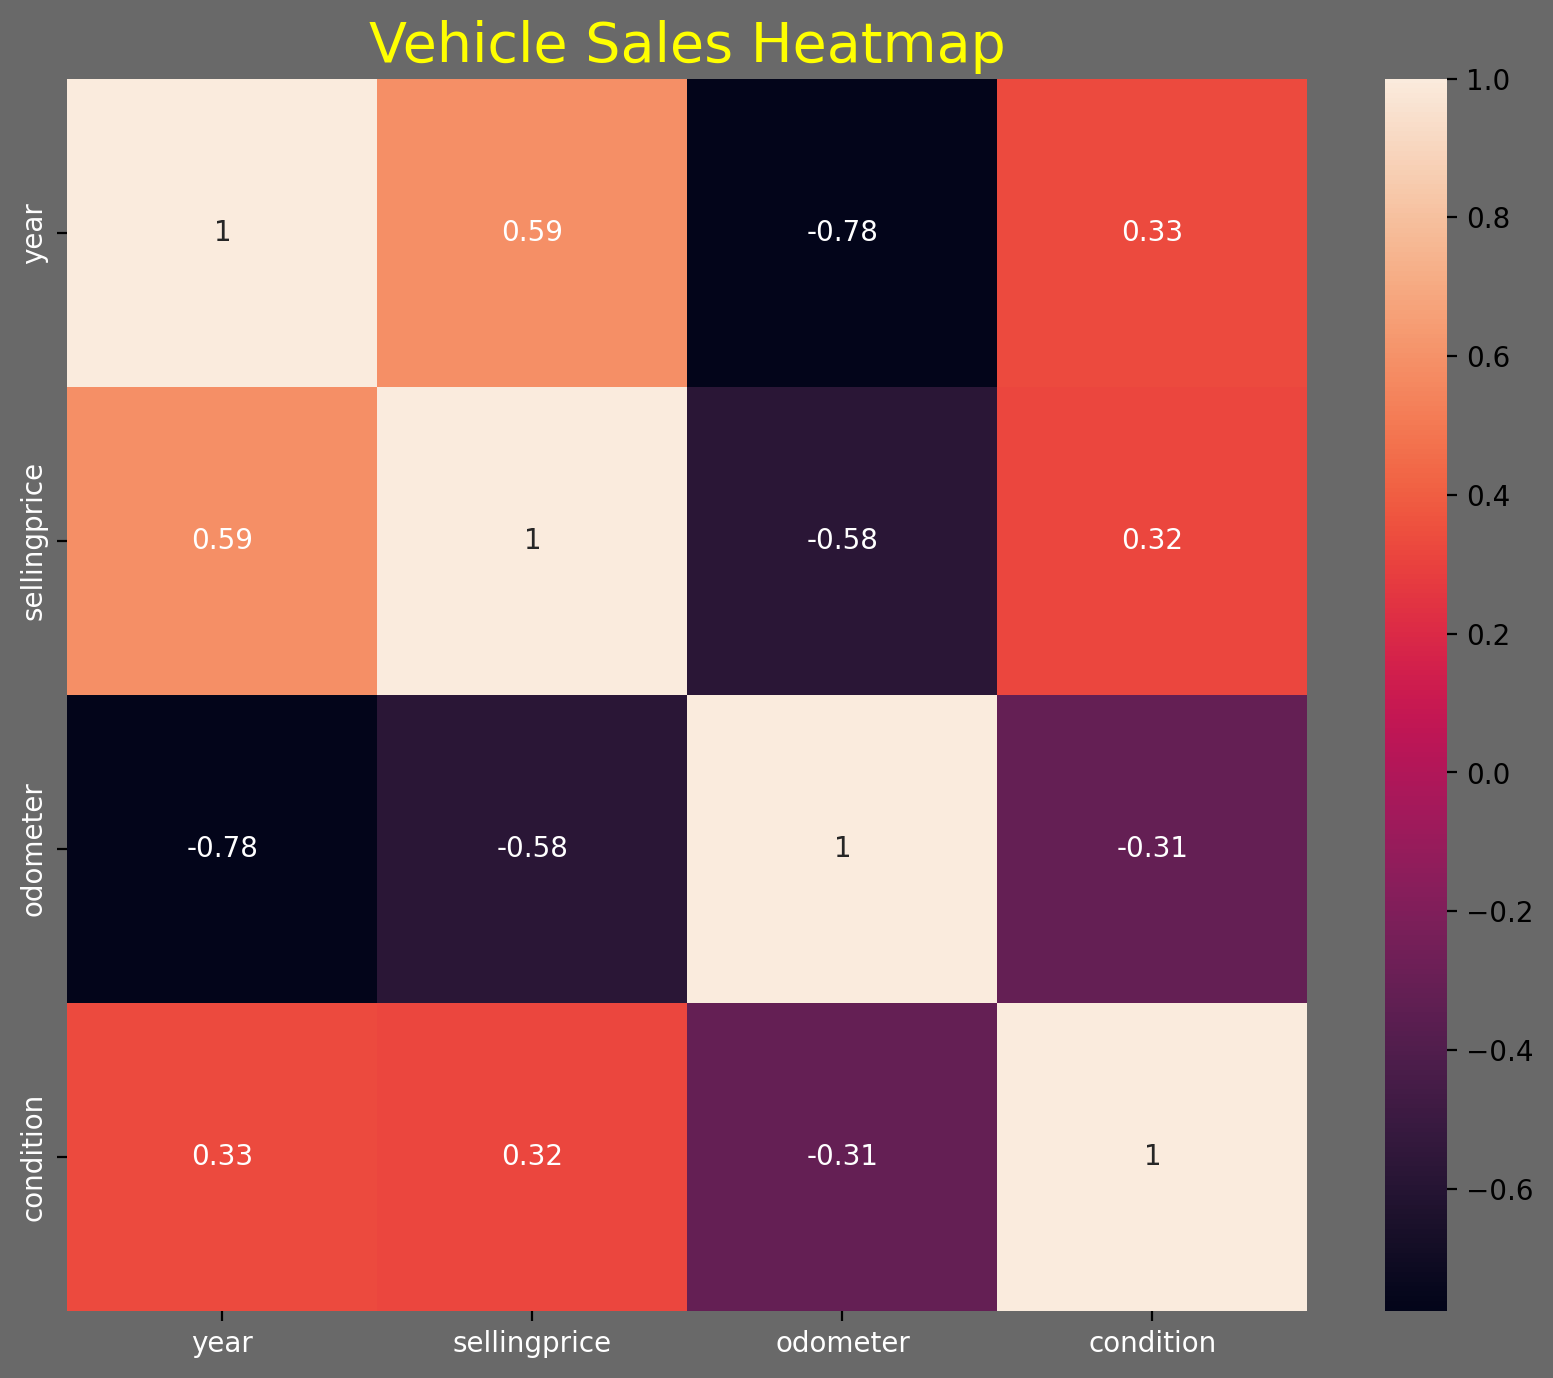

In [527]:
re_corr = cleaned_cs[['year','sellingprice','odometer','condition']].corr()
plt.figure(figsize=(10, 8),facecolor='dimgrey',)
sns.heatmap(re_corr, annot=True, cmap='rocket')
plt.title('Vehicle Sales Heatmap',color='yellow',fontsize=20)
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

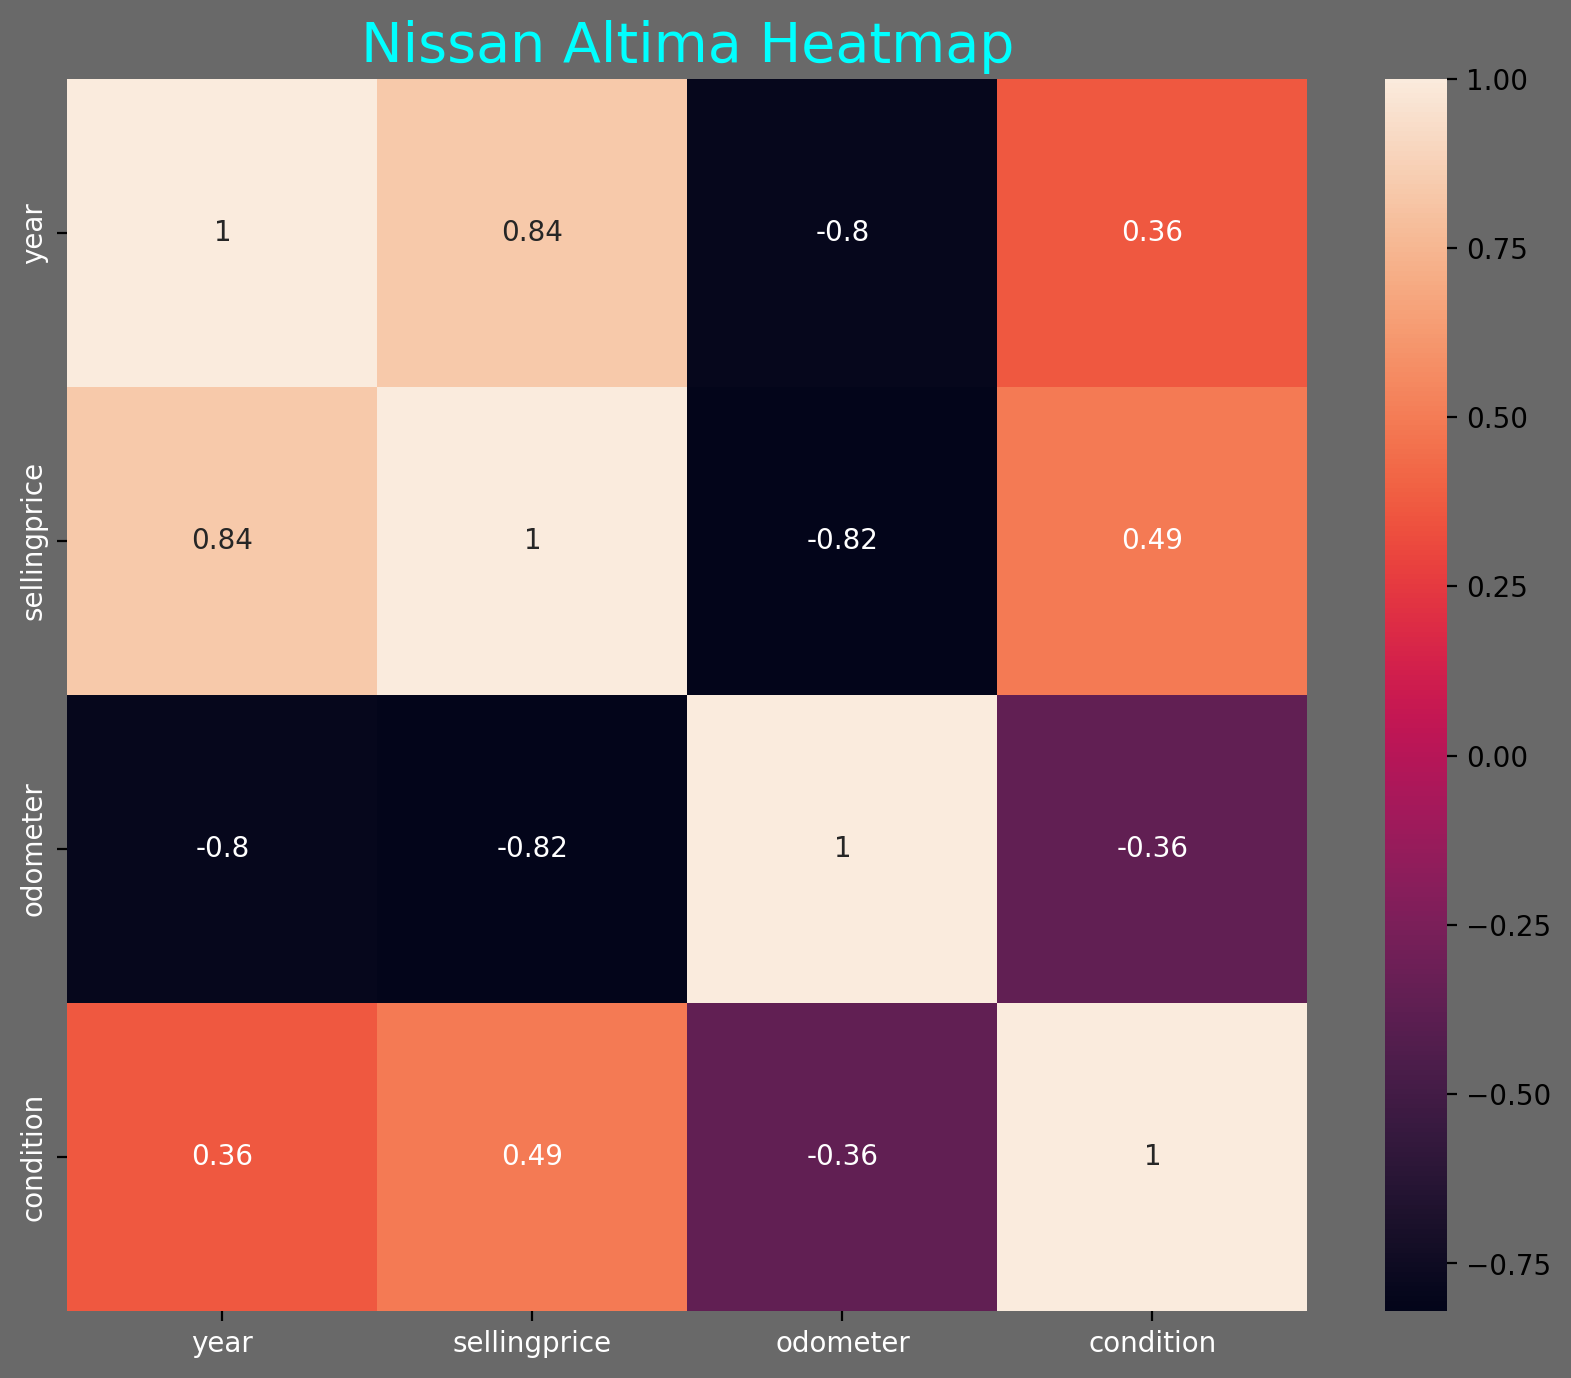

In [528]:
altima = cleaned_cs[cleaned_cs['model'] == 'altima']
altima_corr = altima[['year','sellingprice','odometer','condition']].corr()
plt.figure(figsize=(10, 8),facecolor='dimgrey')
sns.heatmap(altima_corr, annot=True, cmap='rocket')
plt.title('Nissan Altima Heatmap',color='Cyan',fontsize=20)
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

In [529]:
country = cleaned_cs[['make', 'model', 'color', 'state']]
state_c = country.groupby(['state', 'make', 'model', 'color']).size().reset_index()
state_c = state_c.groupby('state').sum().reset_index()
state_c['state'] = state_c['state'].str.upper()
state_c = state_c.rename(columns={0: 'car_count'})
state_c['country'] = 'USA'

# Dictionary of state abbreviations and their coordinates
state_abv_coords = {
    'AL': (32.806671, -86.791130), 'AK': (61.370716, -152.404419), 'AZ': (33.729759, -111.431221),
    'AR': (34.969704, -92.373123), 'CA': (36.116203, -119.681564), 'CO': (39.059811, -105.311104),
    'CT': (41.597782, -72.755371), 'DE': (39.318523, -75.507141), 'FL': (27.766279, -81.686783),
    'GA': (33.040619, -83.643074), 'HI': (21.094318, -157.498337), 'ID': (44.240459, -114.478828),
    'IL': (40.349457, -88.986137), 'IN': (39.849426, -86.258278), 'IA': (42.011539, -93.210526),
    'KS': (38.526600, -96.726486), 'KY': (37.668140, -84.670067), 'LA': (31.169546, -91.867805),
    'ME': (44.693947, -69.381927), 'MD': (39.063946, -76.802101), 'MA': (42.230171, -71.530106),
    'MI': (43.326618, -84.536095), 'MN': (45.694454, -93.900192), 'MS': (32.741646, -89.678696),
    'MO': (38.456085, -92.288368), 'MT': (46.921925, -110.454353), 'NE': (41.125370, -98.268082),
    'NV': (38.313515, -117.055374), 'NH': (43.452492, -71.563896), 'NJ': (40.298904, -74.521011),
    'NM': (34.840515, -106.248482), 'NY': (42.165726, -74.948051), 'NC': (35.630066, -79.806419),
    'ND': (47.528912, -99.784012), 'OH': (40.388783, -82.764915), 'OK': (35.565342, -96.928917),
    'OR': (44.572021, -122.070938), 'PA': (40.590752, -77.209755), 'RI': (41.680893, -71.511780),
    'SC': (33.856892, -80.945007), 'SD': (44.299782, -99.438828), 'TN': (35.747845, -86.692345),
    'TX': (31.054487, -97.563461), 'UT': (40.150032, -111.862434), 'VT': (44.045876, -72.710686),
    'VA': (37.769337, -78.169968), 'WA': (47.400902, -121.490494), 'WV': (38.491226, -80.954456),
    'WI': (44.268543, -89.616508), 'WY': (42.755966, -107.302490)
}

# Choropleth
fig = px.choropleth(state_c,
                    locations='state',
                    locationmode='USA-states',
                    color='car_count',
                    scope='usa',
                    color_continuous_scale='Inferno'  
                    )

for state, coord in state_abv_coords.items():
    fig.add_scattergeo(
        lon=[coord[1]],
        lat=[coord[0]],
        text=state,
        mode='text',
        textfont=dict(color='white', size=10, family='Arial'),
        showlegend=False
    )

fig.update_layout(
    title=dict(
        text='Vehicle Sales in the USA',
        x=0.5,
        y=0.95,
        xanchor='center',
        yanchor='top',
        font=dict(color='red', size=20, family='Arial', weight='bold')
    ),
    coloraxis_colorbar=dict(
        title=dict(text='Number of Cars', font=dict(color='yellow')),
        tickfont=dict(color='white')
    ),
    geo=dict(bgcolor='black'),
    plot_bgcolor="black",
    paper_bgcolor="black",
    dragmode=False
)

fig.show()


In [530]:
def remove_outliers(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    # IQR
    IQR = Q3 - Q1
    # Determine the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df_no_outliers
# Pick top 3 car to compare
alt = cleaned_cs[cleaned_cs['model'] == 'altima']
f150 = cleaned_cs[cleaned_cs['model'] == 'f-150']
fusion = cleaned_cs[cleaned_cs['model'] == 'fusion']

# Remove outliers
altima_no_outliers = remove_outliers(altima, 'sellingprice')
f150_no_outliers = remove_outliers(f150, 'sellingprice')
fusion_no_outliers = remove_outliers(fusion, 'sellingprice')


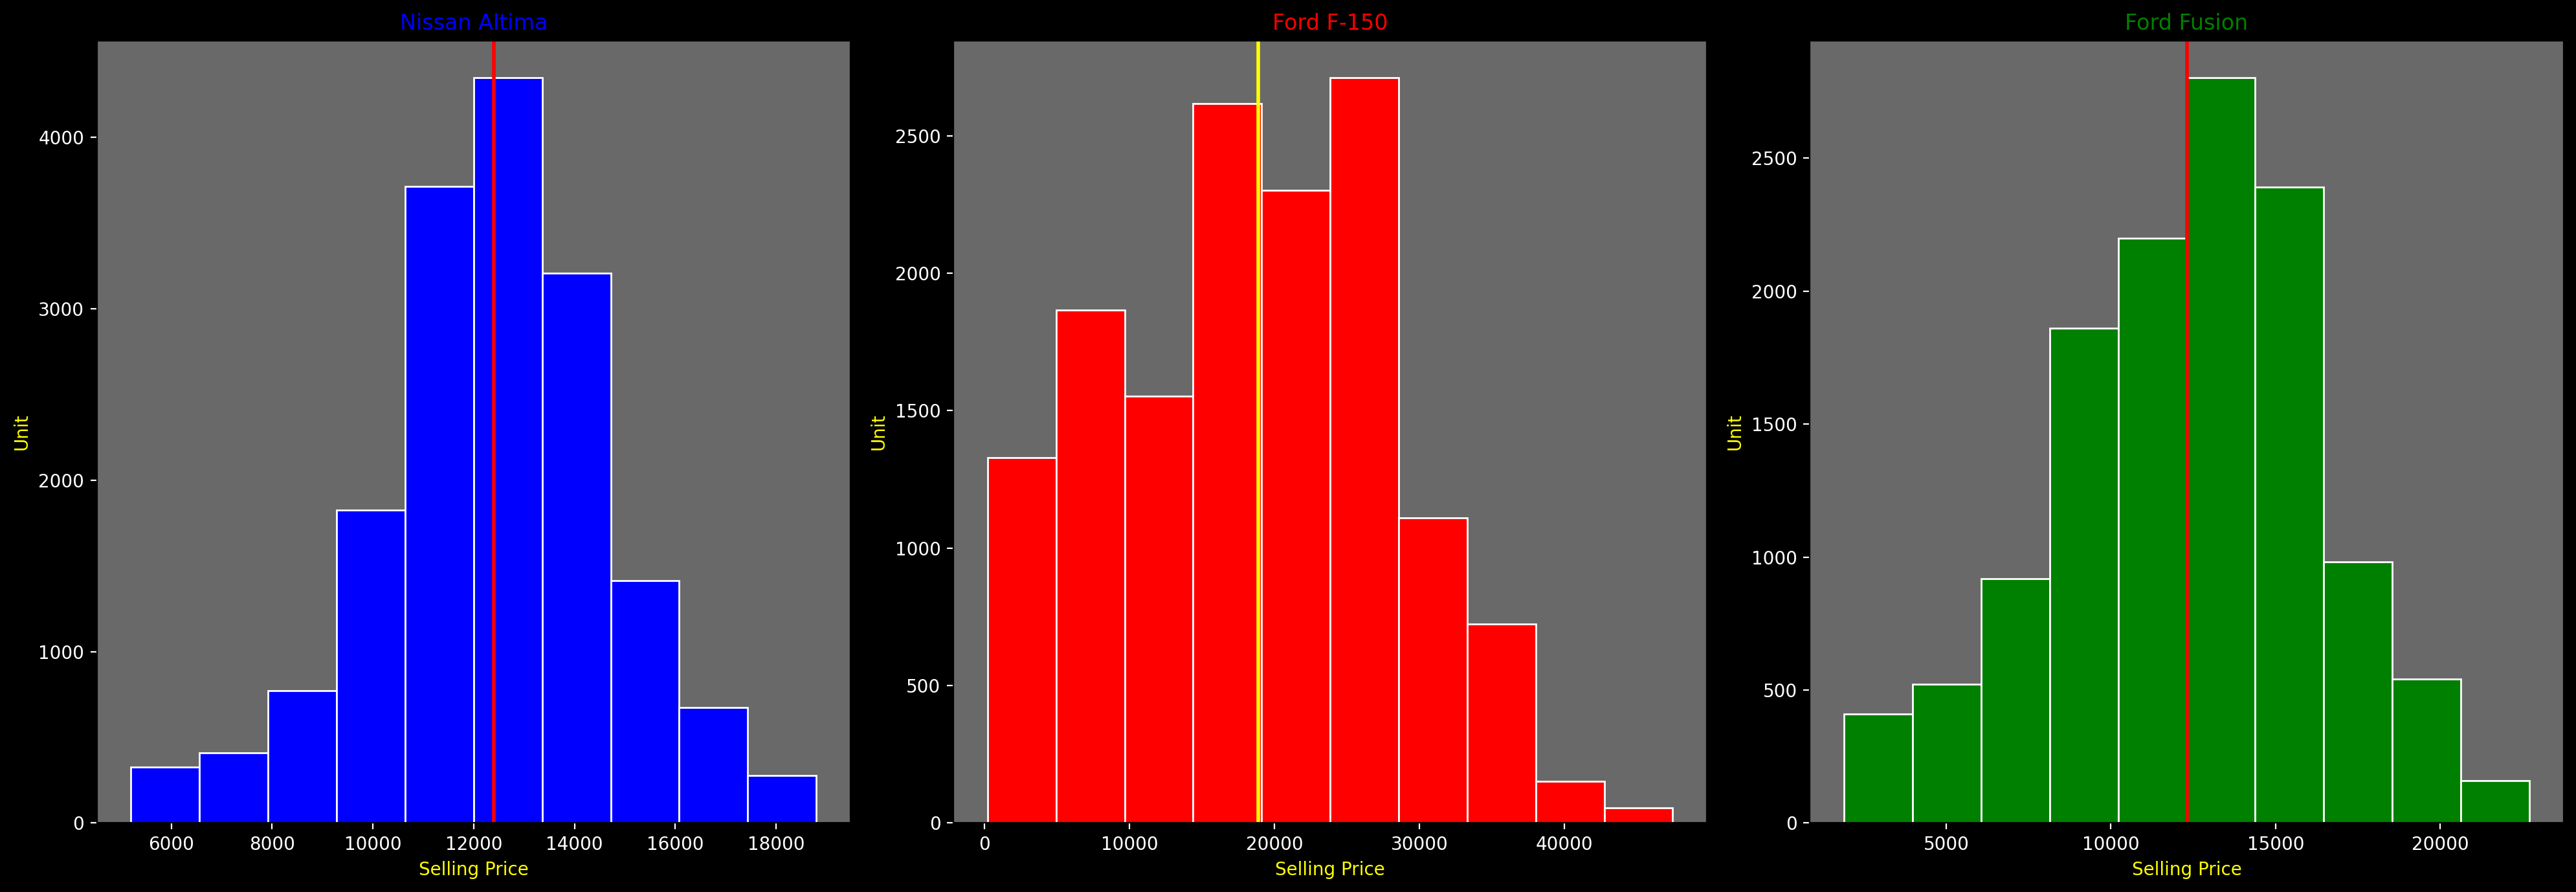

In [531]:
fig, axs = plt.subplots(1, 3, figsize=(20, 7), facecolor='black')

# Nissan Altima
axs[0].hist(altima_no_outliers['sellingprice'], color='blue', edgecolor='white')
axs[0].axvline(altima_no_outliers['sellingprice'].median(), color='red', linewidth=2) 
axs[0].set_title('Nissan Altima', color='blue')
axs[0].set_xlabel('Selling Price', color='yellow')
axs[0].set_ylabel('Unit', color='yellow')
axs[0].tick_params(axis='x', colors='white')
axs[0].tick_params(axis='y', colors='white')
axs[0].grid(False)
axs[0].set_facecolor('dimgrey')

# Ford F-150
axs[1].hist(f150_no_outliers['sellingprice'], color='red', edgecolor='white')
axs[1].axvline(f150_no_outliers['sellingprice'].median(), color='yellow', linewidth=2)
axs[1].set_title('Ford F-150', color='red')
axs[1].set_xlabel('Selling Price', color='yellow')
axs[1].set_ylabel('Unit', color='yellow')
axs[1].tick_params(axis='x', colors='white')
axs[1].tick_params(axis='y', colors='white')
axs[1].grid(False)
axs[1].set_facecolor('dimgrey')

# Ford Fusion
axs[2].hist(fusion_no_outliers['sellingprice'], color='green', edgecolor='white')
axs[2].axvline(fusion_no_outliers['sellingprice'].mean(), color='red', linewidth=2)
axs[2].set_title('Ford Fusion', color='green')
axs[2].set_xlabel('Selling Price', color='yellow')
axs[2].set_ylabel('Unit', color='yellow')
axs[2].tick_params(axis='x', colors='white')
axs[2].tick_params(axis='y', colors='white')
axs[2].grid(False)
axs[2].set_facecolor('dimgrey')

# Set overall figure color
fig.patch.set_facecolor('black')

plt.tight_layout()
plt.show()


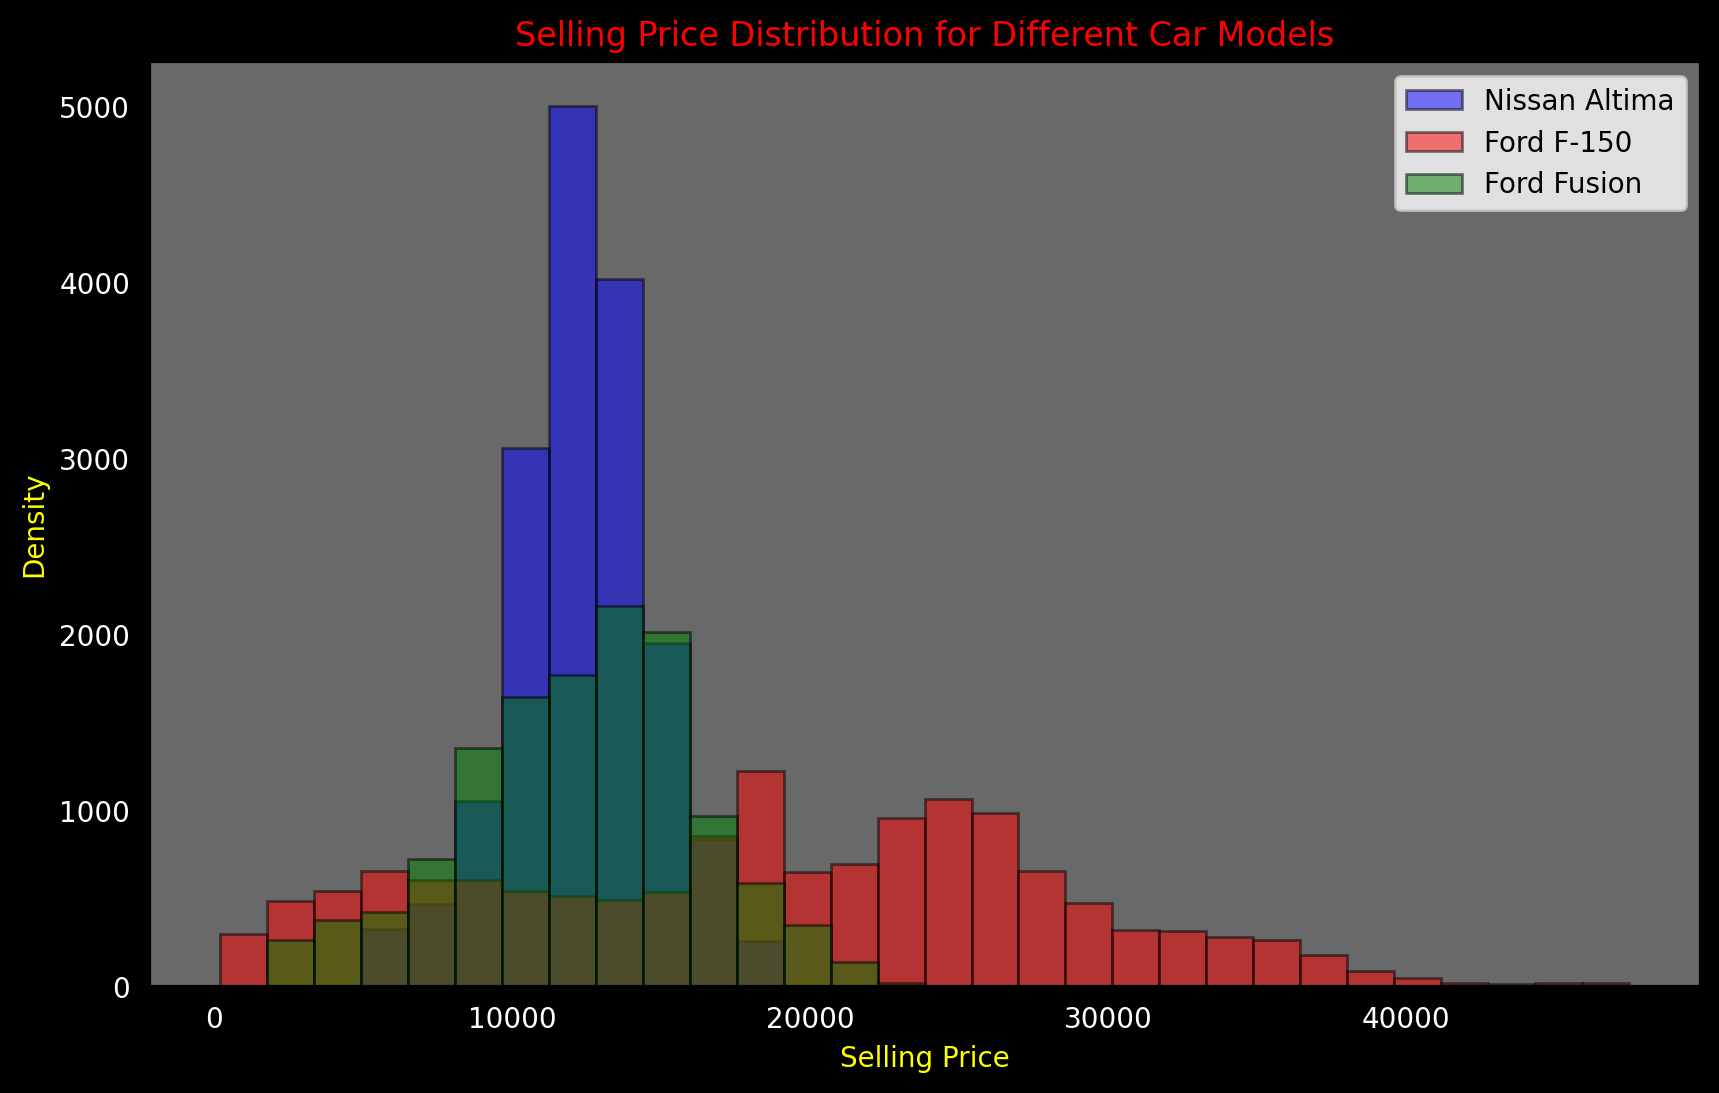

In [532]:
# Calculate the bin edges based on the combined data
all_data = pd.concat([altima_no_outliers['sellingprice'], f150_no_outliers['sellingprice'], fusion_no_outliers['sellingprice']])
bins = np.histogram_bin_edges(all_data, bins=30)

plt.figure(figsize=(10, 6), facecolor='black')
plt.hist(altima_no_outliers['sellingprice'], bins=bins, alpha=0.5, label='Nissan Altima', color='blue', edgecolor='black')
plt.hist(f150_no_outliers['sellingprice'], bins=bins, alpha=0.5, label='Ford F-150', color='red', edgecolor='black')
plt.hist(fusion_no_outliers['sellingprice'], bins=bins, alpha=0.5, label='Ford Fusion', color='green', edgecolor='black')

plt.xlabel('Selling Price', color='yellow')
plt.ylabel('Density', color='yellow')
plt.title('Selling Price Distribution for Different Car Models', color='red')
plt.grid(False)
plt.legend()

plt.xticks(color='white')
plt.yticks(color='white')
plt.gca().set_facecolor('dimgrey')
plt.show()


In [533]:
def categorize(value):
    if 1 <= value <= 5000:
        return '1-5000'
    for i in range(5001, 100001, 5000):
        if i <= value < i + 5000:
            return f'{i}-{i + 5000 - 1}'
    if value >= 100000:
        return '100001+'
    return 'Other'

# Apply the custom function to the 'sellingprice' column
alt['category'] = alt['odometer'].apply(categorize)
f150['category'] = f150['odometer'].apply(categorize)
fusion['category'] = fusion['odometer'].apply(categorize)

# Group by the 'category' column and count the occurrences
g_alt = alt.groupby('category').agg({'sellingprice': ['count', 'mean']}).reset_index()
g_alt.columns = ['category', 'alt_count', 'alt_mean']

g_f150 = f150.groupby('category').agg({'sellingprice': ['count', 'mean']}).reset_index()
g_f150.columns = ['category', 'f150_count', 'f150_mean']

g_fusion = fusion.groupby('category').agg({'sellingprice': ['count', 'mean']}).reset_index()
g_fusion.columns = ['category', 'fusion_count', 'fusion_mean']


g_alt_s = g_alt.sort_values(by='category', ascending=True)
g_f150_s = g_f150.sort_values(by='category', ascending=True)
g_fusion_s = g_fusion.sort_values(by='category', ascending=True)

g_top = pd.merge(g_alt_s, pd.merge(g_f150_s, g_fusion_s, on='category', how='left'), on='category', how='left')
g_top = g_top.sort_values(by='fusion_mean',ascending=False)
g_top


C:\Users\Kmaun\AppData\Local\Temp\ipykernel_22028\596372713.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Kmaun\AppData\Local\Temp\ipykernel_22028\596372713.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Kmaun\AppData\Local\Temp\ipykernel_22028\596372713.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

category  alt_count      alt_mean  f150_count     f150_mean  \
0         1-5000        260  14933.596154         261  22083.237548   
11    5001-10000        534  15350.280899         672  22572.098214   
3    15001-20000       1289  14312.451513         795  27103.113208   
2    10001-15000        879  14830.546075         792  25198.169192   
4    20001-25000       1714  13746.966161         700  27355.071429   
5    25001-30000       1826  13255.257393         687  27565.502183   
6    30001-35000       2081  12810.716482         681  26557.048458   
7    35001-40000       2061  12482.411936         756  25994.279101   
8    40001-45000       1496  12188.670455         557  25190.215440   
9    45001-50000       1088  11674.899816         568  24372.892606   
10   50001-55000       1034  11313.414894         483  23085.031056   
12   55001-60000        903  11045.889258         459  22452.507625   
13   60001-65000        632  10367.514241         418  20982.057416   
14   65001-70000        353   9724.082153         376  19066.223404   
15   70001-75000        222   9156.081081         412  18772.087379   
16   75001-80000        182   8172.252747         382  16774.214660   
17   80001-85000        167   7798.203593         392  16318.112245   
18   85001-90000        151   7067.384106         338  15439.733728   
19   90001-95000        172   6500.581395         361  14812.880886   
20  95001-100000        183   5837.158470         394  13663.578680   
1        100001+       2122   3110.261546        3988   8180.762287   

    fusion_count   fusion_mean  
0          126.0  16453.571429  
11         302.0  16159.271523  
3         1155.0  16004.199134  
2          588.0  15811.394558  
4         1283.0  15340.452065  
5         1103.0  14679.628286  
6         1362.0  14301.945668  
7         1150.0  13593.565217  
8          776.0  12968.427835  
9          447.0  11586.579418  
10         457.0  10898.153173  
12         500.0  10634.620000  
13         599.0  10164.373957  
14         384.0   9703.536458  
15         381.0   9182.939633  
16         317.0   8685.646688  
17         282.0   8468.971631  
18         289.0   7844.809689  
19         248.0   7314.112903  
20         217.0   7020.990783  
1          979.0   4690.551583

In [534]:
# Set 3 different models
x = g_top['category']
y1 = g_top['alt_mean']
y2 = g_top['f150_mean']
y3 = g_top['fusion_mean']

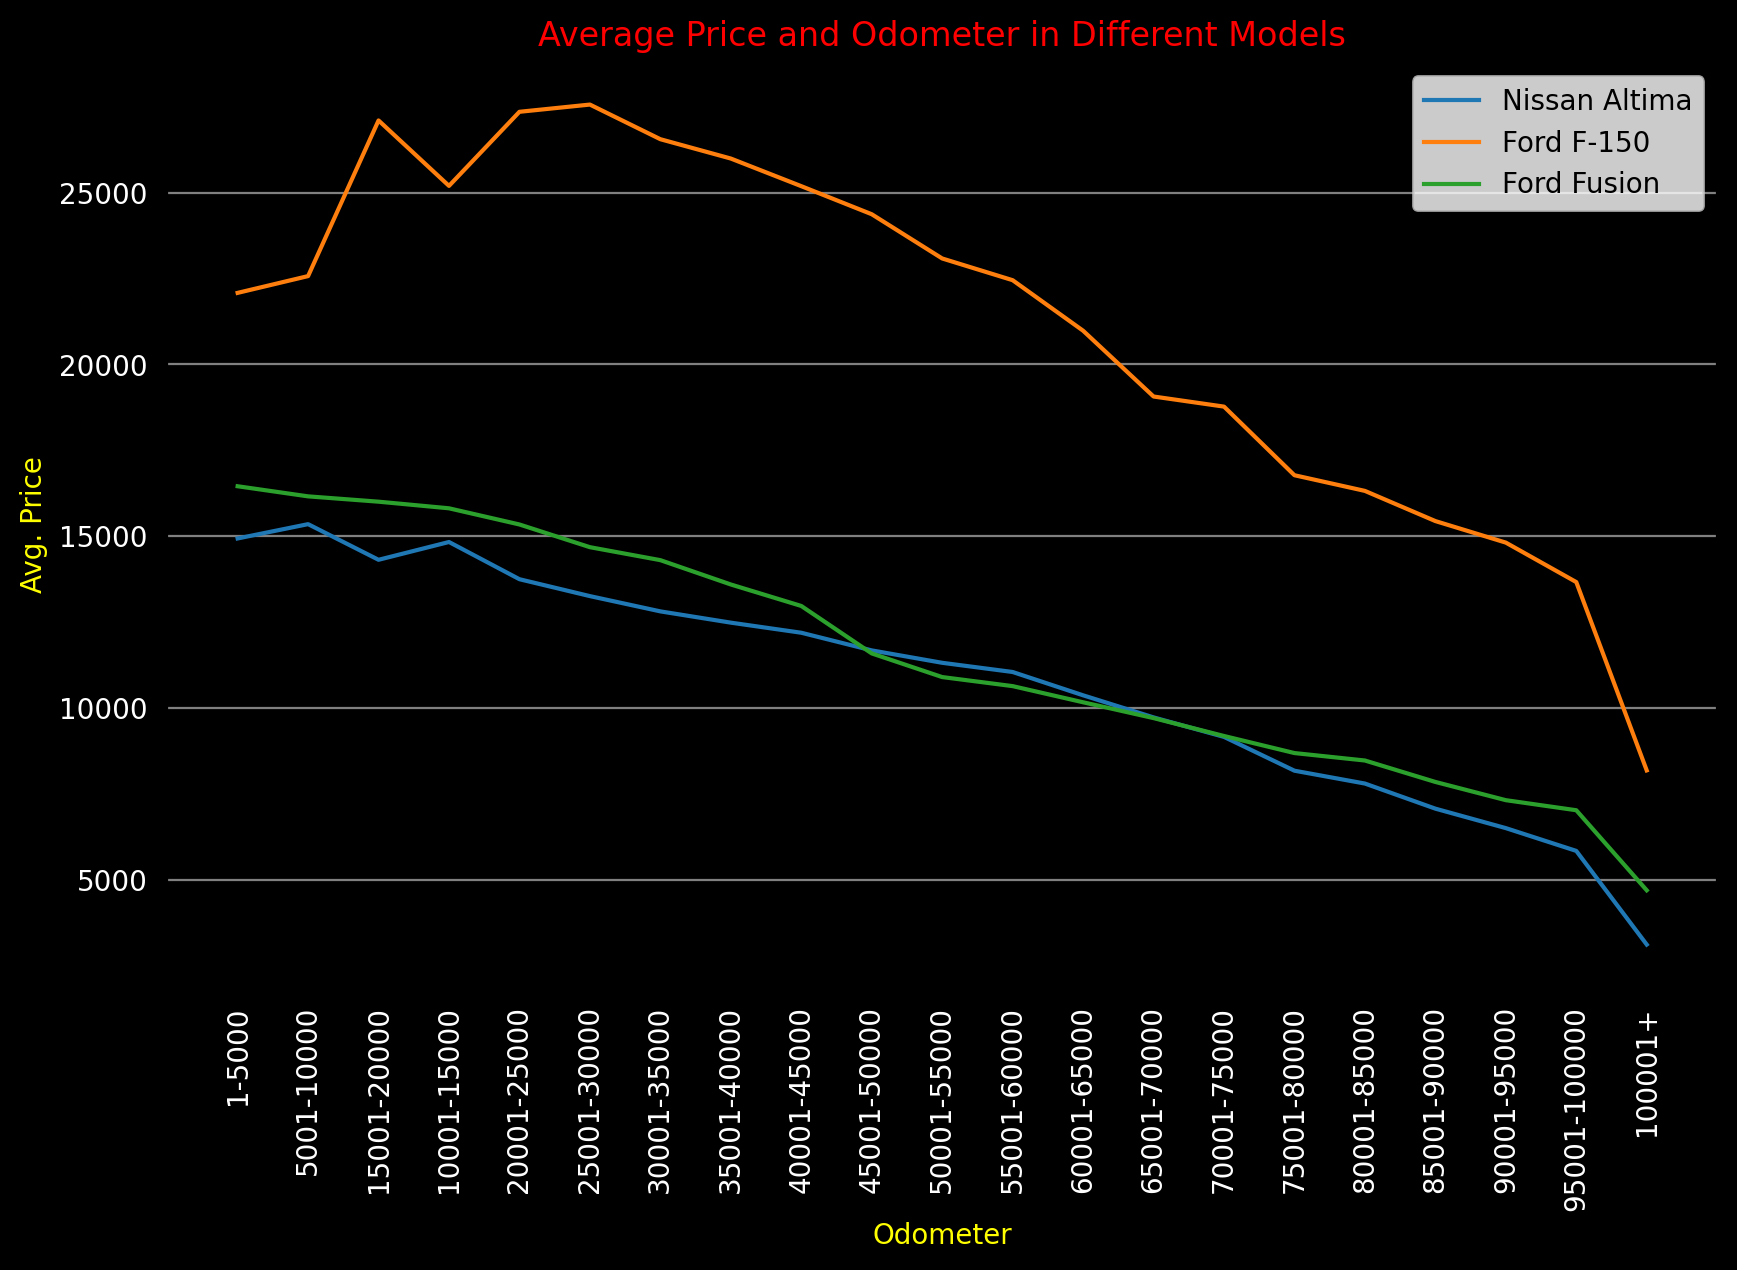

In [535]:
plt.figure(figsize=(10, 6), facecolor='black')

plt.plot(g_top['category'], y1,label='Nissan Altima')
plt.plot(g_top['category'], y2,label='Ford F-150')
plt.plot(g_top['category'], y3,label='Ford Fusion')

plt.grid(axis='y', color='grey')
plt.xticks(rotation=90, color='white')
plt.yticks(color='white')
plt.xlabel('Odometer', color='yellow')
plt.ylabel('Avg. Price', color='yellow')
plt.title('Average Price and Odometer in Different Models', color='red')
plt.legend()

plt.gca().set_facecolor('black')
plt.show()

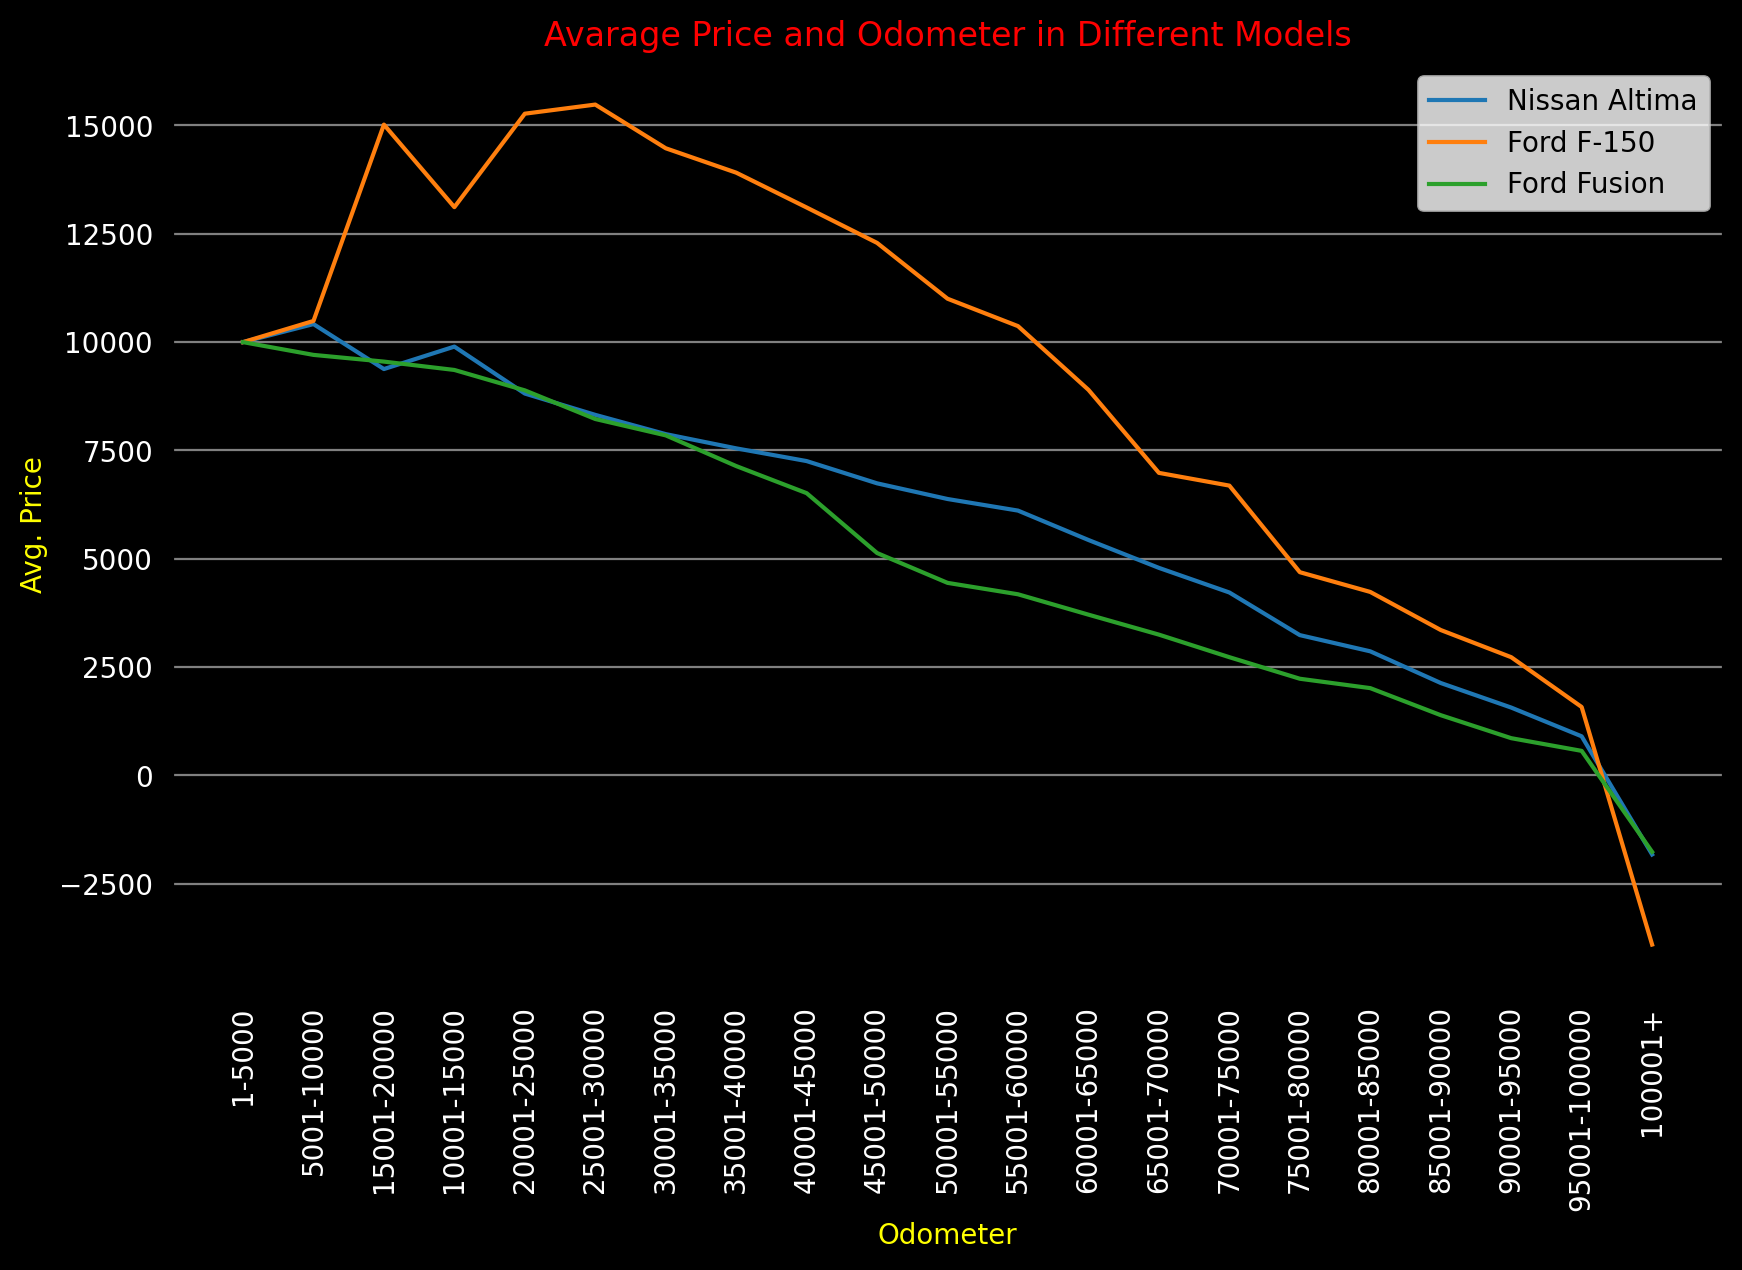

In [536]:
# Find the minimum y-value among the first points of y1, y2, and y3
start_y_value = 10000

# Offset each series to start from the same y-value
y1_offset = y1 - (y1[0] - start_y_value)
y2_offset = y2 - (y2[0] - start_y_value)
y3_offset = y3 - (y3[0] - start_y_value)

plt.figure(figsize=(10, 6), facecolor='black')

plt.plot(g_top['category'], y1_offset, label='Nissan Altima')
plt.plot(g_top['category'], y2_offset, label='Ford F-150')
plt.plot(g_top['category'], y3_offset, label='Ford Fusion')

plt.grid(axis='y', color='grey')
plt.xticks(rotation=90, color='white')
plt.yticks(color='white')
plt.xlabel('Odometer', color='yellow')
plt.ylabel('Avg. Price', color='yellow')
plt.title('Avarage Price and Odometer in Different Models', color='red')
plt.legend()

plt.gca().set_facecolor('black')
plt.show()


<hr style="border: none; height: 20px; background: linear-gradient(to right, black,red, orange, white);">

<h1 style="text-align: left; color: yellow; font-weight: bold;font-size: 36;"> Feature Engineer</h1>

**<span style="color: orange;">K-Means Clustering</span>**  
Feature engineering involves using liquidity, which was the number of cars sold in units, and the average sale price percentage change from various mileage ranges (e.g., 25,000-50,000, 45,000-50,000, 95,000-100,000). These values were combined and rescaled to create a new feature that indicates price sensitivity, highlighting the ranges that showed the most or least change in price. This rescaled value was then used to perform K-Means clustering, helping to group cars based on their price sensitivity and liquidity, and identifying which groups of cars were good, great, or bad buys.

**<span style="color: red;">Linear Regression</span>**  
Feature engineering involves using the percentage change in sale price as the target variable and selecting car models that no missing value in each ranges of mileage to ensure the predictions were more accurate. The 'odometer' (mileage) was used as the feature to predict the unknown percentage change in sale price for different mileage values. The data


### pivot data

In [537]:
# Define the categorization function
def categorize(value):
    if 1 <= value <= 5000:
        return '1-5000'
    for i in range(5001, 100001, 5000):
        if i <= value < i + 5000:
            return f'{i}-{i + 5000 - 1}'
    if value >= 100000:
        return '100001+'

# Apply the categorization function to the 'odometer' column
cleaned_cs['category'] = cleaned_cs['odometer'].apply(categorize)

# Group by 'make', 'model', and 'category' and calculate the count and mean of 'sellingprice'
grouped = cleaned_cs.groupby(['make', 'model', 'category']).agg({'sellingprice': ['count', 'mean']}).reset_index()

# Concatenate 'make' and 'model' columns with a space and rename it to 'car_brand_name'
grouped['car_brand_name'] = grouped['make'].str.cat(grouped['model'], sep=' ')
grouped.drop(['make', 'model'], axis=1, inplace=True)

# Flatten the column names
grouped.columns = [' '.join(col).strip() for col in grouped.columns.values]

# Reorder the columns with 'car_brand_name' as the first column
cols = ['car_brand_name'] + [col for col in grouped.columns if col != 'car_brand_name']
grouped = grouped[cols]

# Rename the columns for better readability
grouped.columns = ['car_brand_name', 'mileage', 'num_of_sold_cars', 'avg_price']

# Sort the DataFrame by 'car_brand_name' and 'mileage'
grouped = grouped.sort_values(by=['car_brand_name', 'mileage']).reset_index(drop=True)

# Display the result
print(grouped)

# If you want to save the result to a CSV file
grouped.to_csv('average_selling_price_by_mileage_category.csv', index=False)


     car_brand_name       mileage  num_of_sold_cars     avg_price
0          acura cl       100001+                84   1600.000000
1          acura cl   35001-40000                 1   4900.000000
2          acura cl   55001-60000                 1   4700.000000
3          acura cl   60001-65000                 4   5025.000000
4          acura cl   75001-80000                 1   1700.000000
...             ...           ...               ...           ...
9795     volvo xc90   75001-80000                27  11401.851852
9796     volvo xc90   80001-85000                33  10874.242424
9797     volvo xc90   85001-90000                32   9956.250000
9798     volvo xc90   90001-95000                37   8082.432432
9799     volvo xc90  95001-100000                41   8007.317073

[9800 rows x 4 columns]


C:\Users\Kmaun\AppData\Local\Temp\ipykernel_22028\4165959968.py:19: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



### Average Sellingprice in each car model sepereted by mileage

In [538]:
# Pivot the DataFrame to wide format
pivoted = grouped.pivot(index='car_brand_name', columns='mileage', values='avg_price')

# Reset the index and rename the columns
pivoted = pivoted.reset_index().rename_axis(None, axis=1)

# Define a function to convert mileage categories to a numeric value for sorting
def mileage_to_numeric(mileage):
    if mileage == '100001+':
        return 100002  # Setting a value higher than the highest range for proper sorting
    start, end = map(int, mileage.split('-'))
    return (start + end) / 2  
# Define the order of mileage categories for sorting
mileage_order = [
    '1-5000', '5001-10000', '10001-15000', '15001-20000',
    '20001-25000', '25001-30000', '30001-35000', '35001-40000',
    '40001-45000', '45001-50000', '50001-55000', '55001-60000',
    '60001-65000', '65001-70000', '70001-75000', '75001-80000',
    '80001-85000', '85001-90000', '90001-95000', '95001-100000', 
    '100001+'
]

# Rearrange columns based on mileage categories
pivoted = pivoted[['car_brand_name'] + mileage_order]
pivoted.dropna(subset='1-5000')
pivoted


car_brand_name        1-5000    5001-10000   10001-15000   15001-20000  \
0         acura cl           NaN           NaN           NaN           NaN   
1        acura ilx  21643.750000  20732.142857  20667.647059  19197.058824   
2    acura integra           NaN           NaN           NaN           NaN   
3     acura legend           NaN           NaN           NaN           NaN   
4        acura mdx  29053.125000  38246.428571  38558.064516  32968.518519   
..             ...           ...           ...           ...           ...   
775      volvo v70    433.333333           NaN           NaN           NaN   
776       volvo xc           NaN           NaN           NaN           NaN   
777     volvo xc60  31450.000000  31102.941176  29021.590909  29019.402985   
778     volvo xc70    600.000000  33300.000000  32583.333333  31771.428571   
779     volvo xc90   1150.000000           NaN  29975.000000  29469.444444   

      20001-25000   25001-30000   30001-35000   35001-40000   40001-45000  \
0             NaN           NaN           NaN   4900.000000           NaN   
1    18833.333333  18488.235294  18076.470588  18066.666667  16731.250000   
2             NaN           NaN           NaN           NaN           NaN   
3             NaN           NaN           NaN           NaN           NaN   
4    31118.367347  28969.402985  28355.500000  27901.630435  26429.230769   
..            ...           ...           ...           ...           ...   
775           NaN           NaN           NaN           NaN           NaN   
776           NaN           NaN           NaN           NaN           NaN   
777  27868.085106  26711.764706  24856.000000  22892.105263  21941.379310   
778  24000.000000  27990.000000  23475.000000  22700.000000  23057.142857   
779  27129.166667  26966.666667  24525.000000  23647.058824  22200.000000   

     ...   55001-60000   60001-65000   65001-70000   70001-75000  \
0    ...   4700.000000   5025.000000           NaN           NaN   
1    ...  16933.333333           NaN           NaN  15500.000000   
2    ...           NaN           NaN           NaN           NaN   
3    ...           NaN           NaN           NaN           NaN   
4    ...  23469.736842  21836.206897  21321.428571  19098.809524   
..   ...           ...           ...           ...           ...   
775  ...   5125.000000   2400.000000   3900.000000   3750.000000   
776  ...           NaN           NaN           NaN           NaN   
777  ...  18202.272727  18553.125000  16381.818182  16200.000000   
778  ...  14662.500000  15950.000000  15280.000000  13683.333333   
779  ...  17125.000000  15904.166667  14113.461538  10822.058824   

      75001-80000   80001-85000   85001-90000   90001-95000  95001-100000  \
0     1700.000000   2200.000000   2800.000000   4400.000000   3150.000000   
1             NaN           NaN           NaN           NaN           NaN   
2             NaN           NaN           NaN           NaN           NaN   
3             NaN           NaN           NaN           NaN           NaN   
4    18938.571429  16295.238095  14332.558140  13785.416667  12909.722222   
..            ...           ...           ...           ...           ...   
775   4975.000000   5000.000000   6800.000000   3400.000000   6280.000000   
776   2200.000000           NaN           NaN   4100.000000   3400.000000   
777  15800.000000  15100.000000  14485.714286  13283.333333  13400.000000   
778   6560.000000  10471.428571  10683.333333  10350.000000   7740.000000   
779  11401.851852  10874.242424   9956.250000   8082.432432   8007.317073   

          100001+  
0     1600.000000  
1    14200.000000  
2     1127.272727  
3      597.222222  
4     6908.394428  
..            ...  
775   1602.464789  
776   1850.000000  
777  11683.333333  
778   4406.153846  
779   4509.776903  

[780 rows x 22 columns]

In [539]:
# Car model that price increase in the range between '1-5000' and '15001'20000)
high_sl = pivoted.copy()
high_sl = high_sl[['car_brand_name', '1-5000', '15001-20000']]
high_sl = high_sl.dropna()
model_high_sl = high_sl[high_sl['1-5000'] < high_sl['15001-20000']]

In [540]:
pivoted_in_values = pivoted.copy()

pivoted_in_values = pivoted_in_values[['car_brand_name','1-5000','20001-25000','45001-50000','95001-100000']]

# Calculate Percent Change from each range
pivoted_in_values['25k_pct_chage'] = (pivoted_in_values['20001-25000'] - pivoted_in_values['1-5000']) / pivoted['1-5000'] * 100

pivoted_in_values['50k_pct_chage'] = (pivoted_in_values['45001-50000'] - pivoted_in_values['1-5000']) / pivoted['1-5000'] * 100

pivoted_in_values['100k_pct_chage'] = (pivoted_in_values['95001-100000'] - pivoted_in_values['1-5000']) / pivoted['1-5000'] * 100

pivoted_pct = pivoted_in_values.drop(columns=['1-5000','20001-25000','45001-50000','95001-100000'])

# Fill mean value in each columns
pivoted_pct['25k_pct_chage'].fillna(value=pivoted_pct['25k_pct_chage'].mean(),inplace=True)
pivoted_pct['50k_pct_chage'].fillna(value=pivoted_pct['50k_pct_chage'].mean(),inplace=True)
pivoted_pct['100k_pct_chage'].fillna(value=pivoted_pct['100k_pct_chage'].mean(),inplace=True)

pivoted_pct


C:\Users\Kmaun\AppData\Local\Temp\ipykernel_22028\1516181659.py:15: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\Kmaun\AppData\Local\Temp\ipykernel_22028\1516181659.py:16: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

car_brand_name  25k_pct_chage  50k_pct_chage  100k_pct_chage
0         acura cl     156.811697     190.209047      103.948133
1        acura ilx     -12.984888     -24.997594      103.948133
2    acura integra     156.811697     190.209047      103.948133
3     acura legend     156.811697     190.209047      103.948133
4        acura mdx       7.108503     -10.181117      -55.565117
..             ...            ...            ...             ...
775      volvo v70     156.811697     190.209047     1349.230769
776       volvo xc     156.811697     190.209047      103.948133
777     volvo xc60     -11.389237     -35.800874      -57.392687
778     volvo xc70    3900.000000    4009.722222     1190.000000
779     volvo xc90    2259.057971    1457.246377      596.288441

[780 rows x 4 columns]

### Group number of sold cars

In [541]:
# Count car brand name
grouped_count = grouped.groupby('car_brand_name')['num_of_sold_cars'].sum().reset_index()

grouped_count.rename(columns={"num_of_sold_cars": "sold_cars"},inplace=True)

grouped_count.sort_values(by='sold_cars',ascending=False)

car_brand_name  sold_cars
588           nissan altima      19349
252              ford f-150      14472
266             ford fusion      12945
711            toyota camry      12539
243             ford escape      11861
..                      ...        ...
222             ferrari 360          1
623      oldsmobile regency          1
26                  audi q3          1
25           audi cabriolet          1
540  mercedes-benz ml55 amg          1

[780 rows x 2 columns]

### Combine 2 tables and make percentage change from 1-5000 in each mileage

In [542]:
# create feature engineer 
mc = pivoted_pct.merge(grouped_count, on='car_brand_name',how='left')
mc['feature'] = mc['25k_pct_chage'] + mc['50k_pct_chage'] + mc['100k_pct_chage']
scaled_mc = mc.copy()
cols_to_scale = ['25k_pct_chage', '50k_pct_chage', '100k_pct_chage','sold_cars', 'feature']

# Create a MinMaxScaler object with the desired feature range
scaler = MinMaxScaler(feature_range=(-1, 1))

# Fit the scaler to the specified columns and transform them
scaled_mc[cols_to_scale] = scaler.fit_transform(mc[cols_to_scale])

scaled_mc


car_brand_name  25k_pct_chage  50k_pct_chage  100k_pct_chage  sold_cars  \
0         acura cl      -0.953101      -0.932281       -0.884353  -0.990076   
1        acura ilx      -0.990549      -0.984524       -0.884353  -0.985632   
2    acura integra      -0.953101      -0.932281       -0.884353  -0.995555   
3     acura legend      -0.953101      -0.932281       -0.884353  -0.999173   
4        acura mdx      -0.986118      -0.980927       -0.980660  -0.836262   
..             ...            ...            ...             ...        ...   
775      volvo v70      -0.953101      -0.932281       -0.132507  -0.983047   
776       volvo xc      -0.953101      -0.932281       -0.884353  -0.997519   
777     volvo xc60      -0.990197      -0.987146       -0.981764  -0.957515   
778     volvo xc70      -0.127550      -0.005074       -0.228643  -0.982737   
779     volvo xc90      -0.489456      -0.624701       -0.587100  -0.924333   

      feature  
0   -0.936680  
1   -0.974080  
2   -0.936680  
3   -0.936680  
4   -0.986184  
..        ...  
775 -0.815710  
776 -0.936680  
777 -0.990648  
778 -0.096520  
779 -0.561553  

[780 rows x 6 columns]

<hr style="border: none; height: 20px; background: linear-gradient(to right, black,red, orange, white);">

<h1 style="text-align: left; color: yellow; font-weight: bold;font-size: 36;"> Machine Learning</h1>

Use 2 machine learning models to analyze the data:

**<span style="color: orange;">K-Means Clustering</span>**  was used to identify which groups(Elbow method used to indicate number of cluster) of cars are good to buy by considering factors such as liquidity and the decrease in sales price in each mileage.Each cluster was then analyzed to determine the characteristics of cars within it, helping to identify groups that are advantageous to purchase.

**<span style="color: red;">Linear Regression</span>**  was utilized to predict the percentage drop in sales price for each ranges of mileage. This process included preparing the data by selecting 'feature' (Value explanation is in feature engineer section) and 'percentage_change' from each range as the target variable, splitting the dataset into training and testing sets, and training the linear regression model on the training data. The model's performance was evaluated using metrics such as Mean Squared Error (MSE) and R-squared (R²). The relationship between mileage and percentage change in sales price was visualized through scatter plots, includi


## <h1 style="text-align: left; color: orange;font-weight: bold;font-size:26px;"> K-Means Clustering</h1>

### <h1 style="text-align: left; color: cyan; font-weight: bold; font-size:24px;">Elbow Method</h1>


In [543]:
# Feature for K-means
X = scaled_mc[['feature', 'sold_cars']].values

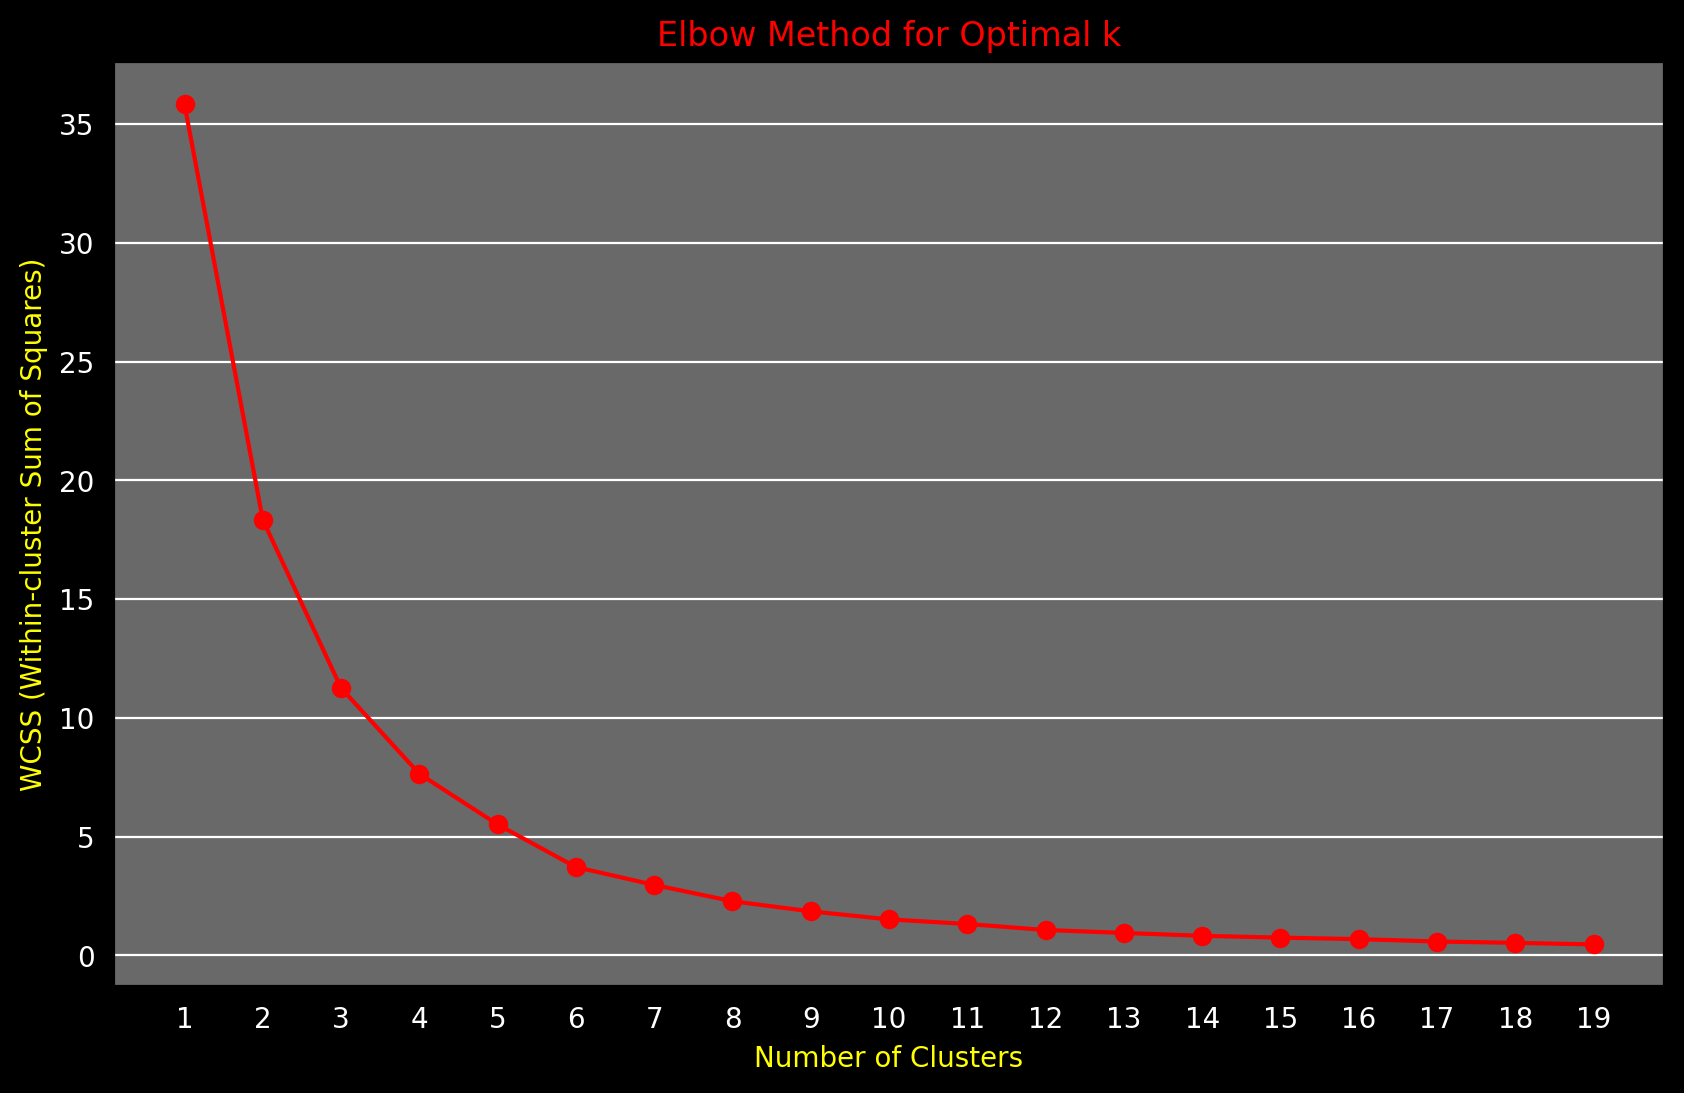

In [544]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the results to find the elbow point
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), wcss, marker='o', color='red')
plt.xticks(range(1, 20), color='white')
plt.yticks(color='white')
plt.title('Elbow Method for Optimal k', color='red')
plt.xlabel('Number of Clusters', color='yellow')
plt.ylabel('WCSS (Within-cluster Sum of Squares)', color='yellow')
plt.grid(axis='y', color='white')
plt.gca().set_facecolor('dimgray')
plt.gcf().set_facecolor('black')
plt.show()



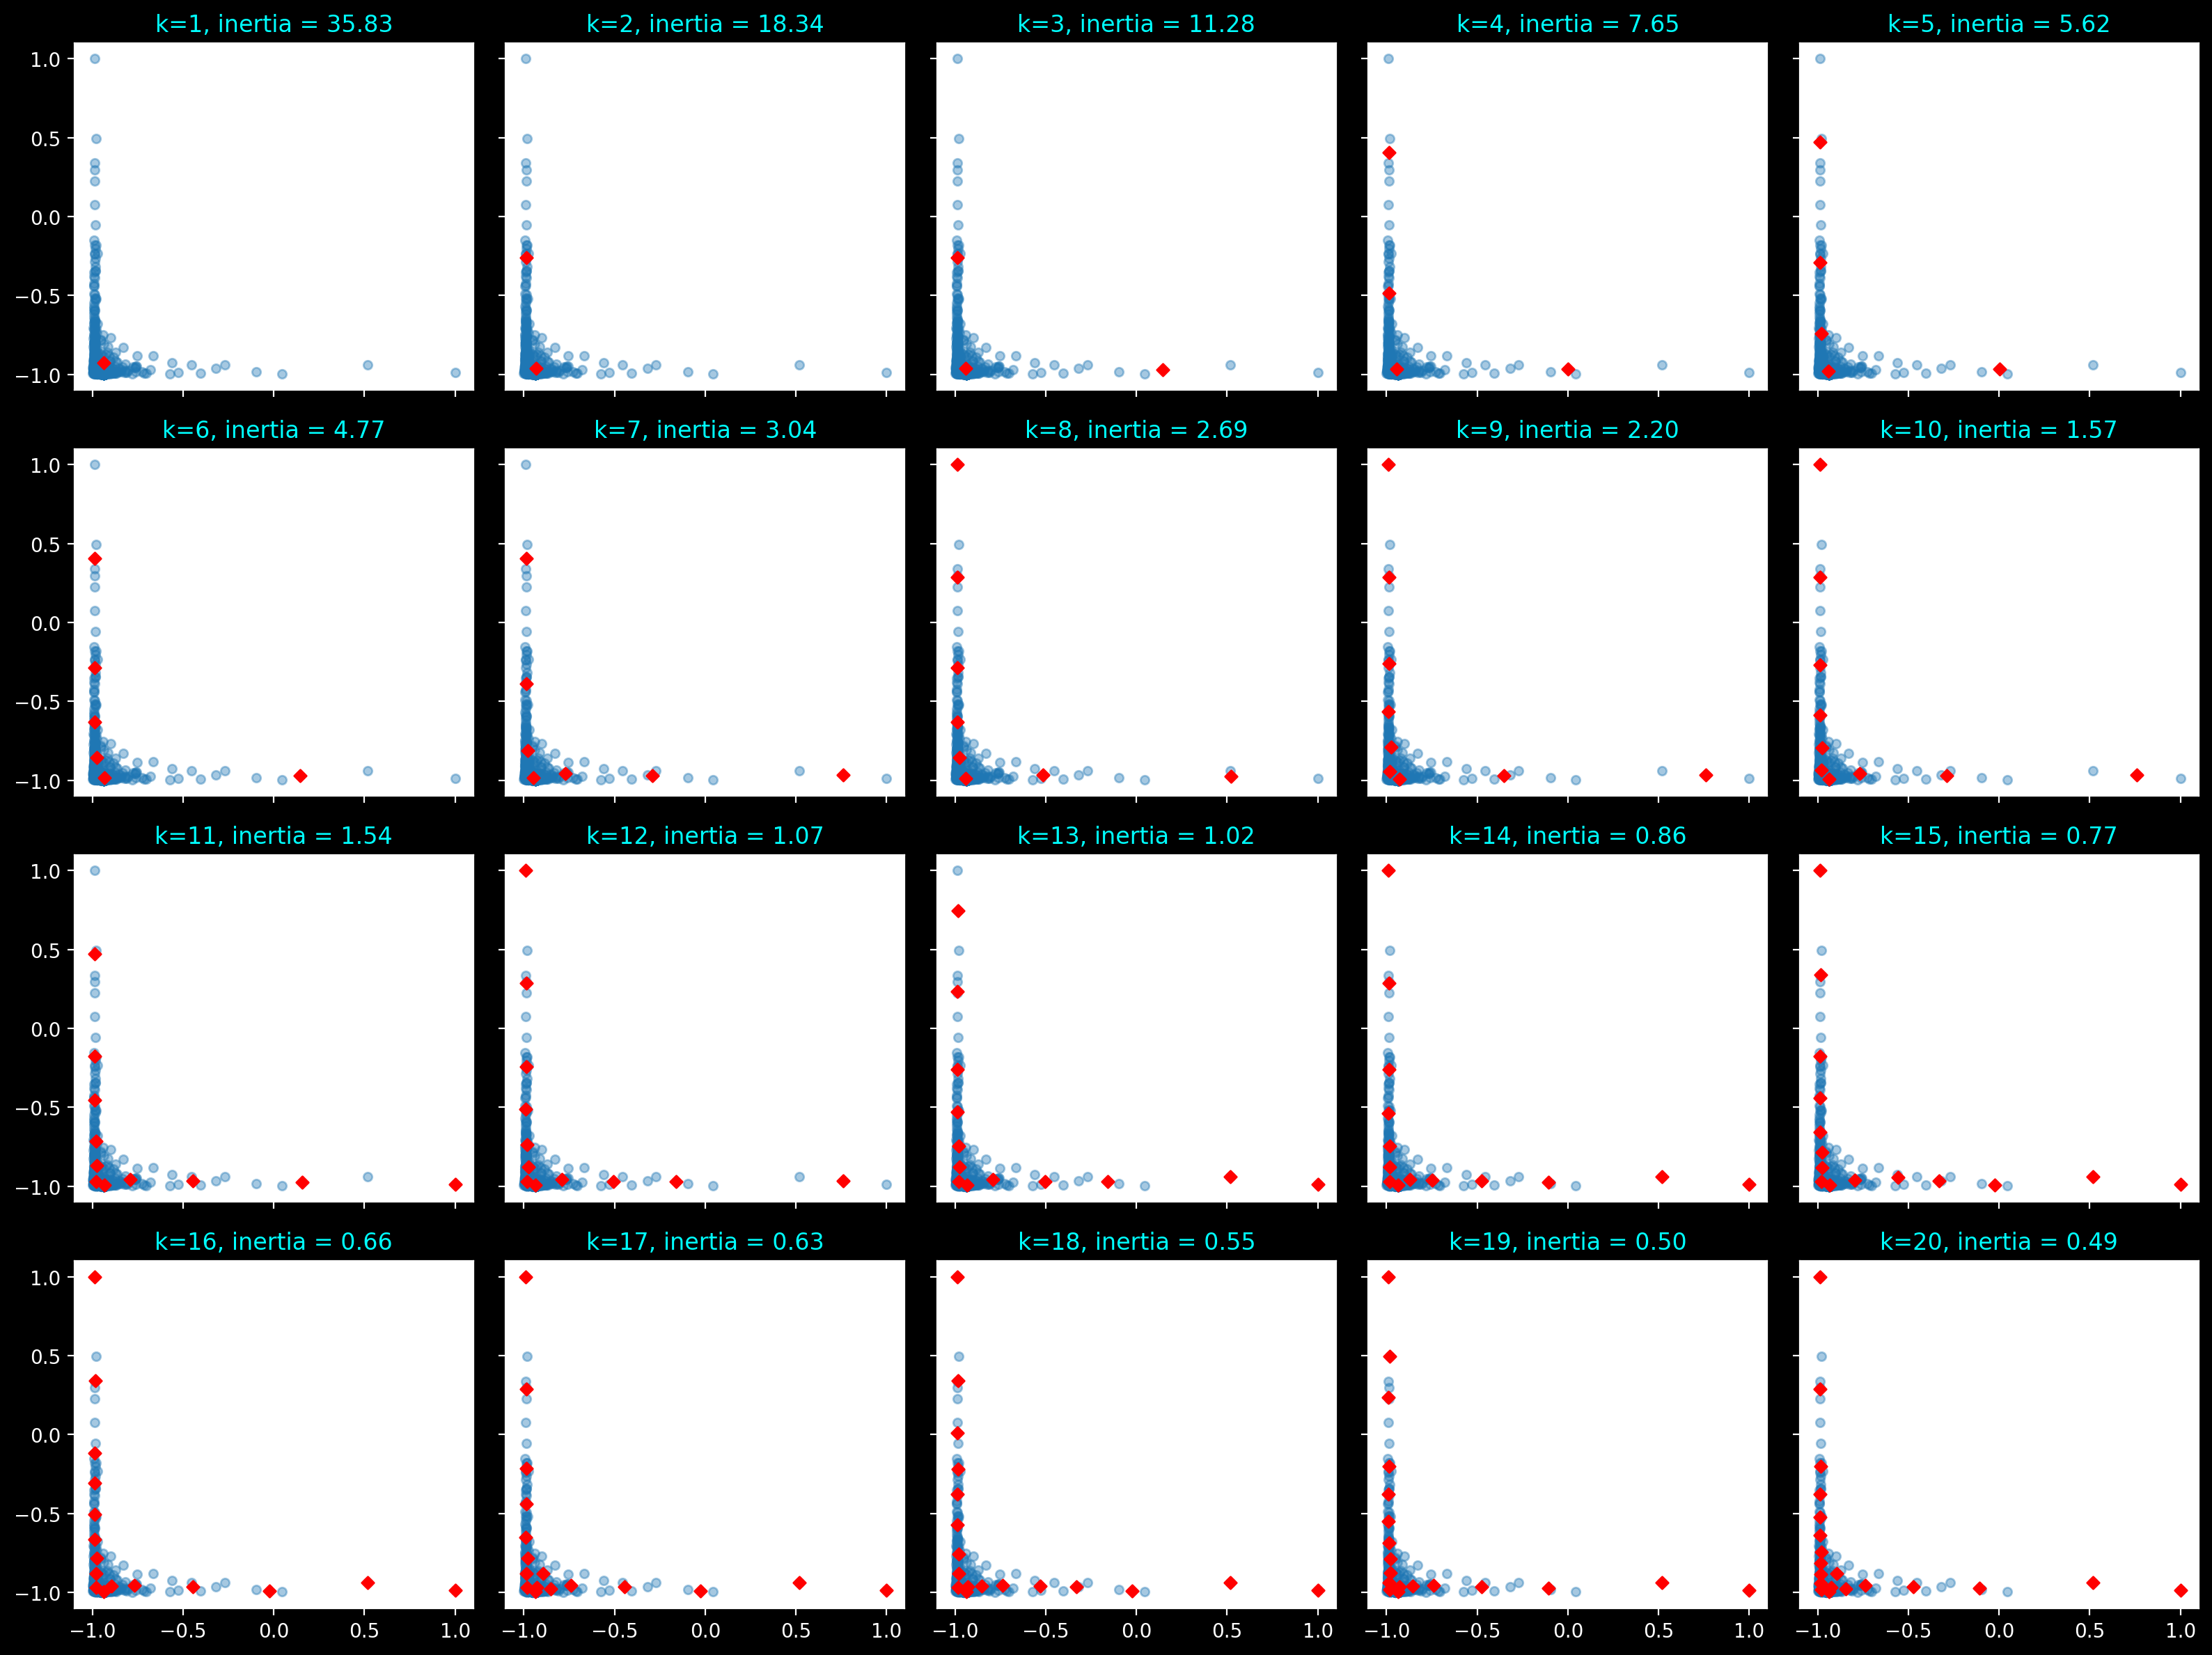

In [545]:
fig, ax = plt.subplots(4, 5, figsize=(16, 12), sharex=True, sharey=True)
k = 1
ssd = []  # Sum of squared distances of samples to their closest cluster center
ax = ax.ravel()

for i in range(ax.shape[0]):
    ax[i].scatter(X[:, 0], X[:, 1], s=20, alpha=0.4)
    m = KMeans(n_clusters=k)
    m.fit(X)
    ssd.append([k, m.inertia_])
    ax[i].scatter(
        m.cluster_centers_[:, 0], m.cluster_centers_[:, 1], color="r", marker="D", s=20
    )
    ax[i].set_title(f"k={k}, inertia = {m.inertia_:,.2f}", color='cyan')
    ax[i].tick_params(colors='white')
    ax[i].xaxis.label.set_color('white')
    ax[i].yaxis.label.set_color('white')
    for spine in ax[i].spines.values():
        spine.set_edgecolor('white')
    k += 1

# Set black background for figure and axes
fig.patch.set_facecolor('black')
for a in ax:
    a.set_facecolor('white')

plt.tight_layout()
plt.show()



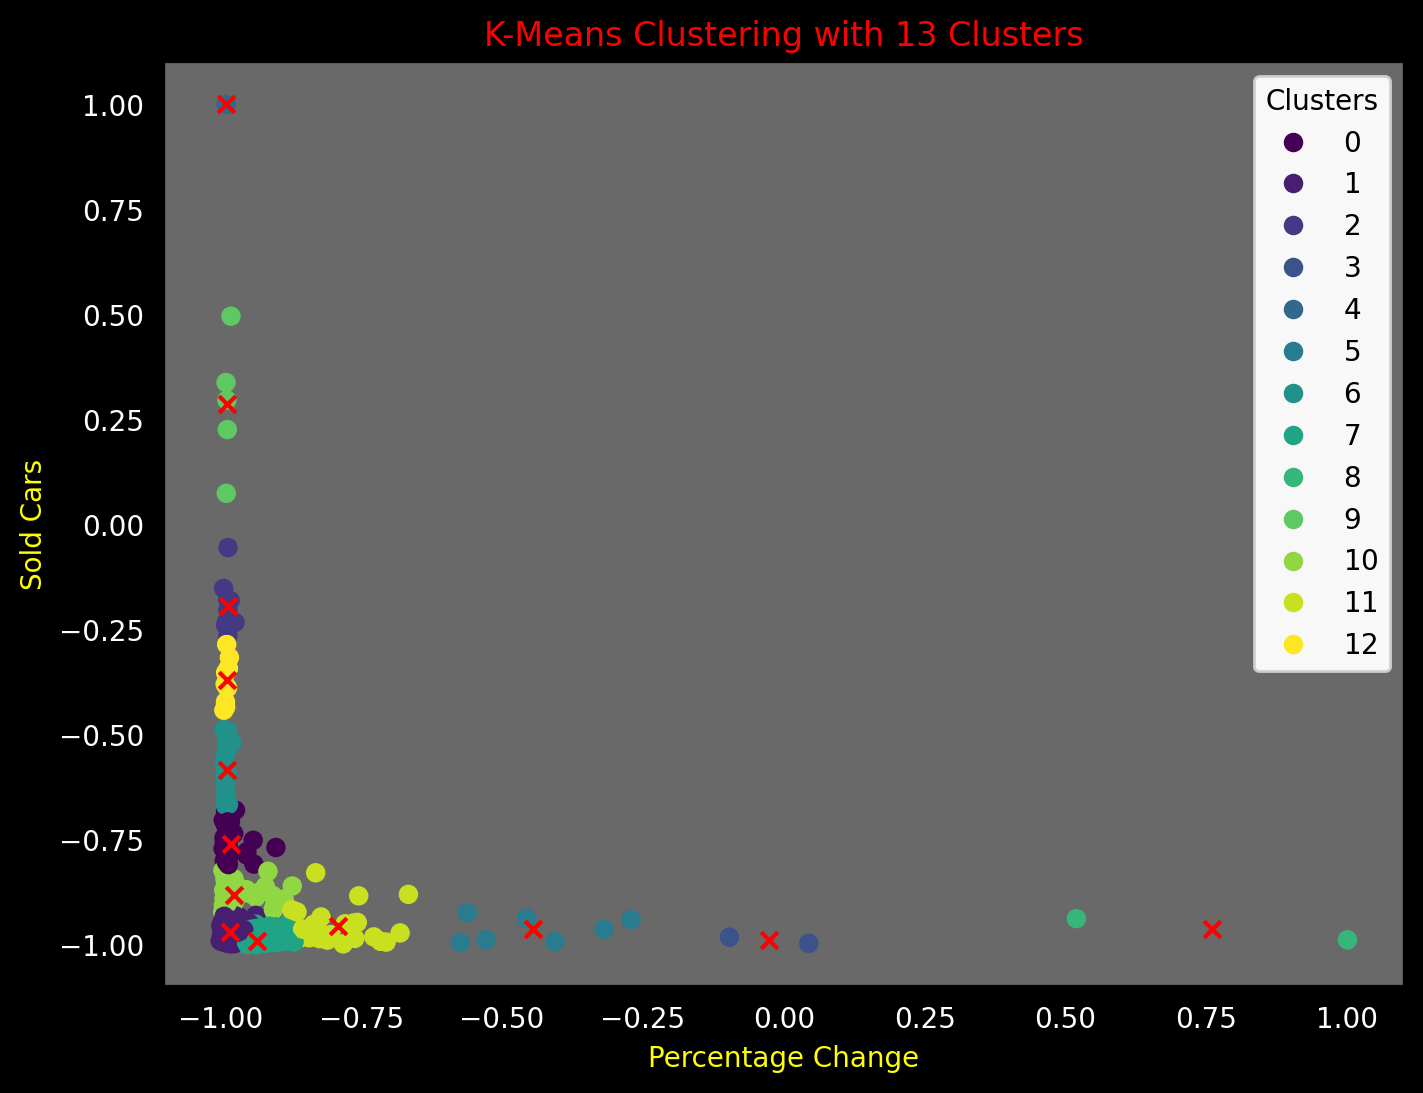

In [546]:
# Creating KMeans object with 13 clusters
kmeans = KMeans(n_clusters=13, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Fitting KMeans to data
kmeans.fit(X)

# Visualizing the clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
plt.xlabel('Percentage Change', color='yellow')
plt.ylabel('Sold Cars', color='yellow')
plt.xticks(color='white')
plt.yticks(color='white')
plt.title('K-Means Clustering with 13 Clusters', color='red')

# Add a legend
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)  # Add the legend to the current axes

plt.gca().set_facecolor('dimgray')  # Set the plot background color to dimgray
plt.gcf().set_facecolor('black')  # Set the figure background color to black

plt.show()


In [547]:
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Add cluster label to mc and scaled_mc dataframe

mc['cluster_label'] = labels
scaled_mc['cluster_label'] = labels


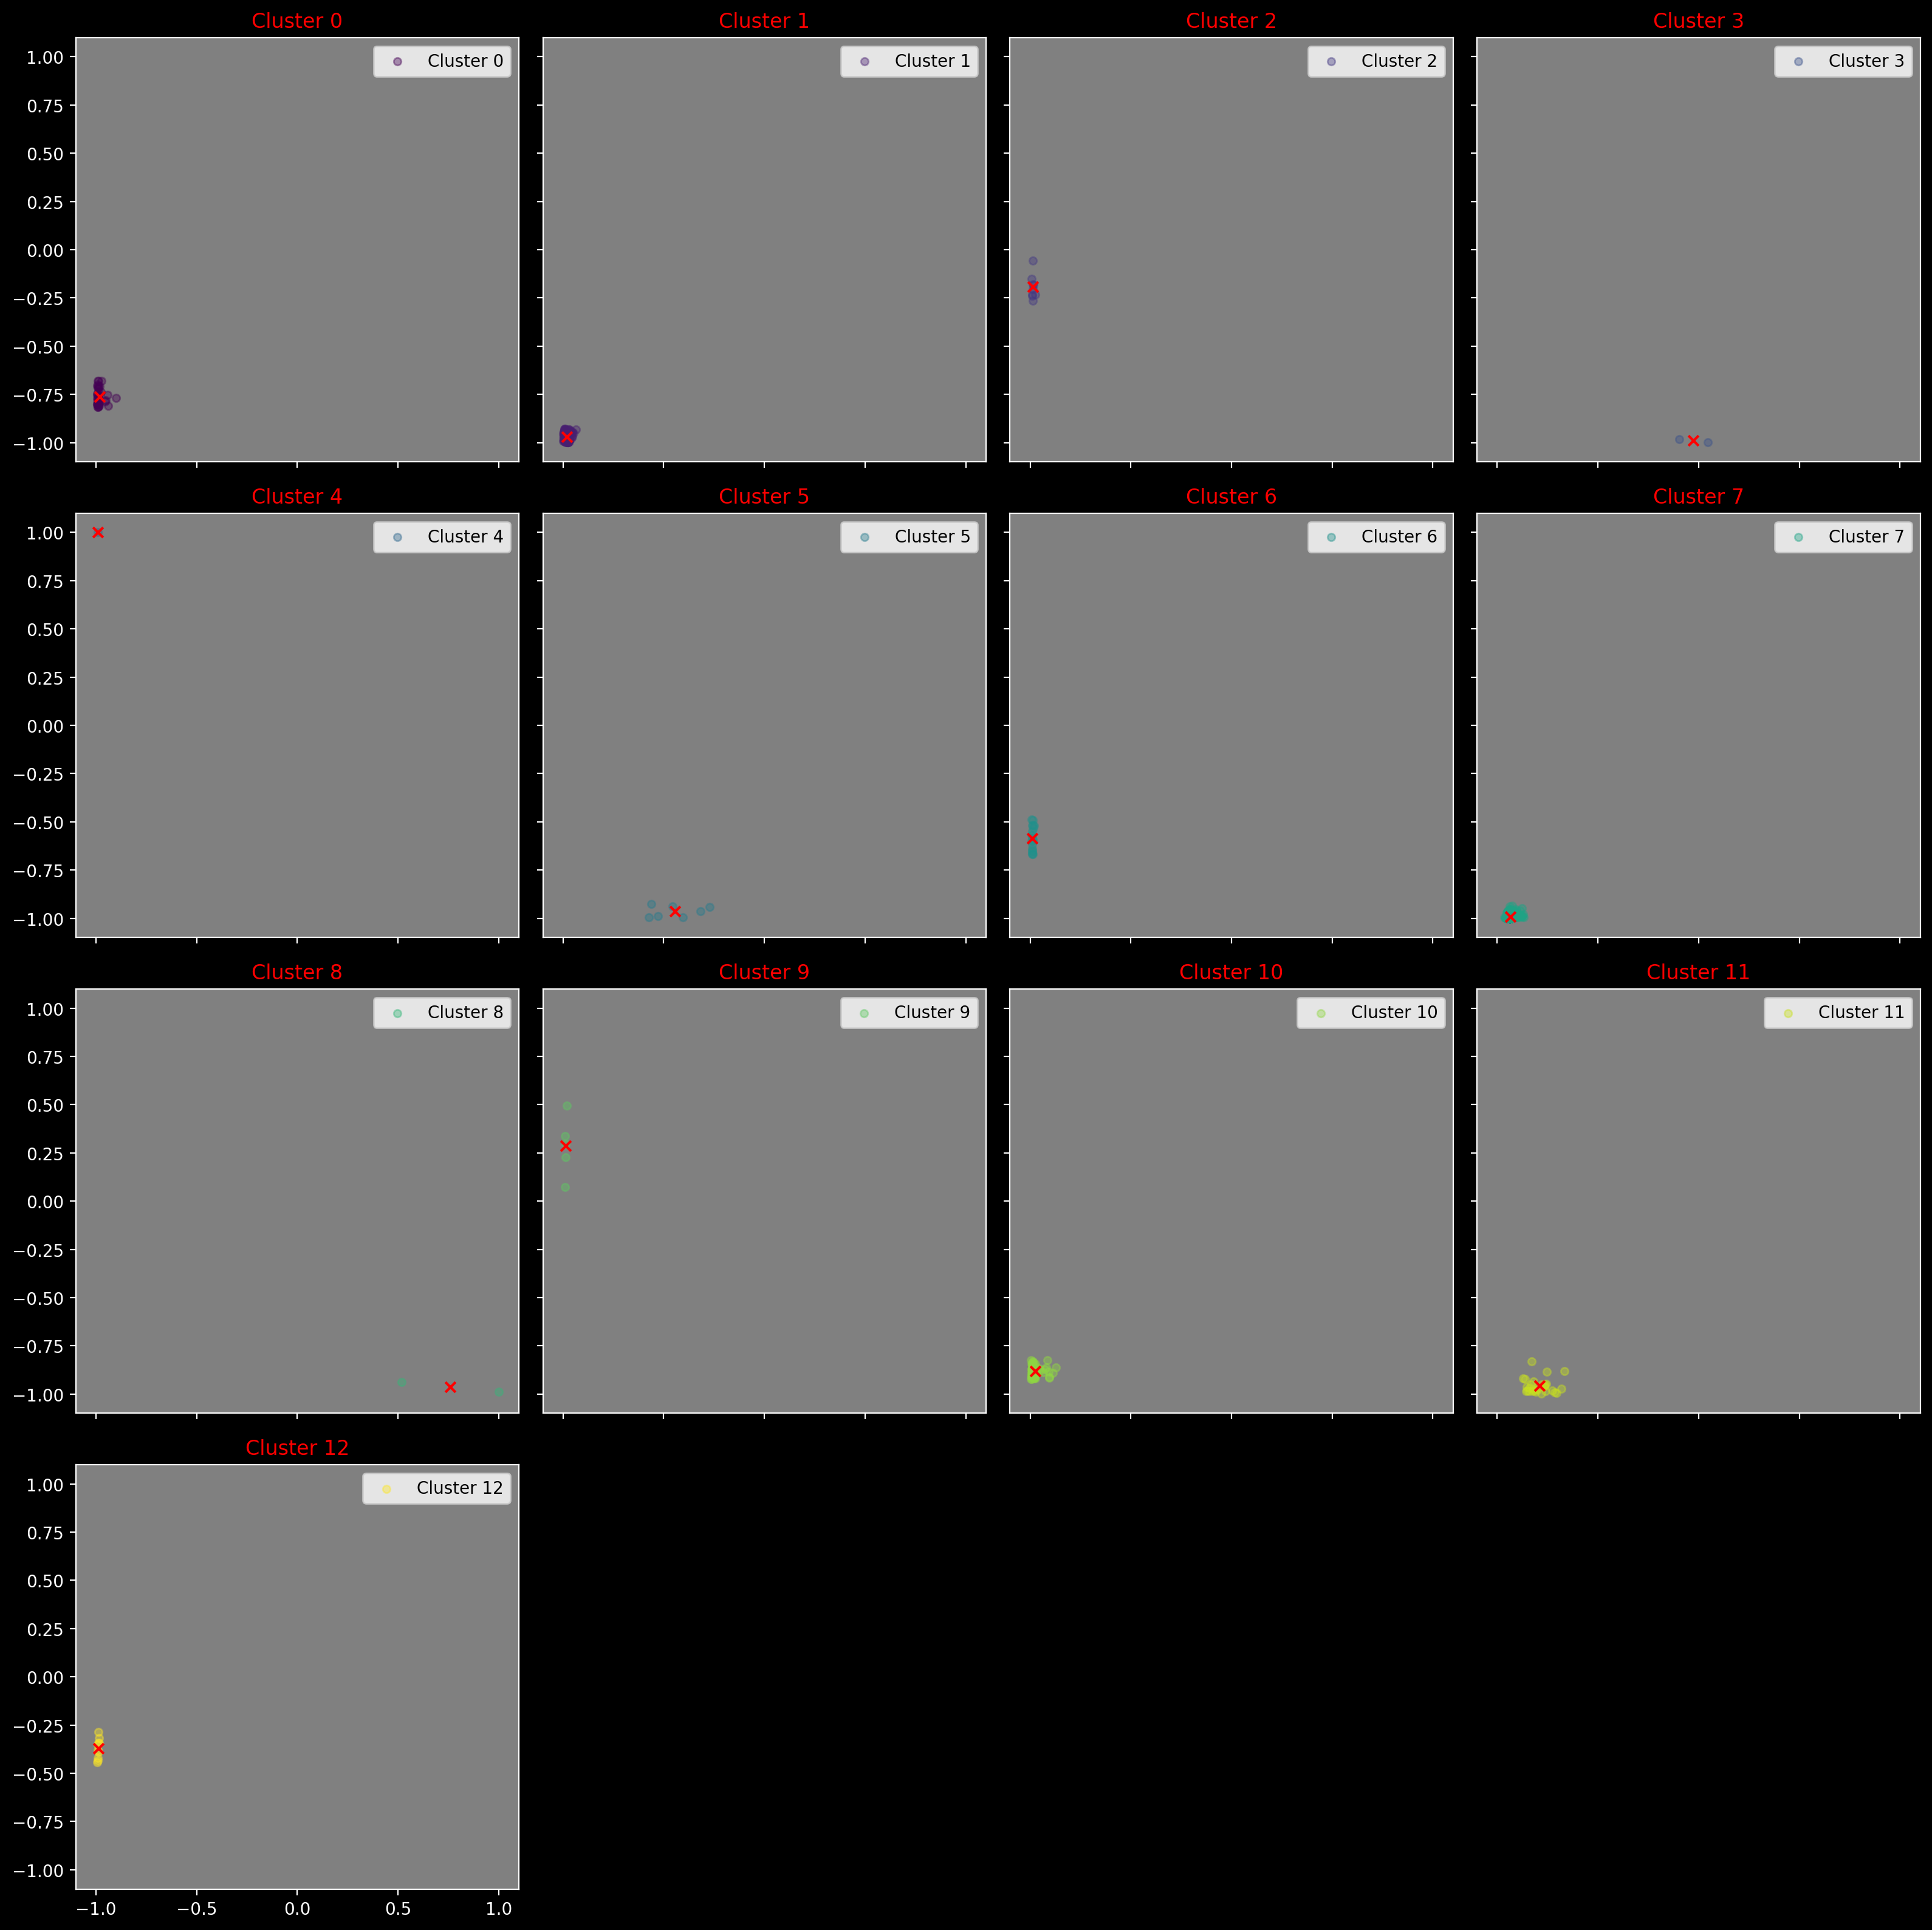

In [548]:
fig, ax = plt.subplots(4, 4, figsize=(16, 16), sharex=True, sharey=True)
ax = ax.ravel()

# Color map
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, 13))

for i in range(13):  # 13 clusters
    cluster_data = scaled_mc[scaled_mc['cluster_label'] == i]
    ax[i].scatter(cluster_data['feature'], cluster_data['sold_cars'], s=20, alpha=0.4, label=f'Cluster {i}', color=colors[i])
    ax[i].scatter(kmeans.cluster_centers_[i, 0], kmeans.cluster_centers_[i, 1], color='r', marker='x')
    ax[i].set_title(f'Cluster {i}', color='red')
    ax[i].legend()

    # Set yellow tick labels and white font
    ax[i].tick_params(colors='white')
    ax[i].xaxis.label.set_color('white')
    ax[i].yaxis.label.set_color('white')
    for spine in ax[i].spines.values():
        spine.set_edgecolor('white')

# Hide any unused subplots
for i in range(13, len(ax)):
    ax[i].axis('off')

# Set black background for figure and axes
fig.patch.set_facecolor('black')
for a in ax:
    a.set_facecolor('grey')

plt.tight_layout()
plt.show()


### Split cluster

In [549]:
#Define the clusters with high demand
high_dm_clusters = [4, 9, 2, 12, 0]

# Filter mc for clusters with high demand
high_dm_car = mc[mc['cluster_label'].isin(high_dm_clusters)]

# Convert 'cluster_label' to categorical type with desired order
high_dm_car['cluster_label'] = pd.Categorical(high_dm_car['cluster_label'], categories=high_dm_clusters, ordered=True)

# Sort the DataFrame by 'cluster_label'
high_dm_car_sorted = high_dm_car.sort_values('cluster_label')

# Merge high_dm_car with pivoted DataFrame based on 'car_brand_name'
high_dm_car_merged = pd.merge(high_dm_car_sorted, pivoted, on='car_brand_name', how='left')

# Adjust column selection based on actual column names in high_dm_car_merged
high_dm_car_final = high_dm_car_merged[['car_brand_name', '25k_pct_chage', '50k_pct_chage', '100k_pct_chage',
                                        'sold_cars', 'feature', '1-5000', 'cluster_label']]

# Rename a specific column using the correct syntax
high_dm_car_final = high_dm_car_final.rename(columns={'1-5000': 'Avg_1_5000_sellingprice'})

high_dm_car_final

# Save the sorted DataFrame to a CSV file
output_file = 'high_dm_car_final.csv'
high_dm_car_final.to_csv(output_file, index=False)

C:\Users\Kmaun\AppData\Local\Temp\ipykernel_22028\777804541.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [550]:
# Define the clusters with low price percent change
low_pct_change_clusters = [8,3,5,11,7]

# Filter mc for clusters with low price percent change
low_pct_change_car = mc[mc['cluster_label'].isin(low_pct_change_clusters)]

# Create a categorical type with the desired order
low_pct_change_car['cluster_label'] = pd.Categorical(low_pct_change_car['cluster_label'], categories=low_pct_change_clusters, ordered=True)

# Sort the DataFrame by 'cluster_label'
low_pct_change_car_sorted = low_pct_change_car.sort_values('cluster_label')

# Merge high_dm_car with pivoted DataFrame based on 'car_brand_name'
low_pct_change_car_merged = pd.merge(low_pct_change_car_sorted, pivoted, on='car_brand_name', how='left')

# Adjust column selection based on actual column names in high_dm_car_merged
low_pct_change_car_final = low_pct_change_car_merged[['car_brand_name', '25k_pct_chage', '50k_pct_chage', '100k_pct_chage',
                                        'sold_cars', 'feature', '1-5000', 'cluster_label']]

# Rename a specific column using the correct syntax
low_pct_change_car_final = low_pct_change_car_final.rename(columns={'1-5000': 'num_of_sold_cars'})

low_pct_change_car_final



C:\Users\Kmaun\AppData\Local\Temp\ipykernel_22028\1830550309.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



car_brand_name  25k_pct_chage  50k_pct_chage  100k_pct_chage  \
0       toyota land cruiser    9012.500000    8150.000000     3225.000000   
1            toyota sequoia    7642.657343    5612.121212     2182.196970   
2              cadillac xlr    4733.333333    3500.000000     2316.666667   
3                volvo xc70    3900.000000    4009.722222     1190.000000   
4          lincoln town car    3402.702703    2636.679537      772.586873   
..                      ...            ...            ...             ...   
476              ford tempo     156.811697     190.209047      103.948133   
477           ford taurus x     156.811697     190.209047      103.948133   
478  ford mustang svt cobra     156.811697     190.209047      103.948133   
479          ford freestyle     156.811697     190.209047      468.452381   
480           isuzu trooper     156.811697     190.209047      103.948133   

     sold_cars       feature  num_of_sold_cars cluster_label  
0          108  20387.500000             600.0             8  
1          596  15436.975524             550.0             8  
2           26  10550.000000             600.0             3  
3          168   9099.722222             600.0             3  
4          352   6811.969112             462.5             5  
..         ...           ...               ...           ...  
476          3    450.968876               NaN             7  
477         89    450.968876               NaN             7  
478         12    450.968876               NaN             7  
479        277    815.473125             700.0             7  
480         32    450.968876               NaN             7  

[481 rows x 8 columns]

In [551]:
pivoted.head()

car_brand_name     1-5000    5001-10000   10001-15000   15001-20000  \
0       acura cl        NaN           NaN           NaN           NaN   
1      acura ilx  21643.750  20732.142857  20667.647059  19197.058824   
2  acura integra        NaN           NaN           NaN           NaN   
3   acura legend        NaN           NaN           NaN           NaN   
4      acura mdx  29053.125  38246.428571  38558.064516  32968.518519   

    20001-25000   25001-30000   30001-35000   35001-40000   40001-45000  ...  \
0           NaN           NaN           NaN   4900.000000           NaN  ...   
1  18833.333333  18488.235294  18076.470588  18066.666667  16731.250000  ...   
2           NaN           NaN           NaN           NaN           NaN  ...   
3           NaN           NaN           NaN           NaN           NaN  ...   
4  31118.367347  28969.402985  28355.500000  27901.630435  26429.230769  ...   

    55001-60000   60001-65000   65001-70000   70001-75000   75001-80000  \
0   4700.000000   5025.000000           NaN           NaN   1700.000000   
1  16933.333333           NaN           NaN  15500.000000           NaN   
2           NaN           NaN           NaN           NaN           NaN   
3           NaN           NaN           NaN           NaN           NaN   
4  23469.736842  21836.206897  21321.428571  19098.809524  18938.571429   

    80001-85000  85001-90000   90001-95000  95001-100000       100001+  
0   2200.000000   2800.00000   4400.000000   3150.000000   1600.000000  
1           NaN          NaN           NaN           NaN  14200.000000  
2           NaN          NaN           NaN           NaN   1127.272727  
3           NaN          NaN           NaN           NaN    597.222222  
4  16295.238095  14332.55814  13785.416667  12909.722222   6908.394428  

[5 rows x 22 columns]

In [552]:
mc.head()

car_brand_name  25k_pct_chage  50k_pct_chage  100k_pct_chage  sold_cars  \
0       acura cl     156.811697     190.209047      103.948133         97   
1      acura ilx     -12.984888     -24.997594      103.948133        140   
2  acura integra     156.811697     190.209047      103.948133         44   
3   acura legend     156.811697     190.209047      103.948133          9   
4      acura mdx       7.108503     -10.181117      -55.565117       1585   

      feature  cluster_label  
0  450.968876              7  
1   65.965651              1  
2  450.968876              7  
3  450.968876              7  
4  -58.637730             10

## <h1 style="text-align: left; color: red;font-weight: bold;font-size:26px;"> Linear Regression</h1>

In [553]:
# Drop rows containing missing values
filtered_pivoted = pivoted.dropna()
filtered_pivoted

car_brand_name        1-5000    5001-10000   10001-15000   15001-20000  \
4        acura mdx  29053.125000  38246.428571  38558.064516  32968.518519   
5        acura rdx  32743.750000  29635.714286  29333.333333  27783.333333   
9         acura tl   8427.272727  22883.333333  22407.142857  20810.227273   
11       acura tsx  20900.000000  19537.500000  17901.515152  18329.411765   
17         audi a3  25430.000000  25098.484848  24118.181818  20959.090909   
..             ...           ...           ...           ...           ...   
766      volvo c70  28400.000000  25250.000000  24383.333333  23625.000000   
768      volvo s60   9517.857143  23668.627451  22628.102190  20804.320988   
770      volvo s80   8850.000000  24800.000000  26000.000000  25880.000000   
777     volvo xc60  31450.000000  31102.941176  29021.590909  29019.402985   
778     volvo xc70    600.000000  33300.000000  32583.333333  31771.428571   

      20001-25000   25001-30000   30001-35000   35001-40000   40001-45000  \
4    31118.367347  28969.402985  28355.500000  27901.630435  26429.230769   
5    24459.615385  24452.777778  23968.571429  22778.571429  21416.666667   
9    21089.743590  20233.870968  19817.537313  19179.166667  19465.697674   
11   17911.627907  17392.405063  17197.039474  16796.601942  16379.577465   
17   21044.444444  19625.000000  16712.500000  17100.000000  16961.111111   
..            ...           ...           ...           ...           ...   
766  20935.714286  20414.285714  21793.750000  17210.000000  17575.000000   
768  18675.000000  17293.076923  16921.527778  16081.967213  16515.957447   
770  16433.333333  20800.000000  16900.000000  13975.000000  15558.333333   
777  27868.085106  26711.764706  24856.000000  22892.105263  21941.379310   
778  24000.000000  27990.000000  23475.000000  22700.000000  23057.142857   

     ...   55001-60000   60001-65000   65001-70000   70001-75000  \
4    ...  23469.736842  21836.206897  21321.428571  19098.809524   
5    ...  16200.000000  17541.666667  14959.090909  14631.818182   
9    ...  16833.593750  15076.190476  14879.268293  13200.000000   
11   ...  14750.000000  14217.500000  13148.000000  12870.000000   
17   ...  14087.500000  13300.000000  11592.857143  12225.000000   
..   ...           ...           ...           ...           ...   
766  ...  14180.000000  13907.142857  11571.428571  11600.000000   
768  ...  11068.750000  11830.000000  10942.105263   7503.125000   
770  ...  10633.333333  12580.000000   8060.000000   8166.666667   
777  ...  18202.272727  18553.125000  16381.818182  16200.000000   
778  ...  14662.500000  15950.000000  15280.000000  13683.333333   

      75001-80000   80001-85000   85001-90000   90001-95000  95001-100000  \
4    18938.571429  16295.238095  14332.558140  13785.416667  12909.722222   
5    14090.909091  13430.769231  14322.222222  12343.750000  11175.000000   
9    11787.777778  12086.956522  10385.555556  10197.826087   9368.000000   
11   12040.000000  11143.750000  10076.190476  10261.764706   9206.250000   
17   11678.125000  10538.888889   8873.076923   8742.857143   7355.555556   
..            ...           ...           ...           ...           ...   
766   7650.000000   9616.666667   7014.285714   2833.333333   4250.000000   
768  10131.250000   6921.875000   5452.631579   5761.111111   4426.086957   
770   9528.571429   7032.142857   7577.272727   6161.111111   3927.272727   
777  15800.000000  15100.000000  14485.714286  13283.333333  13400.000000   
778   6560.000000  10471.428571  10683.333333  10350.000000   7740.000000   

          100001+  
4     6908.394428  
5     8916.438356  
9     4784.630243  
11    6521.748879  
17    5860.526316  
..            ...  
766   2420.833333  
768   2512.065637  
770   2228.313253  
777  11683.333333  
778   4406.153846  

[203 rows x 22 columns]

In [554]:
# Convert entire DataFrame to numeric, replacing non-convertible values with NaN
filtered_pivoted = filtered_pivoted.apply(pd.to_numeric, errors='coerce')

# Extract the '1-5000' column into a separate DataFrame
fixed_column = filtered_pivoted[['1-5000']]

# Divide the original DataFrame by the '1-5000' DataFrame to calculate the percentage change
pct_chg_pivoted = filtered_pivoted.div(fixed_column['1-5000'], axis=0) - 1

# Calculate IQR for '1-5000' column
Q1 = pct_chg_pivoted['5001-10000'].quantile(0.25)
Q3 = pct_chg_pivoted['5001-10000'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers
lower_bound = Q1 - 1.5 * IQR 
upper_bound = Q3 + 1.5 * IQR

# Remove outlier
pct_chg_pivoted = pct_chg_pivoted[pct_chg_pivoted['5001-10000']> lower_bound]  
pct_chg_pivoted = pct_chg_pivoted[pct_chg_pivoted['5001-10000']< upper_bound]


In [555]:
# Reset the index to convert 'car_brand_name' into a column
filtered_pivoted_reset = pct_chg_pivoted.reset_index()

# Convert from wide to long format
long_data_regression = filtered_pivoted_reset.melt(id_vars='car_brand_name', var_name='price_range', value_name='percentage_change')

long_data_regression = long_data_regression.drop(columns='car_brand_name')

long_data_regression = long_data_regression[~long_data_regression['price_range'].isin(['index', '100001+'])]


# Change range value to dot value
value_to_change = {
    '1-5000': '2750',
    '5001-10000': '7500',
    '10001-15000': '12500',
    '15001-20000': '17500',
    '20001-25000': '22500',
    '25001-30000': '27500',
    '30001-35000': '32500',
    '35001-40000': '37500',
    '40001-45000': '42500',
    '45001-50000': '47500',
    '50001-55000': '52500',
    '55001-60000': '57500',
    '60001-65000': '62500',
    '65001-70000': '67500',
    '70001-75000': '72500',
    '75001-80000': '77500',
    '80001-85000': '82500',
    '85001-90000': '87500',
    '90001-95000': '92500',
    '95001-100000': '97500'
}

long_data_regression['price_range'] = long_data_regression['price_range'].replace(value_to_change)

long_data_regression = long_data_regression[long_data_regression['price_range'] != 2750]


In [556]:
# Convert 'price_range' to a numeric type if it's not already
long_data_regression['price_range'] = pd.to_numeric(long_data_regression['price_range'], errors='coerce')

# Drop rows where 'price_range' is exactly 2750
long_data_regression = long_data_regression[long_data_regression['price_range'] != 2750]

# rename 'price_range' to 'odometer'
long_data_regression = long_data_regression.rename(columns={'price_range':'odometer'})


In [557]:
fig = px.scatter(long_data_regression, x='odometer', y='percentage_change',
                 title='Percentage Change by Mileage',
                 labels={'odometer': 'Mileage', 'percentage_change': 'Percentage Change'},
                 trendline="ols")

for trace in fig.data:
    if trace.mode == 'lines':
        trace.line.color = 'red'

fig.update_layout(
    font=dict(color='white'),
    title=dict(font=dict(color='red')),
    xaxis=dict(tickfont=dict(color='white'), titlefont=dict(color='yellow')),
    yaxis=dict(tickfont=dict(color='white'), titlefont=dict(color='yellow')),
    plot_bgcolor='grey',
    paper_bgcolor='black'
)

fig.show()


In [558]:
X_train, X_test, y_train, y_test = train_test_split(long_data_regression['odometer'], long_data_regression['percentage_change'], test_size=0.2, random_state=42)

# Reshape 2d array
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

# Train a model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Mean Squared Error: 0.03
R-squared: 0.64
Coefficients: [-7.2905744e-06]
Intercept: 0.08798121549464455


In [559]:
# Create list of odometer to forecast
odometer_prediction_str = '110000,120000,130000,140000,150000,160000'
odometer_prediction = [int(value) for value in odometer_prediction_str.split(',')]

In [560]:
# Reshape the list for prediction
odometer_prediction = np.array(odometer_prediction).reshape(-1, 1)

# Predict percentage change for the new odometer values
percentage_change_predictions = model.predict(odometer_prediction)


In [561]:
# Print predicted values
for odometer, predicted in zip(odometer_prediction.flatten(), percentage_change_predictions):
    print(f"Odometer: {odometer}, Predicted Percentage Change: {predicted:.2f}")

# Plot scatter to predict percentage change 
fig = px.scatter(long_data_regression, x='odometer', y='percentage_change',
                title='Percentage Change Prediction',
                labels={'odometer': 'Mileage', 'percentage_change': 'Percentage Change'},
                trendline="ols")
for trace in fig.data:
    if trace.mode == 'lines':
        trace.line.color = 'red'

fig.add_trace(go.Scatter(
    x=odometer_prediction.flatten(),
    y=percentage_change_predictions,
    mode='lines+markers',
    line=dict(color='yellow'),
    marker=dict(color='red', size=10),
    name='Predicted Values'
    ))

fig.update_layout(
    font=dict(color='white'),
    title=dict(font=dict(color='red')),
    xaxis=dict(tickfont=dict(color='white'), titlefont=dict(color='yellow')),
    yaxis=dict(tickfont=dict(color='white'), titlefont=dict(color='yellow')),
    plot_bgcolor='grey',
    paper_bgcolor='black'
    )

fig.show()

Odometer: 110000, Predicted Percentage Change: -0.71
Odometer: 120000, Predicted Percentage Change: -0.79
Odometer: 130000, Predicted Percentage Change: -0.86
Odometer: 140000, Predicted Percentage Change: -0.93
Odometer: 150000, Predicted Percentage Change: -1.01
Odometer: 160000, Predicted Percentage Change: -1.08


<hr style="border: none; height: 20px; background: linear-gradient(to right, black,red, orange, white);">

<p align="center" style="font-weight: bold; font-size: 40px; background: linear-gradient(to right, yellow, orange, red); -webkit-background-clip: text; -webkit-text-fill-color: transparent;">Thanks For Reading</p>


<hr style="border: none; height: 10px; background: linear-gradient(to right, black,red, orange, white);"><hr style="border: none; height: 10px; background: linear-gradient(to right, black,red, orange, white);">